In [440]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

In [554]:

url = 'https://www.imdb.com/search/title/?title_type=movie&genres=comedy&explore=title_type,genres'
response = requests.get(url)
status = response.status_code
if status == 200:
  page = response.text
  soup_genres = bs(page)
else:
  print(f"Oops! Received status code {status}")

In [555]:
soup_genres.find_all(class_='lister-item-content')

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt7991608/">Red Notice</a>
 <span class="lister-item-year text-muted unbold">(2021)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">PG-13</span>
 <span class="ghost">|</span>
 <span class="runtime">118 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Comedy, Crime            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="6.4" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>6.4</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt7991608" id="urv_tt7991608">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt7991608">
 <

In [563]:
genres = [item.text.split('\n')[0].strip() for item in soup_genres.find_all('td')]


genres_remove = ['Game-Show','Adult', 'News','Reality-TV','Talk-Show']
def remove(lst):
    for item in lst:
        genres.remove(item)
    return genres

#genres_list = remove(item_list)


genres_list = remove(genres_remove)
genres_list = genres[1:]
genres_list

['Comedy',
 'Drama',
 'Romance',
 'Action',
 'Adventure',
 'Crime',
 'Family',
 'Horror',
 'Fantasy',
 'Musical',
 'Thriller',
 'Sci-Fi',
 'Music',
 'Mystery',
 'Documentary',
 'Animation',
 'Sport',
 'Western',
 'Biography',
 'War',
 'History',
 'Film-Noir']

In [564]:
url_base = 'https://www.imdb.com/search/title/?title_type=movie&genres={}'
url_list = [url_base.format(elem) for elem in genres_list]

In [565]:
url_list

['https://www.imdb.com/search/title/?title_type=movie&genres=Comedy',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Drama',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Romance',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Action',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Adventure',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Crime',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Family',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Horror',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Fantasy',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Musical',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Thriller',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Sci-Fi',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Music',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Mystery',
 'https://www.

In [781]:
url_list_2 = []
for i in url_list:
    url_list_2.append(i)
    url_list_2.append(i + '&start=51')
    url_list_2.append(i + '&start=101')
    url_list_2.append(i + '&start=151')
    url_list_2.append(i + '&start=201')
    url_list_2.append(i + '&start=251')
    url_list_2.append(i + '&start=301')
    url_list_2.append(i + '&start=351')
    url_list_2.append(i + '&start=401')
    
url_list_2

['https://www.imdb.com/search/title/?title_type=movie&genres=Comedy',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=51',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=101',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=151',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=201',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=251',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=301',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=351',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Comedy&start=401',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Drama',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Drama&start=51',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Drama&start=101',
 'https://www.imdb.com/search/title/?title_type=movie&genres=Dram

In [938]:
movie_list = []

for url in url_list_2:
    page = requests.get(url).text
    soup = bs(page)

    
    for div in soup.find_all(class_='lister-item-content'):
        try:
            title = div.find('a').text
            gross = div.find(class_="sort-num_votes-visible").text.split('\n')[-2].strip('$M')
            year = div.find(class_='lister-item-year').text.strip('()')
            certificate = div.find(class_='certificate').text
            runtime = div.find(class_='runtime').text.split(' ')[0]
            genre = div.find(class_='genre').text[1:].split(',')[0]
            sub_genre = div.find(class_='genre').text.strip().split(',')
            rating = div.find('strong').text
            gross = div.find(class_="sort-num_votes-visible").text.split('\n')[-2].strip('$M')    
            metascore = div.find(class_='ratings-metascore').text.split('\n')[1].strip()
            votes = "".join(div.find(attrs={'name':'nv'}).text.split(','))
            #director = div.find(text=re.compile('Dire:')).previous_element.previous_element.previous_element.previous_element.previous_element.text
            #stars_tag = div.find(text=re.compile('Stars:')).parent.find(class_='ghost')
            #stars= [link.text for link in stars_tag.find_all('a')]#[1:]
            #stars= [link.text for link in stars_tag.next.next.next.next.find_all('a')]#[1:]
            #stars= [link.text for link in stars_tag.parent.find_all('a')]
            #stars= stars_tag.find(class_='ghost').next.next#[1:]
#             stars_tag = div.find(text=re.compile('Stars:'))
#             stars= [link.text for link in stars_tag.parent.find_all('a')]
        except:
            continue

        
  
    
        movie_list.append({'title': title, 'year': year, 'certificate': certificate, 'runtime_min': runtime, 'genre': genre, 'sub_genre': sub_genre, 'rating': rating, 'votes': votes, 'metascore': metascore, 'gross': gross})
    

movie_list
    
#important_values = int(soup.find(text=lambda text: text and text.strip() == 'Important Values').find_previous_sibling("strong").get_text())
#stars = div.find(text=lambda text: text == '|').find_previous_sibling("a").get_text())




[{'title': 'Red Notice',
  'year': '2021',
  'certificate': 'PG-13',
  'runtime_min': '118',
  'genre': 'Action',
  'sub_genre': ['Action', ' Comedy', ' Crime'],
  'rating': '6.4',
  'votes': '133157',
  'metascore': '39',
  'gross': '133,157'},
 {'title': 'Ghostbusters: Afterlife',
  'year': '2021',
  'certificate': 'PG-13',
  'runtime_min': '124',
  'genre': 'Adventure',
  'sub_genre': ['Adventure', ' Comedy', ' Fantasy'],
  'rating': '7.7',
  'votes': '29062',
  'metascore': '59',
  'gross': '29,062'},
 {'title': 'Jungle Cruise',
  'year': '2021',
  'certificate': 'PG-13',
  'runtime_min': '127',
  'genre': 'Action',
  'sub_genre': ['Action', ' Adventure', ' Comedy'],
  'rating': '6.6',
  'votes': '142644',
  'metascore': '50',
  'gross': '142,644'},
 {'title': 'Love Hard',
  'year': '2021',
  'certificate': 'TV-MA',
  'runtime_min': '104',
  'genre': 'Comedy',
  'sub_genre': ['Comedy', ' Romance'],
  'rating': '6.3',
  'votes': '27618',
  'metascore': '42',
  'gross': '27,618'},
 {

In [1235]:
df2 = pd.DataFrame(movie_list)
df2.duplicated(subset = ['title', 'year']).sum()


3524

In [1236]:
df2.drop_duplicates(subset = ['title', 'year'], inplace=True)
len(df2)

3949

In [1444]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3949 entries, 0 to 7472
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        3949 non-null   object
 1   year         3949 non-null   object
 2   certificate  3949 non-null   object
 3   runtime_min  3949 non-null   object
 4   genre        3949 non-null   object
 5   sub_genre    3949 non-null   object
 6   rating       3949 non-null   object
 7   votes        3949 non-null   object
 8   metascore    3949 non-null   object
 9   gross_mill   3949 non-null   object
dtypes: object(10)
memory usage: 468.4+ KB


In [1237]:
df2['year'].unique()

array(['2021', '1984', '1990', '2019', '1993', '2007', '2013', '2003',
       '1989', '2006', '2018', '2012', '2016', '2017', '2020', '2014',
       '1999', '2000', '1985', '2005', '1974', '2010', '2015', 'I) (2018',
       '1994', '2011', 'I) (2016', '1992', '2004', 'I) (2021', '1975',
       '1981', '1995', 'I) (2013', 'I) (2014', '1991', '1998', 'I) (2005',
       'I) (2017', '2009', 'I) (2020', '2008', '1996', '1978', 'I) (2009',
       '1988', '2002', 'II) (2013', '1986', '2001', '1997', 'III) (2019',
       'I) (2011', 'I) (2019', 'II) (2015', '1983', '1987', 'I) (2010',
       'I) (2015', '1977', '1967', '1980', '1982', '1954', '1964',
       'I) (2007', '1961', '1972', 'II) (2021', '1979', 'I) (2008',
       'II) (2016', '1976', '1971', '1957', '1946', 'I) (1995',
       'I) (2000', 'I) (1987', '1942', '1965', 'I) (2004', '1939', '1958',
       '1963', '1952', '1966', '1968', '1962', '1949', 'I) (2012', '1959',
       'II) (2020', 'III) (2021', 'II) (2019', 'I) (1996', '1969', 

In [1238]:
df2.dtypes

title          object
year           object
certificate    object
runtime_min    object
genre          object
sub_genre      object
rating         object
votes          object
metascore      object
gross          object
dtype: object

In [1239]:
listIII = df2[df2['year'].str.contains('III')].index.tolist()
listIII

[164, 1247, 2325, 3133, 3875, 4915, 5211]

In [1240]:
for i in listIII:
    df2.loc[i].title = df2.loc[i].title + ' 3'
    df2.loc[i].year = df2.loc[i].year.split("(")[1]
    
df2.loc[listIII]

title  year certificate runtime_min        genre  \
164   Yesterday 3  2019       PG-13         116       Comedy   
1247  Dangerous 3  2021           R          99       Action   
2325    Exposed 3  2016           R         102        Crime   
3133  Countdown 3  2019       PG-13          90       Horror   
3875  Encounter 3  2021           R         108       Sci-Fi   
4915        Amy 3  2015           R         128  Documentary   
5211  Searching 3  2018       PG-13         102        Drama   

                              sub_genre rating   votes metascore   gross  
164          [Comedy,  Fantasy,  Music]    6.8  140596        55   73.29  
1247                [Action,  Thriller]    5.0    1782        30   1,782  
2325          [Crime,  Drama,  Mystery]    4.3   14956        23  14,956  
3133                [Horror,  Thriller]    5.4   31843        31  31,843  
3875                [Sci-Fi,  Thriller]    6.5     208        61     208  
4915  [Documentary,  Biography,  Music]    7.8   50802        85    8.41  
5211       [Drama,  Mystery,  Thriller]    7.6  154247        71   26.02

In [1241]:
listII = df2[df2['year'].str.contains('II')].index.tolist()
df2[df2['year'].str.contains('II')]

title       year certificate runtime_min  \
133               Begin Again  II) (2013           R         104   
174                     Focus  II) (2015           R         105   
429                      Love  II) (2015       TV-MA         135   
439                      Lamb  II) (2021           R         106   
491                   Arrival  II) (2016       PG-13         116   
674                 Intrusion  II) (2021       TV-14          92   
699                    Violet  II) (2021           R          92   
766        Hell or High Water  II) (2016           R         102   
1227                 The Hunt  II) (2020           R          90   
1315                     Anna  II) (2019           R         118   
2214                I See You  II) (2019           R          98   
2620         We Can Be Heroes  II) (2020          PG         100   
2656                     Home  II) (2015          PG          94   
2846                       Us  II) (2019           R         116   
2926                  Revenge  II) (2017           R         108   
3072         Better Watch Out  II) (2016           R          89   
3122              The Silence  II) (2019       PG-13          90   
3123               Lights Out  II) (2016       PG-13          81   
3124                     Host  II) (2020   Not Rated          57   
3130              Spontaneous  II) (2020           R         101   
3496         The Night Before  II) (2015           R         101   
3806                     Viva  II) (2007           R         120   
4190                  Warning  II) (2021           R          85   
4726                 Nocturne  II) (2020   Not Rated          90   
4779                    Frank  II) (2014           R          95   
4806                 Stardust  II) (2020     Unrated         109   
4902                  Phoenix  II) (2014       PG-13          98   
5267                     Mute  II) (2018       TV-MA         126   
5359  They Shall Not Grow Old  II) (2018           R          99   
5430                   Voyeur  II) (2017       TV-MA          95   
5515               The Summit  II) (2012           R          95   
5522                     Jane  II) (2017          PG          90   
5928                    Creed  II) (2015       PG-13         133   
6090                  Shelter  II) (2007           R          97   
6150              The Program  II) (2015           R          99   
6316                  The Kid  II) (2019           R         100   
6317                 The Wind  II) (2018           R          88   
6575                     Judy  II) (2019       PG-13         118   
6728                 The Walk  II) (2015          PG         123   
6865          Without Remorse  II) (2021           R         109   
6941            The Aftermath  II) (2019           R         108   
6967              The Promise  II) (2016       PG-13         133   
7057                 The Wall  II) (2017           R          88   
7087                     Mine  II) (2016   Not Rated         106   
7369               Pilgrimage  II) (2017   Not Rated          96   

                        genre                         sub_genre rating  \
133                    Comedy          [Comedy,  Drama,  Music]    7.4   
174                    Comedy          [Comedy,  Crime,  Drama]    6.6   
429                     Drama                 [Drama,  Romance]    6.1   
439                     Drama        [Drama,  Horror,  Mystery]    6.3   
491                     Drama                  [Drama,  Sci-Fi]    7.9   
674                     Drama                [Drama,  Thriller]    5.2   
699         Drama                                       [Drama]    5.7   
766                    Action          [Action,  Crime,  Drama]    7.6   
1227                   Action      [Action,  Horror,  Thriller]    6.5   
1315                   Action               [Action,  Thriller]    6.7   
2214                    Crime          [Crime,  Drama,  Horror]    6.8   
2620   

In [1004]:
for i in listII:
    df2.loc[i].title = df2.loc[i].title + ' 2'
    df2.loc[i].year = df2.loc[i].year.split("(")[1]
    
df2.loc[listII]

title  year certificate runtime_min  \
133               Begin Again 2  2013           R         104   
174                     Focus 2  2015           R         105   
429                      Love 2  2015       TV-MA         135   
439                      Lamb 2  2021           R         106   
491                   Arrival 2  2016       PG-13         116   
674                 Intrusion 2  2021       TV-14          92   
699                    Violet 2  2021           R          92   
766        Hell or High Water 2  2016           R         102   
1227                 The Hunt 2  2020           R          90   
1315                     Anna 2  2019           R         118   
2214                I See You 2  2019           R          98   
2620         We Can Be Heroes 2  2020          PG         100   
2656                     Home 2  2015          PG          94   
2846                       Us 2  2019           R         116   
2926                  Revenge 2  2017           R         108   
3072         Better Watch Out 2  2016           R          89   
3122              The Silence 2  2019       PG-13          90   
3123               Lights Out 2  2016       PG-13          81   
3124                     Host 2  2020   Not Rated          57   
3130              Spontaneous 2  2020           R         101   
3496         The Night Before 2  2015           R         101   
3806                     Viva 2  2007           R         120   
4190                  Warning 2  2021           R          85   
4726                 Nocturne 2  2020   Not Rated          90   
4779                    Frank 2  2014           R          95   
4806                 Stardust 2  2020     Unrated         109   
4902                  Phoenix 2  2014       PG-13          98   
5267                     Mute 2  2018       TV-MA         126   
5359  They Shall Not Grow Old 2  2018           R          99   
5430                   Voyeur 2  2017       TV-MA          95   
5515               The Summit 2  2012           R          95   
5522                     Jane 2  2017          PG          90   
5928                    Creed 2  2015       PG-13         133   
6090                  Shelter 2  2007           R          97   
6150              The Program 2  2015           R          99   
6316                  The Kid 2  2019           R         100   
6317                 The Wind 2  2018           R          88   
6575                     Judy 2  2019       PG-13         118   
6728                 The Walk 2  2015          PG         123   
6865          Without Remorse 2  2021           R         109   
6941            The Aftermath 2  2019           R         108   
6967              The Promise 2  2016       PG-13         133   
7057                 The Wall 2  2017           R          88   
7087                     Mine 2  2016   Not Rated         106   
7369               Pilgrimage 2  2017   Not Rated          96   

                        genre                         sub_genre rating  \
133                    Comedy          [Comedy,  Drama,  Music]    7.4   
174                    Comedy          [Comedy,  Crime,  Drama]    6.6   
429                     Drama                 [Drama,  Romance]    6.1   
439                     Drama        [Drama,  Horror,  Mystery]    6.3   
491                     Drama                  [Drama,  Sci-Fi]    7.9   
674                     Drama                [Drama,  Thriller]    5.2   
699         Drama                                       [Drama]    5.7   
766                    Action          [Action,  Crime,  Drama]    7.6   
1227                   Action      [Action,  Horror,  Thriller]    6.5   
1315                   Action               [Action,  Thriller]    6.7   
2214                    Crime          [Crime,  Drama,  Horror]    6.8   
2620                   Action         [Action,  Comedy,  Drama]    4.7   
2656                Animation  [Animation,  Adventure,  Comedy]    6.6   

In [1242]:
listVI = df2[df2['year'].str.contains('VI')].index.tolist()
df2[df2['year'].str.contains('VI')]

title       year certificate runtime_min  genre  \
5254  The Gift  VI) (2015           R         108  Drama   

                         sub_genre rating   votes metascore  gross  
5254  [Drama,  Mystery,  Thriller]    7.0  148865        77  43.77

In [1243]:
for i in listVI:
    df2.loc[i].title = df2.loc[i].title + ' 6'
    df2.loc[i].year = df2.loc[i].year.split("(")[1]
    
df2.loc[listVI]

title  year certificate runtime_min  genre  \
5254  The Gift 6  2015           R         108  Drama   

                         sub_genre rating   votes metascore  gross  
5254  [Drama,  Mystery,  Thriller]    7.0  148865        77  43.77

In [1008]:
listIV = df2[df2['year'].str.contains('IV')].index.tolist()
df2[df2['year'].str.contains('IV')]

title       year certificate runtime_min   genre  \
2256            Ava  IV) (2020           R          96  Action   
6314  No Man's Land  IV) (2020       PG-13         114  Action   

                            sub_genre rating  votes metascore   gross  
2256         [Action,  Crime,  Drama]    5.4  49889        39  49,889  
6314  [Action,  Adventure,  Thriller]    5.1    899        52     899

In [1244]:
for i in listIV:
    df2.loc[i].title = df2.loc[i].title + ' 4'
    df2.loc[i].year = df2.loc[i].year.split("(")[1]
    
df2.loc[listIV]

title  year certificate runtime_min   genre  \
2256            Ava 4  2020           R          96  Action   
6314  No Man's Land 4  2020       PG-13         114  Action   

                            sub_genre rating  votes metascore   gross  
2256         [Action,  Crime,  Drama]    5.4  49889        39  49,889  
6314  [Action,  Adventure,  Thriller]    5.1    899        52     899

In [1246]:
listV = df2[df2['year'].str.contains('V')].index.tolist()
df2[df2['year'].str.contains('V')]

title      year certificate runtime_min      genre  \
3027   Alone  V) (2020           R          98      Drama   
6517  Jackie  V) (2016           R         100  Biography   
6743    Skin  V) (2018           R         118  Biography   

                        sub_genre rating  votes metascore   gross  
3027   [Drama,  Horror,  Mystery]    6.2  16300        70  16,300  
6517          [Biography,  Drama]    6.7  76773        81   13.96  
6743  [Biography,  Crime,  Drama]    6.9  22273        58  22,273

In [1247]:
for i in listV:
    df2.loc[i].title = df2.loc[i].title + ' 5'
    df2.loc[i].year = df2.loc[i].year.split("(")[1]
    
df2.loc[listV]

title  year certificate runtime_min      genre  \
3027   Alone 5  2020           R          98      Drama   
6517  Jackie 5  2016           R         100  Biography   
6743    Skin 5  2018           R         118  Biography   

                        sub_genre rating  votes metascore   gross  
3027   [Drama,  Horror,  Mystery]    6.2  16300        70  16,300  
6517          [Biography,  Drama]    6.7  76773        81   13.96  
6743  [Biography,  Crime,  Drama]    6.9  22273        58  22,273

In [1248]:
listI = df2[df2['year'].str.contains('I')].index.tolist()
df2[df2['year'].str.contains('I')]

title       year certificate runtime_min      genre  \
56          Vice   I) (2018           R         132  Biography   
63         Moana   I) (2016          PG         107  Animation   
67    Cinderella   I) (2021          PG         113  Adventure   
76        Frozen   I) (2013          PG         102  Animation   
77          Tusk   I) (2014           R         102     Comedy   
...          ...        ...         ...         ...        ...   
7345      Serena   I) (2014           R         109      Drama   
7358          W.   I) (2008       PG-13         129  Biography   
7369  Pilgrimage  II) (2017   Not Rated          96     Action   
7396        Bill   I) (2015   Not Rated          94     Comedy   
7434       Bobby   I) (2006           R         117  Biography   

                             sub_genre rating   votes metascore   gross  
56        [Biography,  Comedy,  Drama]    7.2  135214        61   47.84  
63    [Animation,  Adventure,  Comedy]    7.6  301849        81  248.76  
67       [Adventure,  Comedy,  Family]    4.2   36016        41  36,016  
76    [Animation,  Adventure,  Comedy]    7.4  596314        75  400.74  
77           [Comedy,  Drama,  Horror]    5.3   49967        55    1.82  
...                                ...    ...     ...       ...     ...  
7345       [Drama,  History,  Romance]    5.4   28246        36    0.18  
7358      [Biography,  Comedy,  Drama]    6.3   47449        56   25.53  
7369        [Action,  Drama,  History]    5.9    5236        60   5,236  
7396       [Comedy,  Family,  History]    6.6    2524        60   2,524  
7434     [Biography,  Drama,  History]    7.0   41737        54   11.24  

[261 rows x 10 columns]

In [1249]:
for i in listI:
    df2.loc[i].year = df2.loc[i].year.split("(")[1]
    
df2.loc[listI]

title  year certificate runtime_min      genre  \
56          Vice  2018           R         132  Biography   
63         Moana  2016          PG         107  Animation   
67    Cinderella  2021          PG         113  Adventure   
76        Frozen  2013          PG         102  Animation   
77          Tusk  2014           R         102     Comedy   
...          ...   ...         ...         ...        ...   
7345      Serena  2014           R         109      Drama   
7358          W.  2008       PG-13         129  Biography   
7369  Pilgrimage  2017   Not Rated          96     Action   
7396        Bill  2015   Not Rated          94     Comedy   
7434       Bobby  2006           R         117  Biography   

                             sub_genre rating   votes metascore   gross  
56        [Biography,  Comedy,  Drama]    7.2  135214        61   47.84  
63    [Animation,  Adventure,  Comedy]    7.6  301849        81  248.76  
67       [Adventure,  Comedy,  Family]    4.2   36016        41  36,016  
76    [Animation,  Adventure,  Comedy]    7.4  596314        75  400.74  
77           [Comedy,  Drama,  Horror]    5.3   49967        55    1.82  
...                                ...    ...     ...       ...     ...  
7345       [Drama,  History,  Romance]    5.4   28246        36    0.18  
7358      [Biography,  Comedy,  Drama]    6.3   47449        56   25.53  
7369        [Action,  Drama,  History]    5.9    5236        60   5,236  
7396       [Comedy,  Family,  History]    6.6    2524        60   2,524  
7434     [Biography,  Drama,  History]    7.0   41737        54   11.24  

[261 rows x 10 columns]

In [1250]:
df2.head()

title  year certificate runtime_min      genre  \
0               Red Notice  2021       PG-13         118     Action   
1  Ghostbusters: Afterlife  2021       PG-13         124  Adventure   
2            Jungle Cruise  2021       PG-13         127     Action   
3                Love Hard  2021       TV-MA         104     Comedy   
4      The French Dispatch  2021           R         107     Comedy   

                        sub_genre rating   votes metascore    gross  
0       [Action,  Comedy,  Crime]    6.4  133157        39  133,157  
1  [Adventure,  Comedy,  Fantasy]    7.7   29062        59   29,062  
2   [Action,  Adventure,  Comedy]    6.6  142644        50  142,644  
3              [Comedy,  Romance]    6.3   27618        42   27,618  
4      [Comedy,  Drama,  Romance]    7.5   30347        74   30,347

In [1251]:
df2['gross'] = df2['gross'].str.replace(',', '')
df2[df2['title'] == 'Vice']

title  year certificate runtime_min      genre  \
56  Vice  2018           R         132  Biography   

                       sub_genre rating   votes metascore  gross  
56  [Biography,  Comedy,  Drama]    7.2  135214        61  47.84

In [1252]:
df2.rename(columns=({'gross':'gross_mill'}), inplace=True)

In [1253]:
df2.head()

title  year certificate runtime_min      genre  \
0               Red Notice  2021       PG-13         118     Action   
1  Ghostbusters: Afterlife  2021       PG-13         124  Adventure   
2            Jungle Cruise  2021       PG-13         127     Action   
3                Love Hard  2021       TV-MA         104     Comedy   
4      The French Dispatch  2021           R         107     Comedy   

                        sub_genre rating   votes metascore gross_mill  
0       [Action,  Comedy,  Crime]    6.4  133157        39     133157  
1  [Adventure,  Comedy,  Fantasy]    7.7   29062        59      29062  
2   [Action,  Adventure,  Comedy]    6.6  142644        50     142644  
3              [Comedy,  Romance]    6.3   27618        42      27618  
4      [Comedy,  Drama,  Romance]    7.5   30347        74      30347

# Importing Kaggle data

In [1254]:
kaggle_data = pd.read_csv('movies.csv')
kaggle_data

name rating            genre  year  \
0                                Tenet  PG-13           Action  2020   
1                    Wonder Woman 1984  PG-13           Action  2020   
2                        Birds of Prey      R           Action  2020   
3                    The Invisible Man      R            Drama  2020   
4                               Onward     PG        Animation  2020   
...                                ...    ...              ...   ...   
7524                Monsters vs Aliens     PG        Animation  2009   
7525                       Tron Legacy     PG  Science Fiction  2010   
7526  Puss in Boots: The Three Diablos     PG        Animation  2011   
7527                    Les Miserables  PG-13            Drama  2012   
7528        Oz: The Great and Powerful     PG            Drama  2013   

                               released  score     votes           director  \
0     September 3, 2020 (United States)    7.4  387000.0  Christopher Nolan   
1     December 25, 2020 (United States)    5.4  217000.0      Patty Jenkins   
2      February 7, 2020 (United States)    6.1  190000.0          Cathy Yan   
3     February 28, 2020 (United States)    7.1  186000.0     Leigh Whannell   
4         March 6, 2020 (United States)    7.4  120000.0        Dan Scanlon   
...                                 ...    ...       ...                ...   
7524                                NaN    NaN       NaN                NaN   
7525                                NaN    NaN       NaN                NaN   
7526                                NaN    NaN       NaN                NaN   
7527                                NaN    NaN       NaN                NaN   
7528                                NaN    NaN       NaN                NaN   

                 writer                   star        country       budget  \
0     Christopher Nolan  John David Washington  United States  205000000.0   
1         Patty Jenkins              Gal Gadot  United States          NaN   
2      Christina Hodson          Margot Robbie  United States   84500000.0   
3        Leigh Whannell         Elisabeth Moss         Canada    7000000.0   
4           Dan Scanlon            Tom Holland  United States          NaN   
...                 ...                    ...            ...          ...   
7524                NaN                    NaN            NaN  175000000.0   
7525                NaN                    NaN            NaN  170000000.0   
7526                NaN                    NaN            NaN  130000000.0   
7527                NaN                    NaN            NaN   61000000.0   
7528                NaN                    NaN            NaN  200000000.0   

            gross                  company  runtime  
0     363656624.0             Warner Bros.    150.0  
1     166534027.0      Atlas Entertainment    151.0  
2     201858461.0  Clubhouse Pictures (II)    109.0  
3     143151000.0       Universal Pictures    124.0  
4     141950608.0     Walt Disney Pictures    102.0  
...           ...                      ...      ...  
7524          NaN                      NaN      NaN  
7525          NaN                      NaN      NaN  
7526          NaN                      NaN      NaN  
7527          NaN                      NaN      NaN  
7528          NaN                      NaN      NaN  

[7529 rows x 15 columns]

In [1255]:
kaggle_data = kaggle_data.dropna(subset=['budget'])
kaggle_data

name rating            genre  year  \
0                                Tenet  PG-13           Action  2020   
2                        Birds of Prey      R           Action  2020   
3                    The Invisible Man      R            Drama  2020   
5                    Bad Boys for Life      R           Action  2020   
6                   Sonic the Hedgehog     PG           Action  2020   
...                                ...    ...              ...   ...   
7524                Monsters vs Aliens     PG        Animation  2009   
7525                       Tron Legacy     PG  Science Fiction  2010   
7526  Puss in Boots: The Three Diablos     PG        Animation  2011   
7527                    Les Miserables  PG-13            Drama  2012   
7528        Oz: The Great and Powerful     PG            Drama  2013   

                               released  score     votes           director  \
0     September 3, 2020 (United States)    7.4  387000.0  Christopher Nolan   
2      February 7, 2020 (United States)    6.1  190000.0          Cathy Yan   
3     February 28, 2020 (United States)    7.1  186000.0     Leigh Whannell   
5      January 17, 2020 (United States)    6.6  140000.0       Adil El Arbi   
6     February 14, 2020 (United States)    6.5  102000.0        Jeff Fowler   
...                                 ...    ...       ...                ...   
7524                                NaN    NaN       NaN                NaN   
7525                                NaN    NaN       NaN                NaN   
7526                                NaN    NaN       NaN                NaN   
7527                                NaN    NaN       NaN                NaN   
7528                                NaN    NaN       NaN                NaN   

                 writer                   star        country       budget  \
0     Christopher Nolan  John David Washington  United States  205000000.0   
2      Christina Hodson          Margot Robbie  United States   84500000.0   
3        Leigh Whannell         Elisabeth Moss         Canada    7000000.0   
5           Peter Craig             Will Smith  United States   90000000.0   
6             Pat Casey           Ben Schwartz  United States   85000000.0   
...                 ...                    ...            ...          ...   
7524                NaN                    NaN            NaN  175000000.0   
7525                NaN                    NaN            NaN  170000000.0   
7526                NaN                    NaN            NaN  130000000.0   
7527                NaN                    NaN            NaN   61000000.0   
7528                NaN                    NaN            NaN  200000000.0   

            gross                  company  runtime  
0     363656624.0             Warner Bros.    150.0  
2     201858461.0  Clubhouse Pictures (II)    109.0  
3     143151000.0       Universal Pictures    124.0  
5     426505244.0        Columbia Pictures    124.0  
6     319715683.0       Paramount Pictures     99.0  
...           ...                      ...      ...  
7524          NaN                      NaN      NaN  
7525          NaN                      NaN      NaN  
7526          NaN                      NaN      NaN  
7527          NaN                      NaN      NaN  
7528          NaN                      NaN      NaN  

[5421 rows x 15 columns]

In [1256]:
kaggle_data = kaggle_data[['name', 'year','director', 'writer', 'star', 'budget', 'company']]
kaggle_data

name  year           director  \
0                                Tenet  2020  Christopher Nolan   
2                        Birds of Prey  2020          Cathy Yan   
3                    The Invisible Man  2020     Leigh Whannell   
5                    Bad Boys for Life  2020       Adil El Arbi   
6                   Sonic the Hedgehog  2020        Jeff Fowler   
...                                ...   ...                ...   
7524                Monsters vs Aliens  2009                NaN   
7525                       Tron Legacy  2010                NaN   
7526  Puss in Boots: The Three Diablos  2011                NaN   
7527                    Les Miserables  2012                NaN   
7528        Oz: The Great and Powerful  2013                NaN   

                 writer                   star       budget  \
0     Christopher Nolan  John David Washington  205000000.0   
2      Christina Hodson          Margot Robbie   84500000.0   
3        Leigh Whannell         Elisabeth Moss    7000000.0   
5           Peter Craig             Will Smith   90000000.0   
6             Pat Casey           Ben Schwartz   85000000.0   
...                 ...                    ...          ...   
7524                NaN                    NaN  175000000.0   
7525                NaN                    NaN  170000000.0   
7526                NaN                    NaN  130000000.0   
7527                NaN                    NaN   61000000.0   
7528                NaN                    NaN  200000000.0   

                      company  
0                Warner Bros.  
2     Clubhouse Pictures (II)  
3          Universal Pictures  
5           Columbia Pictures  
6          Paramount Pictures  
...                       ...  
7524                      NaN  
7525                      NaN  
7526                      NaN  
7527                      NaN  
7528                      NaN  

[5421 rows x 7 columns]

In [1258]:
kaggle_data['budget_mil'] = (kaggle_data['budget'].astype(float)/1000000).round(2)
kaggle_data

<ipython-input-1258-2fcfbd8edd7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_data['budget_mil'] = (kaggle_data['budget'].astype(float)/1000000).round(2)


name  year           director  \
0                                Tenet  2020  Christopher Nolan   
2                        Birds of Prey  2020          Cathy Yan   
3                    The Invisible Man  2020     Leigh Whannell   
5                    Bad Boys for Life  2020       Adil El Arbi   
6                   Sonic the Hedgehog  2020        Jeff Fowler   
...                                ...   ...                ...   
7524                Monsters vs Aliens  2009                NaN   
7525                       Tron Legacy  2010                NaN   
7526  Puss in Boots: The Three Diablos  2011                NaN   
7527                    Les Miserables  2012                NaN   
7528        Oz: The Great and Powerful  2013                NaN   

                 writer                   star       budget  \
0     Christopher Nolan  John David Washington  205000000.0   
2      Christina Hodson          Margot Robbie   84500000.0   
3        Leigh Whannell         Elisabeth Moss    7000000.0   
5           Peter Craig             Will Smith   90000000.0   
6             Pat Casey           Ben Schwartz   85000000.0   
...                 ...                    ...          ...   
7524                NaN                    NaN  175000000.0   
7525                NaN                    NaN  170000000.0   
7526                NaN                    NaN  130000000.0   
7527                NaN                    NaN   61000000.0   
7528                NaN                    NaN  200000000.0   

                      company  budget_mil  
0                Warner Bros.       205.0  
2     Clubhouse Pictures (II)        84.5  
3          Universal Pictures         7.0  
5           Columbia Pictures        90.0  
6          Paramount Pictures        85.0  
...                       ...         ...  
7524                      NaN       175.0  
7525                      NaN       170.0  
7526                      NaN       130.0  
7527                      NaN        61.0  
7528                      NaN       200.0  

[5421 rows x 8 columns]

In [1261]:
kaggle_data.dtypes

name           object
year            int64
director       object
writer         object
star           object
budget        float64
company        object
budget_mil    float64
dtype: object

In [1263]:
kaggle_data['year'] = kaggle_data['year'].astype(str)
kaggle_data.dtypes

<ipython-input-1263-635f668262d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle_data['year'] = kaggle_data['year'].astype(str)


name           object
year           object
director       object
writer         object
star           object
budget        float64
company        object
budget_mil    float64
dtype: object

In [1264]:
data = pd.merge(df2, kaggle_data, left_on=['title', 'year'], right_on=['name', 'year'])
data

title  year certificate runtime_min  \
0                           Home Alone  1990          PG         103   
1                           Knives Out  2019       PG-13         130   
2                   Dazed and Confused  1993           R         102   
3     Once Upon a Time... In Hollywood  2019           R         161   
4                            Enchanted  2007          PG         107   
...                                ...   ...         ...         ...   
2255        The Madness of King George  1994       PG-13         110   
2256                  A United Kingdom  2016       PG-13         111   
2257                      Dragon Blade  2015           R         127   
2258                             Bobby  2006           R         117   
2259                         Lady Jane  1986       PG-13         136   

                   genre                         sub_genre rating   votes  \
0                 Comedy                 [Comedy,  Family]    7.6  516213   
1                 Comedy          [Comedy,  Crime,  Drama]    7.9  551997   
2     Comedy                                      [Comedy]    7.6  175550   
3                 Comedy                  [Comedy,  Drama]    7.6  652796   
4              Animation  [Animation,  Adventure,  Comedy]    7.0  190141   
...                  ...                               ...    ...     ...   
2255           Biography      [Biography,  Comedy,  Drama]    7.2   16315   
2256           Biography     [Biography,  Drama,  History]    6.9   15701   
2257              Action        [Action,  Drama,  Fantasy]    6.0   19437   
2258           Biography     [Biography,  Drama,  History]    7.0   41737   
2259           Biography     [Biography,  Drama,  History]    7.1    6500   

     metascore gross_mill                              name  \
0           63     285.76                        Home Alone   
1           82     165.36                        Knives Out   
2           78       7.99                Dazed and Confused   
3           83     142.50  Once Upon a Time... In Hollywood   
4           75     127.81                         Enchanted   
...        ...        ...                               ...   
2255        89      15.24        The Madness of King George   
2256        65       3.90                  A United Kingdom   
2257        41       0.07                      Dragon Blade   
2258        54      11.24                             Bobby   
2259        64       0.28                         Lady Jane   

               director             writer                  star      budget  \
0        Chris Columbus        John Hughes       Macaulay Culkin  18000000.0   
1          Rian Johnson       Rian Johnson          Daniel Craig  40000000.0   
2     Richard Linklater  Richard Linklater          Jason London   6900000.0   
3     Quentin Tarantino  Quentin Tarantino     Leonardo DiCaprio  90000000.0   
4            Kevin Lima         Bill Kelly             Amy Adams  85000000.0   
...                 ...                ...                   ...         ...   
2255    Nicholas Hytner       Alan Bennett       Nigel Hawthorne  65897768.0   
2256        Amma Asante        Guy Hibbert         David Oyelowo  14000000.0   
2257         Daniel Lee         Daniel Lee           Jackie Chan  65000000.0   
2258     Emilio Estevez     Emilio Estevez       Anthony Hopkins  14000000.0   
2259        Trevor Nunn       Chris Bryant  Helena Bonham Carter   8500000.0   

                         company  budget_mil  
0           Hughes Entertainment        18.0  
1                      Lionsgate        40.0  
2          Gramercy Pictures (I)         6.9  
3              Columbia Pictures        90.0  
4           Walt Disney Pictures        85.0  
...                          ...         ...  
2255  The Samuel Goldwyn Company        65.9  
2256    Fox Searchlight Pictures        14.0  
2257          Sparkle Roll Media        65.0  
2258       The Weinstein Company        14.0  
2259   C

In [1265]:
data.shape

(2260, 17)

In [1268]:
data.drop(columns=['budget', 'name'], inplace=True)
data

title  year certificate runtime_min  \
0                           Home Alone  1990          PG         103   
1                           Knives Out  2019       PG-13         130   
2                   Dazed and Confused  1993           R         102   
3     Once Upon a Time... In Hollywood  2019           R         161   
4                            Enchanted  2007          PG         107   
...                                ...   ...         ...         ...   
2255        The Madness of King George  1994       PG-13         110   
2256                  A United Kingdom  2016       PG-13         111   
2257                      Dragon Blade  2015           R         127   
2258                             Bobby  2006           R         117   
2259                         Lady Jane  1986       PG-13         136   

                   genre                         sub_genre rating   votes  \
0                 Comedy                 [Comedy,  Family]    7.6  516213   
1                 Comedy          [Comedy,  Crime,  Drama]    7.9  551997   
2     Comedy                                      [Comedy]    7.6  175550   
3                 Comedy                  [Comedy,  Drama]    7.6  652796   
4              Animation  [Animation,  Adventure,  Comedy]    7.0  190141   
...                  ...                               ...    ...     ...   
2255           Biography      [Biography,  Comedy,  Drama]    7.2   16315   
2256           Biography     [Biography,  Drama,  History]    6.9   15701   
2257              Action        [Action,  Drama,  Fantasy]    6.0   19437   
2258           Biography     [Biography,  Drama,  History]    7.0   41737   
2259           Biography     [Biography,  Drama,  History]    7.1    6500   

     metascore gross_mill           director             writer  \
0           63     285.76     Chris Columbus        John Hughes   
1           82     165.36       Rian Johnson       Rian Johnson   
2           78       7.99  Richard Linklater  Richard Linklater   
3           83     142.50  Quentin Tarantino  Quentin Tarantino   
4           75     127.81         Kevin Lima         Bill Kelly   
...        ...        ...                ...                ...   
2255        89      15.24    Nicholas Hytner       Alan Bennett   
2256        65       3.90        Amma Asante        Guy Hibbert   
2257        41       0.07         Daniel Lee         Daniel Lee   
2258        54      11.24     Emilio Estevez     Emilio Estevez   
2259        64       0.28        Trevor Nunn       Chris Bryant   

                      star                     company  budget_mil  
0          Macaulay Culkin        Hughes Entertainment        18.0  
1             Daniel Craig                   Lionsgate        40.0  
2             Jason London       Gramercy Pictures (I)         6.9  
3        Leonardo DiCaprio           Columbia Pictures        90.0  
4                Amy Adams        Walt Disney Pictures        85.0  
...                    ...                         ...         ...  
2255       Nigel Hawthorne  The Samuel Goldwyn Company        65.9  
2256         David Oyelowo    Fox Searchlight Pictures        14.0  
2257           Jackie Chan          Sparkle Roll Media        65.0  
2258       Anthony Hopkins       The Weinstein Company        14.0  
2259  Helena Bonham Carter   Capital Equipment Leasing         8.5  

[2260 rows x 15 columns]

In [1274]:
data.isna().sum()

title          0
year           0
certificate    0
runtime_min    0
genre          0
sub_genre      0
rating         0
votes          0
metascore      0
gross_mill     0
director       1
writer         1
star           1
company        1
budget_mil     0
dtype: int64

In [1277]:
data.index[data['director'].isna()].tolist()

[1734]

In [1280]:
data.iloc[1734]
data = data.drop(index=1734)
data.iloc[1734]

title                          Weathering with You
year                                          2019
certificate                                  PG-13
runtime_min                                    112
genre                                    Animation
sub_genre            [Animation,  Drama,  Fantasy]
rating                                         7.5
votes                                        32512
metascore                                       72
gross_mill                                    7.80
director                            Makoto Shinkai
writer                              Makoto Shinkai
star                                  Kotaro Daigo
company        "Weathering With You" Film Partners
budget_mil                                    11.1
Name: 1735, dtype: object

In [1281]:
data.isna().sum()

title          0
year           0
certificate    0
runtime_min    0
genre          0
sub_genre      0
rating         0
votes          0
metascore      0
gross_mill     0
director       0
writer         0
star           0
company        0
budget_mil     0
dtype: int64

In [1286]:
notrated_list = data.index[data['certificate']=='Not Rated'].tolist()

In [1290]:
data[data['certificate']=='Not Rated'].count()

title          0
year           0
certificate    0
runtime_min    0
genre          0
sub_genre      0
rating         0
votes          0
metascore      0
gross_mill     0
director       0
writer         0
star           0
company        0
budget_mil     0
dtype: int64

In [1292]:
data.isna().count()


title          2247
year           2247
certificate    2247
runtime_min    2247
genre          2247
sub_genre      2247
rating         2247
votes          2247
metascore      2247
gross_mill     2247
director       2247
writer         2247
star           2247
company        2247
budget_mil     2247
dtype: int64

In [1293]:
#NO NULLS

data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [title, year, certificate, runtime_min, genre, sub_genre, rating, votes, metascore, gross_mill, director, writer, star, company, budget_mil]
Index: []

In [1294]:
data.rename(columns=({'gross_mill': 'gross_mil'}),inplace=True)
data['genre'] = data['genre'].str.strip()
data.head()

title  year certificate runtime_min      genre  \
0                        Home Alone  1990          PG         103     Comedy   
1                        Knives Out  2019       PG-13         130     Comedy   
2                Dazed and Confused  1993           R         102     Comedy   
3  Once Upon a Time... In Hollywood  2019           R         161     Comedy   
4                         Enchanted  2007          PG         107  Animation   

                          sub_genre rating   votes metascore gross_mil  \
0                 [Comedy,  Family]    7.6  516213        63    285.76   
1          [Comedy,  Crime,  Drama]    7.9  551997        82    165.36   
2                          [Comedy]    7.6  175550        78      7.99   
3                  [Comedy,  Drama]    7.6  652796        83    142.50   
4  [Animation,  Adventure,  Comedy]    7.0  190141        75    127.81   

            director             writer               star  \
0     Chris Columbus        John Hughes    Macaulay Culkin   
1       Rian Johnson       Rian Johnson       Daniel Craig   
2  Richard Linklater  Richard Linklater       Jason London   
3  Quentin Tarantino  Quentin Tarantino  Leonardo DiCaprio   
4         Kevin Lima         Bill Kelly          Amy Adams   

                 company  budget_mil  
0   Hughes Entertainment        18.0  
1              Lionsgate        40.0  
2  Gramercy Pictures (I)         6.9  
3      Columbia Pictures        90.0  
4   Walt Disney Pictures        85.0

In [2324]:
data['votes_norm'] = (data['votes']/1000).round(2)
data.head()

title  year certificate  runtime_min      genre  \
0                        Home Alone  1990          PG          103     Comedy   
1                        Knives Out  2019       PG-13          130     Comedy   
2                Dazed and Confused  1993           R          102     Comedy   
3  Once Upon a Time... In Hollywood  2019           R          161     Comedy   
4                         Enchanted  2007          PG          107  Animation   

                          sub_genre  rating   votes  metascore  gross_mil  \
0                 [Comedy,  Family]     7.6  516213         63     285.76   
1          [Comedy,  Crime,  Drama]     7.9  551997         82     165.36   
2                          [Comedy]     7.6  175550         78       7.99   
3                  [Comedy,  Drama]     7.6  652796         83     142.50   
4  [Animation,  Adventure,  Comedy]     7.0  190141         75     127.81   

            director             writer               star  \
0     Chris Columbus        John Hughes    Macaulay Culkin   
1       Rian Johnson       Rian Johnson       Daniel Craig   
2  Richard Linklater  Richard Linklater       Jason London   
3  Quentin Tarantino  Quentin Tarantino  Leonardo DiCaprio   
4         Kevin Lima         Bill Kelly          Amy Adams   

                 company  budget_mil  votes_norm  
0   Hughes Entertainment        18.0      516.21  
1              Lionsgate        40.0      552.00  
2  Gramercy Pictures (I)         6.9      175.55  
3      Columbia Pictures        90.0      652.80  
4   Walt Disney Pictures        85.0      190.14

In [1295]:
data.groupby('genre').count()

title  year  certificate  runtime_min  sub_genre  rating  votes  \
genre                                                                          
Action         641   641          641          641        641     641    641   
Adventure      163   163          163          163        163     163    163   
Animation      229   229          229          229        229     229    229   
Biography      248   248          248          248        248     248    248   
Comedy         426   426          426          426        426     426    426   
Crime          117   117          117          117        117     117    117   
Documentary      1     1            1            1          1       1      1   
Drama          318   318          318          318        318     318    318   
Family           1     1            1            1          1       1      1   
Fantasy          9     9            9            9          9       9      9   
Horror          81    81           81           81         81      81     81   
Mystery         10    10           10           10         10      10     10   
Romance          1     1            1            1          1       1      1   
Sci-Fi           1     1            1            1          1       1      1   
Thriller         1     1            1            1          1       1      1   

             metascore  gross_mil  director  writer  star  company  budget_mil  
genre                                                                           
Action             641        641       641     641   641      641         641  
Adventure          163        163       163     163   163      163         163  
Animation          229        229       229     229   229      229         229  
Biography          248        248       248     248   248      248         248  
Comedy             426        426       426     426   426      426         426  
Crime              117        117       117     117   117      117         117  
Documentary          1          1         1       1     1        1           1  
Drama              318        318       318     318   318      318         318  
Family               1          1         1       1     1        1           1  
Fantasy              9          9         9       9     9        9           9  
Horror              81         81        81      81    81       81          81  
Mystery             10         10        10      10    10       10          10  
Romance              1          1         1       1     1        1           1  
Sci-Fi               1          1         1       1     1        1           1  
Thriller             1          1         1       1     1        1           1

In [2326]:
data.dtypes

title           object
year             int64
certificate     object
runtime_min      int64
genre           object
sub_genre       object
rating         float64
votes            int64
metascore        int64
gross_mil      float64
director        object
writer          object
star            object
company         object
budget_mil     float64
votes_norm     float64
dtype: object

In [2327]:
data.shape

(2247, 16)

In [2331]:
data = data[data.certificate != 'Unrated']
data = data[data.certificate != 'X']
data = data[data.certificate != 'NC-17']
data = data[data.certificate != 'TV-MA']

In [2333]:
data.certificate.unique()

array(['PG', 'PG-13', 'R', 'G'], dtype=object)

In [1405]:
data2.groupby('genre').count()

title  year  certificate  runtime_min  sub_genre  rating  votes  \
genre                                                                          
Action         641   641          641          641        641     641    641   
Adventure      163   163          163          163        163     163    163   
Animation      229   229          229          229        229     229    229   
Biography      247   247          247          247        247     247    247   
Comedy         426   426          426          426        426     426    426   
Crime          117   117          117          117        117     117    117   
Documentary      1     1            1            1          1       1      1   
Drama          314   314          314          314        314     314    314   
Family           1     1            1            1          1       1      1   
Fantasy          9     9            9            9          9       9      9   
Horror          79    79           79           79         79      79     79   
Mystery         10    10           10           10         10      10     10   
Romance          1     1            1            1          1       1      1   
Sci-Fi           1     1            1            1          1       1      1   
Thriller         1     1            1            1          1       1      1   

             metascore  gross_mil  director  writer  star  company  budget_mil  
genre                                                                           
Action             641        641       641     641   641      641         641  
Adventure          163        163       163     163   163      163         163  
Animation          229        229       229     229   229      229         229  
Biography          247        247       247     247   247      247         247  
Comedy             426        426       426     426   426      426         426  
Crime              117        117       117     117   117      117         117  
Documentary          1          1         1       1     1        1           1  
Drama              314        314       314     314   314      314         314  
Family               1          1         1       1     1        1           1  
Fantasy              9          9         9       9     9        9           9  
Horror              79         79        79      79    79       79          79  
Mystery             10         10        10      10    10       10          10  
Romance              1          1         1       1     1        1           1  
Sci-Fi               1          1         1       1     1        1           1  
Thriller             1          1         1       1     1        1           1

In [2334]:
data = data[data.genre.isin(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror']) == True]


In [2335]:
data.shape

(2216, 16)

# NO NULLS

In [2338]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [2339]:
data[data.isna().any(axis=1)]

Empty DataFrame
Columns: [title, year, certificate, runtime_min, genre, sub_genre, rating, votes, metascore, gross_mil, director, writer, star, company, budget_mil, votes_norm]
Index: []

# OUTLIERS

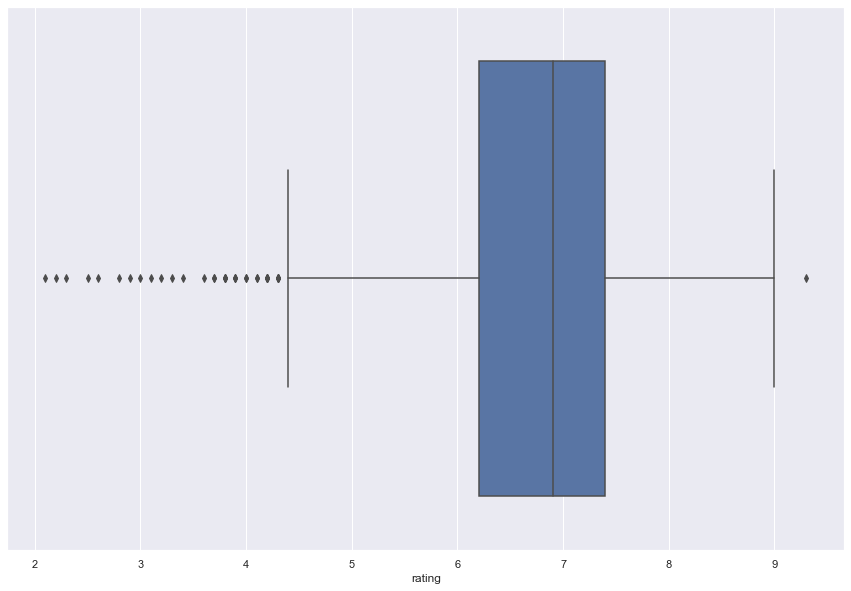

In [2340]:
#RATING

sns.boxplot(x = data['rating'])
plt.show();

In [2346]:
Q1_r = data['rating'].quantile(0.25)
Q3_r = data['rating'].quantile(0.75)
IQR_r = Q3_r - Q1_r

lower_lim_r = Q1_r - 1.5 * IQR_r
lower_lim_r

4.649999999999999

In [2342]:
data = data[data['rating'] > 4.4]

In [2344]:
data.shape

(2175, 16)

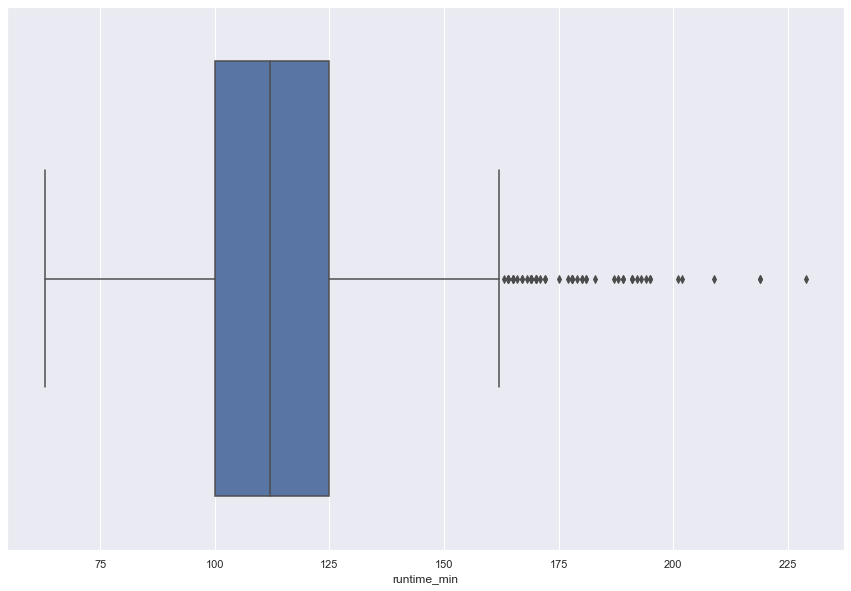

In [2345]:
#RUNTIME

sns.boxplot(x = data['runtime_min'])
plt.show();

In [2352]:
Q1_rt = data['runtime_min'].quantile(0.25)
Q3_rt = data['runtime_min'].quantile(0.75)
IQR_rt = Q3_rt - Q1_rt

higher_lim_rt = Q3_rt + 1.5 * IQR_rt
higher_lim_rt

162.5

In [2348]:
data = data[data['runtime_min'] < 200]

In [2349]:
data.shape

(2169, 16)

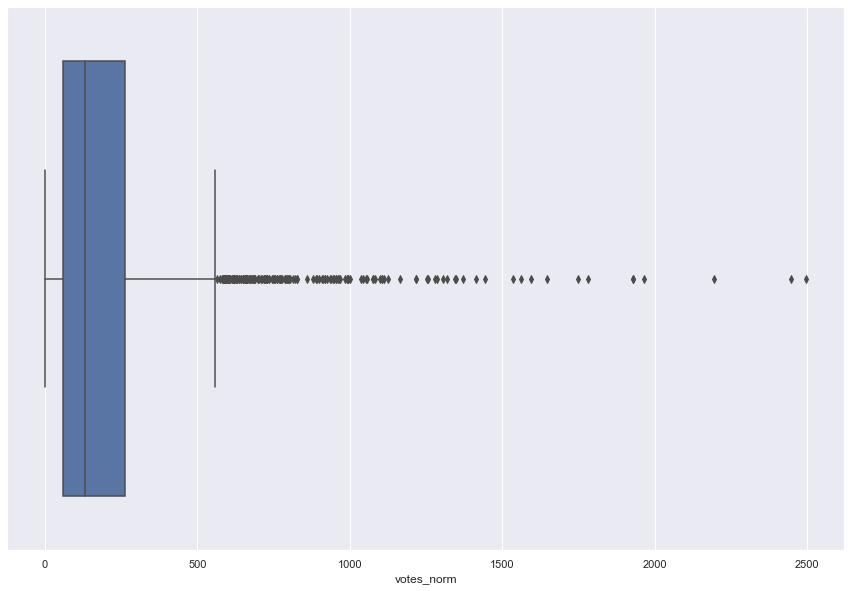

In [2350]:
#VOTES

sns.boxplot(x = data['votes_norm'])
plt.show();

In [2353]:
Q1_v = data['votes_norm'].quantile(0.25)
Q3_v = data['votes_norm'].quantile(0.75)
IQR_v = Q3_v - Q1_v

higher_lim_v = Q3_v + 1.5 * IQR_v
higher_lim_v

565.385

In [2354]:
data[data['votes_norm']>1000].count()

title          39
year           39
certificate    39
runtime_min    39
genre          39
sub_genre      39
rating         39
votes          39
metascore      39
gross_mil      39
director       39
writer         39
star           39
company        39
budget_mil     39
votes_norm     39
dtype: int64

In [2355]:
data = data[data['votes_norm']<1000]

In [2356]:
data.shape

(2130, 16)

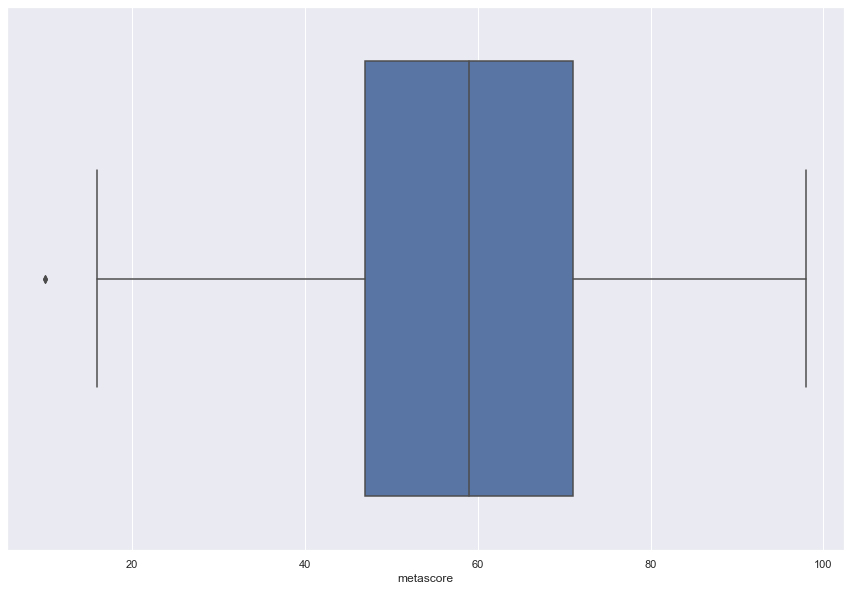

In [2357]:
#METASCORE

sns.boxplot(x = data['metascore'])
plt.show();

In [2358]:
Q1_m = data['metascore'].quantile(0.25)
Q3_m = data['metascore'].quantile(0.75)
IQR_m = Q3_m - Q1_m

lower_lim_m = Q1_m - 1.5 * IQR_m
lower_lim_m

11.0

In [2359]:
data = data[data['metascore']> 11]

In [2360]:
data.shape

(2128, 16)

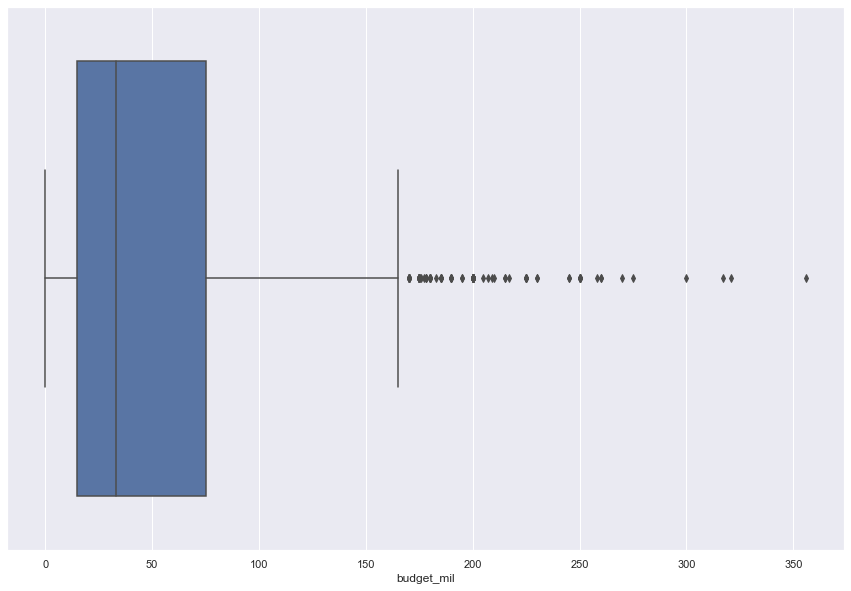

In [2361]:
#BUDGET

sns.boxplot(x = data['budget_mil'])
plt.show();

In [2362]:
Q1_b = data['budget_mil'].quantile(0.25)
Q3_b = data['budget_mil'].quantile(0.75)
IQR_b = Q3_b - Q1_b

higher_lim_b = Q3_b + 1.5 * IQR_b
higher_lim_b

165.0

In [2363]:
data = data[data['budget_mil']<250]

In [2364]:
data.shape

(2112, 16)

In [2365]:
data.columns

Index(['title', 'year', 'certificate', 'runtime_min', 'genre', 'sub_genre',
       'rating', 'votes', 'metascore', 'gross_mil', 'director', 'writer',
       'star', 'company', 'budget_mil', 'votes_norm'],
      dtype='object')

# Dummies and interaction term

In [2372]:
# Idenfied most frequent directors, then selected the top 10 based on average rating 
freq_directors = data['director'].value_counts().head(40)
freq_directors_list = freq_directors.index
top_directors = data[data['director'].isin(freq_directors_list)]
top_directors_keep = top_directors_2.groupby('director').rating.mean().sort_values(ascending=False)[:10]
top_directors_list = top_directors_keep.index
top_directors_list

Index(['Christopher Nolan', 'Quentin Tarantino', 'James Cameron',
       'Peter Jackson', 'David Fincher', 'Martin Scorsese', 'Sam Mendes',
       'Wes Anderson', 'Paul Thomas Anderson', 'Steven Spielberg'],
      dtype='object', name='director')

In [2373]:
data['top_director'] = data['director'].apply(lambda x: x if x in top_directors_list else 'other')

In [ ]:
#subgenres

In [2380]:
data['sub_genre_2'] = data['sub_genre'].apply(lambda x: x[1] if len(x)>1 else x[0])

In [2381]:
data.head()

title  year certificate  runtime_min      genre  \
0                        Home Alone  1990          PG          103     Comedy   
1                        Knives Out  2019       PG-13          130     Comedy   
2                Dazed and Confused  1993           R          102     Comedy   
3  Once Upon a Time... In Hollywood  2019           R          161     Comedy   
4                         Enchanted  2007          PG          107  Animation   

                          sub_genre  rating   votes  metascore  gross_mil  \
0                 [Comedy,  Family]     7.6  516213         63     285.76   
1          [Comedy,  Crime,  Drama]     7.9  551997         82     165.36   
2                          [Comedy]     7.6  175550         78       7.99   
3                  [Comedy,  Drama]     7.6  652796         83     142.50   
4  [Animation,  Adventure,  Comedy]     7.0  190141         75     127.81   

            director             writer               star  \
0     Chris Columbus        John Hughes    Macaulay Culkin   
1       Rian Johnson       Rian Johnson       Daniel Craig   
2  Richard Linklater  Richard Linklater       Jason London   
3  Quentin Tarantino  Quentin Tarantino  Leonardo DiCaprio   
4         Kevin Lima         Bill Kelly          Amy Adams   

                 company  budget_mil  votes_norm       top_director  \
0   Hughes Entertainment        18.0      516.21              other   
1              Lionsgate        40.0      552.00              other   
2  Gramercy Pictures (I)         6.9      175.55              other   
3      Columbia Pictures        90.0      652.80  Quentin Tarantino   
4   Walt Disney Pictures        85.0      190.14              other   

  sub_genre_2  
0      Family  
1       Crime  
2      Comedy  
3       Drama  
4   Adventure

In [2385]:
# genre/certificate combo

data[['genre', 'certificate']].value_counts()

genre      certificate
Action     PG-13          306
           R              242
Comedy     R              175
Drama      R              162
Animation  PG             153
Comedy     PG-13          148
Biography  R              115
Drama      PG-13          107
Crime      R               96
Biography  PG-13           91
Adventure  PG              80
Comedy     PG              77
Horror     R               69
Animation  G               52
Action     PG              52
Adventure  PG-13           37
Biography  PG              34
Adventure  R               31
Drama      PG              29
Animation  PG-13           14
Crime      PG-13           11
Horror     PG-13            8
Comedy     G                7
Adventure  G                5
Animation  R                4
Drama      G                3
Crime      PG               2
Biography  G                1
Horror     PG               1
dtype: int64

In [2386]:
data['cert_genre_temp'] = data['certificate'] + " " + data['genre']

title  year certificate  runtime_min      genre  \
0                        Home Alone  1990          PG          103     Comedy   
1                        Knives Out  2019       PG-13          130     Comedy   
2                Dazed and Confused  1993           R          102     Comedy   
3  Once Upon a Time... In Hollywood  2019           R          161     Comedy   
4                         Enchanted  2007          PG          107  Animation   

                          sub_genre  rating   votes  metascore  gross_mil  \
0                 [Comedy,  Family]     7.6  516213         63     285.76   
1          [Comedy,  Crime,  Drama]     7.9  551997         82     165.36   
2                          [Comedy]     7.6  175550         78       7.99   
3                  [Comedy,  Drama]     7.6  652796         83     142.50   
4  [Animation,  Adventure,  Comedy]     7.0  190141         75     127.81   

            director             writer               star  \
0     Chris Columbus        John Hughes    Macaulay Culkin   
1       Rian Johnson       Rian Johnson       Daniel Craig   
2  Richard Linklater  Richard Linklater       Jason London   
3  Quentin Tarantino  Quentin Tarantino  Leonardo DiCaprio   
4         Kevin Lima         Bill Kelly          Amy Adams   

                 company  budget_mil  votes_norm       top_director  \
0   Hughes Entertainment        18.0      516.21              other   
1              Lionsgate        40.0      552.00              other   
2  Gramercy Pictures (I)         6.9      175.55              other   
3      Columbia Pictures        90.0      652.80  Quentin Tarantino   
4   Walt Disney Pictures        85.0      190.14              other   

  sub_genre_2 cert_genre_temp  
0      Family       PG Comedy  
1       Crime    PG-13 Comedy  
2      Comedy        R Comedy  
3       Drama        R Comedy  
4   Adventure    PG Animation

In [2387]:
cert_genre_list = ['PG-13 Action', 'R Action', 'R Comedy', 'R Drama', 'PG Animation', 'PG-13 Comedy', 'R Biography', 'PG-13 Drama', 'R Crime']
data['cert_genre'] = data['cert_genre_temp'].apply(lambda x: x if x in cert_genre_list else 'other_combo')
data.head()

title  year certificate  runtime_min  \
0                          Home Alone  1990          PG          103   
1                          Knives Out  2019       PG-13          130   
2                  Dazed and Confused  1993           R          102   
3    Once Upon a Time... In Hollywood  2019           R          161   
4                           Enchanted  2007          PG          107   
6                       Love Actually  2003           R          135   
7             Jumanji: The Next Level  2019       PG-13          123   
8                            Parasite  2019           R          132   
9                         The Holiday  2006       PG-13          136   
10                  Crazy Rich Asians  2018       PG-13          120   
11                     21 Jump Street  2012           R          109   
12                         Deadpool 2  2018           R          119   
13                           Deadpool  2016           R          108   
14                    Ghostbusters II  1989          PG          108   
15  Spider-Man: Into the Spider-Verse  2018          PG          117   
16                        Hocus Pocus  1993          PG           96   
17                   American Reunion  2012           R          113   
18                     Thor: Ragnarok  2017       PG-13          130   
19           The Grand Budapest Hotel  2014           R           99   
20                        Jojo Rabbit  2019       PG-13          108   

        genre                         sub_genre  rating   votes  metascore  \
0      Comedy                 [Comedy,  Family]     7.6  516213         63   
1      Comedy          [Comedy,  Crime,  Drama]     7.9  551997         82   
2      Comedy                          [Comedy]     7.6  175550         78   
3      Comedy                  [Comedy,  Drama]     7.6  652796         83   
4   Animation  [Animation,  Adventure,  Comedy]     7.0  190141         75   
6      Comedy        [Comedy,  Drama,  Romance]     7.6  451267         55   
7      Action     [Action,  Adventure,  Comedy]     6.7  223228         58   
8      Comedy       [Comedy,  Drama,  Thriller]     8.6  685755         96   
9      Comedy                [Comedy,  Romance]     6.9  265873         52   
10     Comedy        [Comedy,  Drama,  Romance]     6.9  158603         74   
11     Action         [Action,  Comedy,  Crime]     7.2  533449         69   
12     Action     [Action,  Adventure,  Comedy]     7.7  527443         66   
13     Action     [Action,  Adventure,  Comedy]     8.0  961052         65   
14     Action       [Action,  Comedy,  Fantasy]     6.6  194359         56   
15  Animation  [Animation,  Action,  Adventure]     8.4  439003         87   
16     Comedy       [Comedy,  Family,  Fantasy]     6.9  118228         43   
17     Comedy                          [Comedy]     6.7  209273         49   
18     Action     [Action,  Adventure,  Comedy]     7.9  659211         74   
19  Adventure      [Adventure,  Comedy,  Crime]     8.1  754937         88   
20     Comedy            [Comedy,  Drama,  War]     7.9  346313         58   

    gross_mil           director             writer                 star  \
0      285.76     Chris Columbus        John Hughes      Macaulay Culkin   
1      165.36       Rian Johnson       Rian Johnson         Daniel Craig   
2        7.99  Richard Linklater  Richard Linklater         Jason London   
3      142.50  Quentin Tarantino  Quentin Tarantino    Leonardo DiCaprio   
4      127.81         Kevin Lima         Bill Kelly            Amy Adams   
6       59.70     Richard Curtis     Richard Curtis           Hugh Grant   
7      316.83        Jake Kasdan        Jake Kasdan       Dwayne Johnson   
8       53.37       Bong Joon Ho       Bong Joon Ho         Kang-ho Song   
9       63.22       Nancy Meyers       Nancy Meyers         Kate Winslet   
10     174.53         Jon M. Chu    Peter Chiarelli         Constance Wu   
11     138.45          Phil Lord     Michael

# INTERACTIVE TERM

# DIRECTOR AVG

In [2388]:
data2 = data

In [2389]:
data2['sum_temp'] = data2.sort_values('year', ascending=True).groupby(['director']).rating.cumsum()

In [2390]:
data2['sum'] = data2.sort_values('year', ascending=True).groupby(['director'])['sum_temp'].shift()

In [2391]:
data2['counts_temp'] = data2.sort_values('year', ascending=True).groupby(['director']).year.cumcount(ascending=True)+1

In [2392]:
data2['counts'] = data2.sort_values('year', ascending=True).groupby(['director'])['counts_temp'].shift()

In [2393]:
data2['average_temp'] = data2['sum']

In [2394]:
data2['dir_averages'] = data2.apply(lambda x: x.average_temp/x.counts if x.counts > 1 else x.average_temp, axis=1)


In [2395]:
data2['dir_averages'].fillna(data2.sort_values('year', ascending=True).groupby('director').rating.transform(lambda x: x.mean()), inplace=True)


In [2396]:
data2.head()

title  year certificate  runtime_min      genre  \
0                        Home Alone  1990          PG          103     Comedy   
1                        Knives Out  2019       PG-13          130     Comedy   
2                Dazed and Confused  1993           R          102     Comedy   
3  Once Upon a Time... In Hollywood  2019           R          161     Comedy   
4                         Enchanted  2007          PG          107  Animation   

                          sub_genre  rating   votes  metascore  gross_mil  \
0                 [Comedy,  Family]     7.6  516213         63     285.76   
1          [Comedy,  Crime,  Drama]     7.9  551997         82     165.36   
2                          [Comedy]     7.6  175550         78       7.99   
3                  [Comedy,  Drama]     7.6  652796         83     142.50   
4  [Animation,  Adventure,  Comedy]     7.0  190141         75     127.81   

   ...       top_director sub_genre_2 cert_genre_temp    cert_genre  sum_temp  \
0  ...              other      Family       PG Comedy   other_combo      14.5   
1  ...              other       Crime    PG-13 Comedy  PG-13 Comedy      15.3   
2  ...              other      Comedy        R Comedy      R Comedy       7.6   
3  ...  Quentin Tarantino       Drama        R Comedy      R Comedy      39.2   
4  ...              other   Adventure    PG Animation  PG Animation       7.0   

    sum counts_temp counts average_temp dir_averages  
0   6.9           2    1.0          6.9     6.900000  
1   7.4           2    1.0          7.4     7.400000  
2   NaN           1    NaN          NaN     6.942857  
3  31.6           5    4.0         31.6     7.900000  
4   NaN           1    NaN          NaN     7.000000  

[5 rows x 26 columns]

In [2397]:
data2 = data2.drop(['sum_temp', 'sum', 'counts_temp', 'counts', 'average_temp'], axis=1)

# WRITER AVG

In [2398]:
data2['sum_temp'] = data2.sort_values('year', ascending=True).groupby(['writer']).rating.cumsum()

In [2399]:
data2['sum'] = data2.sort_values('year', ascending=True).groupby(['writer'])['sum_temp'].shift()

In [2400]:
data2['counts_temp'] = data2.sort_values('year', ascending=True).groupby(['writer']).year.cumcount(ascending=True)+1


In [2401]:
data2['counts'] = data2.sort_values('year', ascending=True).groupby(['writer'])['counts_temp'].shift()


In [2402]:
data2['average_temp'] = data2['sum']

In [2405]:
data2['writer_averages'] = data2.apply(lambda x: x.average_temp/x.counts if x.counts > 1 else x.average_temp, axis=1)


In [2408]:
data2['writer_averages'].fillna(data2.sort_values('year', ascending=True).groupby('writer').rating.transform(lambda x: x.mean()), inplace=True)



In [2410]:
data2 = data2.drop(['sum_temp', 'sum', 'counts_temp', 'counts', 'average_temp'], axis=1)

# STAR AVG

In [2411]:
data2['sum_temp'] = data2.sort_values('year', ascending=True).groupby(['star']).rating.cumsum()

In [2412]:
data2['sum'] = data2.sort_values('year', ascending=True).groupby(['star'])['sum_temp'].shift()

In [2413]:
data2['counts_temp'] = data2.sort_values('year', ascending=True).groupby(['star']).year.cumcount(ascending=True)+1


In [2414]:
data2['counts'] = data2.sort_values('year', ascending=True).groupby(['star'])['counts_temp'].shift()


In [2415]:
data2['average_temp'] = data2['sum']

In [2416]:
data2['star_averages'] = data2.apply(lambda x: x.average_temp/x.counts if x.counts > 1 else x.average_temp, axis=1)



In [2417]:
data2['star_averages'].fillna(data2.sort_values('year', ascending=True).groupby('star').rating.transform(lambda x: x.mean()), inplace=True)



In [2418]:
data2.head()

title  year certificate  runtime_min      genre  \
0                        Home Alone  1990          PG          103     Comedy   
1                        Knives Out  2019       PG-13          130     Comedy   
2                Dazed and Confused  1993           R          102     Comedy   
3  Once Upon a Time... In Hollywood  2019           R          161     Comedy   
4                         Enchanted  2007          PG          107  Animation   

                          sub_genre  rating   votes  metascore  gross_mil  \
0                 [Comedy,  Family]     7.6  516213         63     285.76   
1          [Comedy,  Crime,  Drama]     7.9  551997         82     165.36   
2                          [Comedy]     7.6  175550         78       7.99   
3                  [Comedy,  Drama]     7.6  652796         83     142.50   
4  [Animation,  Adventure,  Comedy]     7.0  190141         75     127.81   

   ... cert_genre_temp    cert_genre dir_averages writer_averages  sum_temp  \
0  ...       PG Comedy   other_combo     6.900000            7.25       7.6   
1  ...    PG-13 Comedy  PG-13 Comedy     7.400000            7.40      58.1   
2  ...        R Comedy      R Comedy     6.942857            7.85       7.6   
3  ...        R Comedy      R Comedy     7.900000            7.80      88.4   
4  ...    PG Animation  PG Animation     7.000000            7.00       7.0   

    sum counts_temp counts average_temp star_averages  
0   NaN           1    NaN          NaN      7.200000  
1  50.2           8    7.0         50.2      7.171429  
2   NaN           1    NaN          NaN      7.600000  
3  80.8          12   11.0         80.8      7.345455  
4   NaN           1    NaN          NaN      7.250000  

[5 rows x 28 columns]

In [2419]:
data2 = data2.drop(['sum_temp', 'sum', 'counts_temp', 'counts', 'average_temp'], axis=1)

# DUMMIES AND INTERACTION TERM

In [2420]:
#DIRECTOR/WRITER/STAR INTERACTION TERM

data2['dir_writer_star_mult'] = data2['dir_averages'] * data2['writer_averages'] * data2['star_averages']
data2['dir_writer_star_mean'] = (data2['dir_averages'] + data2['writer_averages'] + data2['star_averages']) / 3


## Dummies

In [2421]:
dummy_genre = pd.get_dummies(data2['genre'])
dummy_genre

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Horror
0          0          0          0          0       1      0      0       0
1          0          0          0          0       1      0      0       0
2          0          0          0          0       1      0      0       0
3          0          0          0          0       1      0      0       0
4          0          0          1          0       0      0      0       0
6          0          0          0          0       1      0      0       0
7          1          0          0          0       0      0      0       0
8          0          0          0          0       1      0      0       0
9          0          0          0          0       1      0      0       0
10         0          0          0          0       1      0      0       0
11         1          0          0          0       0      0      0       0
12         1          0          0          0       0      0      0       0
13         1          0          0          0       0      0      0       0
14         1          0          0          0       0      0      0       0
15         0          0          1          0       0      0      0       0
16         0          0          0          0       1      0      0       0
17         0          0          0          0       1      0      0       0
18         1          0          0          0       0      0      0       0
19         0          1          0          0       0      0      0       0
20         0          0          0          0       1      0      0       0
22         1          0          0          0       0      0      0       0
23         0          0          0          0       1      0      0       0
24         0          0          0          0       1      0      0       0
25         0          0          0          0       1      0      0       0
26         0          1          0          0       0      0      0       0
27         0          1          0          0       0      0      0       0
28         1          0          0          0       0      0      0       0
29         0          1          0          0       0      0      0       0
31         0          0          1          0       0      0      0       0
32         1          0          0          0       0      0      0       0
33         0          0          0          0       1      0      0       0
34         0          0          0          1       0      0      0       0
35         0          0          0          1       0      0      0       0
36         1          0          0          0       0      0      0       0
37         0          0          0          0       1      0      0       0
38         1          0          0          0       0      0      0       0
39         0          0          0          0       1      0      0       0
40         1          0          0          0       0      0      0       0
41         0          0          1          0       0      0      0       0
42         0          1          0          0       0      0      0       0
43         0          0          0          0       1      0      0       0
44         0          0          0          0       1      0      0       0
45         1          0          0          0       0      0      0       0
46         1          0          0          0       0      0      0       0
47         0          0          0          0       1      0      0       0
48         0          0          0          0       1      0      0       0
49         0          0          1          0       0      0      0       0
50         0          0          0          0       1      0      0       0
51         0          0          0          0       1      0      0       0
52         0          0          0          0       1      0      0       0
53         0          0          0          0       1      0      0       0
54         1          0          0          0       0 

# EXTRA

In [1827]:
dummy_subgenre = dummy_subgenre.rename(columns=lambda name: 'Sub_' + name)


In [1828]:
dummy_subgenre = dummy_subgenre.replace(1, 0.5)
dummy_subgenre

Sub_ Adventure  Sub_ Comedy  Sub_ Crime  Sub_ Drama  Sub_ Family  \
0                0.0          0.0         0.0         0.0          0.5   
1                0.0          0.0         0.5         0.0          0.0   
2                0.0          0.0         0.0         0.0          0.0   
3                0.0          0.0         0.0         0.5          0.0   
4                0.5          0.0         0.0         0.0          0.0   
5                0.0          0.5         0.0         0.0          0.0   
6                0.0          0.0         0.0         0.5          0.0   
7                0.5          0.0         0.0         0.0          0.0   
8                0.0          0.0         0.0         0.5          0.0   
9                0.0          0.0         0.0         0.0          0.0   
10               0.0          0.0         0.0         0.5          0.0   
11               0.0          0.5         0.0         0.0          0.0   
12               0.5          0.0         0.0         0.0          0.0   
13               0.5          0.0         0.0         0.0          0.0   
14               0.0          0.5         0.0         0.0          0.0   
15               0.0          0.0         0.0         0.0          0.0   
16               0.0          0.0         0.0         0.0          0.5   
17               0.0          0.0         0.0         0.0          0.0   
18               0.5          0.0         0.0         0.0          0.0   
19               0.0          0.5         0.0         0.0          0.0   
20               0.0          0.0         0.0         0.5          0.0   
21               0.5          0.0         0.0         0.0          0.0   
22               0.5          0.0         0.0         0.0          0.0   
23               0.0          0.0         0.0         0.0          0.0   
24               0.0          0.0         0.5         0.0          0.0   
25               0.0          0.0         0.0         0.0          0.5   
26               0.0          0.5         0.0         0.0          0.0   
27               0.0          0.5         0.0         0.0          0.0   
28               0.0          0.5         0.0         0.0          0.0   
29               0.0          0.5         0.0         0.0          0.0   
30               0.0          0.5         0.0         0.0          0.0   
31               0.0          0.5         0.0         0.0          0.0   
32               0.0          0.5         0.0         0.0          0.0   
33               0.0          0.0         0.0         0.5          0.0   
34               0.0          0.5         0.0         0.0          0.0   
35               0.0          0.5         0.0         0.0          0.0   
36               0.0          0.5         0.0         0.0          0.0   
37               0.0          0.0         0.0         0.5          0.0   
38               0.5          0.0         0.0         0.0          0.0   
39               0.0          0.0         0.0         0.5          0.0   
40               0.0          0.5         0.0         0.0          0.0   
41               0.5          0.0         0.0         0.0          0.0   
42               0.0          0.5         0.0         0.0          0.0   
43               0.0          0.0         0.0         0.0          0.0   
44               0.0          0.0         0.0         0.0          0.0   
45               0.5          0.0         0.0         0.0          0.0   
46               0.0          0.5         0.0         0.0          0.0   
47               0.0          0.0         0.0         0.0          0.0   
48               0.0          0.0         0.0         0.0          0.0   
49               0.5          0.0         0.0         0.0          0.0   
50               0.0          0.0         0.0         0.5          0.0   
51               0.0          0.0         0.0         0.0          0.0   
52               0.0          0.0         0.0         0.5          0.0   
53        

In [2423]:
dummy_certificate = pd.get_dummies(data2['certificate'])
dummy_certificate

G  PG  PG-13  R
0     0   1      0  0
1     0   0      1  0
2     0   0      0  1
3     0   0      0  1
4     0   1      0  0
6     0   0      0  1
7     0   0      1  0
8     0   0      0  1
9     0   0      1  0
10    0   0      1  0
11    0   0      0  1
12    0   0      0  1
13    0   0      0  1
14    0   1      0  0
15    0   1      0  0
16    0   1      0  0
17    0   0      0  1
18    0   0      1  0
19    0   0      0  1
20    0   0      1  0
22    0   0      0  1
23    0   0      0  1
24    0   0      0  1
25    0   1      0  0
26    0   1      0  0
27    0   1      0  0
28    0   0      1  0
29    0   1      0  0
31    0   1      0  0
32    0   0      0  1
33    0   0      0  1
34    0   0      0  1
35    0   0      0  1
36    0   0      0  1
37    0   1      0  0
38    0   0      1  0
39    0   0      1  0
40    0   0      1  0
41    0   1      0  0
42    0   1      0  0
43    0   0      1  0
44    0   0      1  0
45    0   0      1  0
46    0   0      1  0
47    0   0      0  1
48    0   0      1  0
49    0   1      0  0
50    0   0      0  1
51    0   0      0  1
52    0   0      1  0
53    0   0      0  1
54    0   0      1  0
55    0   0      1  0
56    1   0      0  0
57    0   0      0  1
58    0   1      0  0
59    0   0      0  1
60    0   0      0  1
61    0   1      0  0
62    0   0      0  1
63    0   0      1  0
64    0   1      0  0
65    0   0      1  0
66    0   1      0  0
67    0   0      0  1
68    0   0      0  1
69    0   0      1  0
70    0   0      1  0
71    0   0      1  0
72    0   0      0  1
73    0   1      0  0
74    0   0      1  0
75    0   0      0  1
76    0   1      0  0
77    0   0      1  0
78    0   1      0  0
79    0   0      0  1
80    0   0      0  1
81    0   0      1  0
82    1   0      0  0
83    0   1      0  0
84    0   0      0  1
85    0   0      0  1
86    0   0      0  1
87    0   0      0  1
88    0   0      0  1
89    0   0      1  0
90    0   0      1  0
91    0   0      0  1
92    0   0      1  0
93    0   1      0  0
94    0   0      0  1
95    0   0      0  1
96    0   0      0  1
97    0   1      0  0
98    0   0      0  1
99    0   0      0  1
101   0   0      1  0
102   0   1      0  0
103   0   1      0  0
104   0   0      1  0
105   0   0      0  1
106   0   0      1  0
107   0   0      1  0
108   0   1      0  0
109   0   0      0  1
110   0   0      1  0
111   0   0      1  0
112   0   0      1  0
113   0   0      0  1
114   0   0      0  1
115   0   0      0  1
116   0   0      0  1
117   0   0      0  1
118   0   0      0  1
119   0   0      0  1
120   1   0      0  0
121   0   0      0  1
122   0   1      0  0
123   0   0      0  1
124   0   1      0  0
125   0   0      0  1
126   0   0      0  1
127   0   0      0  1
128   0   0      0  1
129   0   1      0  0
130   0   0      1  0
131   0   0      0  1
132   0   0      1  0
133   0   1      0  0
134   1   0      0  0
135   0   0      1  0
136   1   0      0  0
137   0   0      0  1
138   0   0      0  1
140   0   1      0  0
141   0   0      0  1
142   0   1      0  0
143   0   1      0  0
144   0   0      1  0
145   0   0      0  1
146   0   0      0  1
147   0   0      0  1
148   0   0      0  1
149   1   0      0  0
150   0   1      0  0
151   0   0      1  0
152   0   0      0  1
153   0   0      1  0
154   0   1      0  0
155   0   1      0  0
156   0   0      1  0
157   0   0      1  0
158   0   0      0  1
159   0   0      1  0
160   0   0      1  0
161   0   0      0  1
162   0   0      0  1
163   0   0      1  0
164   0   0      1  0
165   0   0      1  0
166   0   0      1  0
167   0   1      0  0
168   1   0      0  0
169   0   0      1  0
170   1   0      0  0
171   0   0      1  0
172   0   0      0  1
173   1   0      0  0
174   0   1      0  0
175   0   1      0  0
176   0   0      0  1
177   0   0      1  0
178   0   1      0  0
179   0   0      1  0
180   0   0      1  0
181   0   0      1  0
182   0   0      1  0
183   0   0      1  0
184   0   0      1  0
185   0   0      1  0
18

In [2425]:
dummy_director = pd.get_dummies(data2['top_director'])
dummy_director


Christopher Nolan  David Fincher  James Cameron  Martin Scorsese  \
0                     0              0              0                0   
1                     0              0              0                0   
2                     0              0              0                0   
3                     0              0              0                0   
4                     0              0              0                0   
6                     0              0              0                0   
7                     0              0              0                0   
8                     0              0              0                0   
9                     0              0              0                0   
10                    0              0              0                0   
11                    0              0              0                0   
12                    0              0              0                0   
13                    0              0              0                0   
14                    0              0              0                0   
15                    0              0              0                0   
16                    0              0              0                0   
17                    0              0              0                0   
18                    0              0              0                0   
19                    0              0              0                0   
20                    0              0              0                0   
22                    0              0              0                0   
23                    0              0              0                0   
24                    0              0              0                0   
25                    0              0              0                0   
26                    0              0              0                0   
27                    0              0              0                0   
28                    0              0              0                0   
29                    0              0              0                0   
31                    0              0              0                0   
32                    0              0              0                0   
33                    0              0              0                0   
34                    0              0              0                0   
35                    0              0              0                0   
36                    0              0              0                0   
37                    0              0              0                0   
38                    0              0              0                0   
39                    0              0              0                0   
40                    0              0              0                0   
41                    0              0              0                0   
42                    0              0              0                0   
43                    0              0              0                0   
44                    0              0              0                0   
45                    0              0              0                0   
46                    0              0              0                0   
47                    0              0              0                0   
48                    0              0              0                0   
49                    0              0              0                0   
50                    0              0              0                0   
51                    0              0              0                0   
52                    0              0              0                0   
53                    0              0              0                0   
54                    0              0              0                0   
55                    0              0              0                0   
56        

In [2428]:
dummy_cert_genre = pd.get_dummies(data2['cert_genre'])
dummy_cert_genre

PG Animation  PG-13 Action  PG-13 Comedy  PG-13 Drama  R Action  \
0                0             0             0            0         0   
1                0             0             1            0         0   
2                0             0             0            0         0   
3                0             0             0            0         0   
4                1             0             0            0         0   
6                0             0             0            0         0   
7                0             1             0            0         0   
8                0             0             0            0         0   
9                0             0             1            0         0   
10               0             0             1            0         0   
11               0             0             0            0         1   
12               0             0             0            0         1   
13               0             0             0            0         1   
14               0             0             0            0         0   
15               1             0             0            0         0   
16               0             0             0            0         0   
17               0             0             0            0         0   
18               0             1             0            0         0   
19               0             0             0            0         0   
20               0             0             1            0         0   
22               0             0             0            0         1   
23               0             0             0            0         0   
24               0             0             0            0         0   
25               0             0             0            0         0   
26               0             0             0            0         0   
27               0             0             0            0         0   
28               0             1             0            0         0   
29               0             0             0            0         0   
31               1             0             0            0         0   
32               0             0             0            0         1   
33               0             0             0            0         0   
34               0             0             0            0         0   
35               0             0             0            0         0   
36               0             0             0            0         1   
37               0             0             0            0         0   
38               0             1             0            0         0   
39               0             0             1            0         0   
40               0             1             0            0         0   
41               1             0             0            0         0   
42               0             0             0            0         0   
43               0             0             1            0         0   
44               0             0             1            0         0   
45               0             1             0            0         0   
46               0             1             0            0         0   
47               0             0             0            0         0   
48               0             0             1            0         0   
49               1             0             0            0         0   
50               0             0             0            0         0   
51               0             0             0            0         0   
52               0             0             1            0         0   
53               0             0             0            0         0   
54               0             1             0            0         0   
55               0             0             1            0         0   
56               0             0             0            0     

## CONCAT

In [2429]:
data_df = pd.concat([data2, dummy_certificate, dummy_genre, dummy_cert_genre, dummy_director], axis=1)
data_df.columns

Index(['title', 'year', 'certificate', 'runtime_min', 'genre', 'sub_genre',
       'rating', 'votes', 'metascore', 'gross_mil', 'director', 'writer',
       'star', 'company', 'budget_mil', 'votes_norm', 'top_director',
       'sub_genre_2', 'cert_genre_temp', 'cert_genre', 'dir_averages',
       'writer_averages', 'star_averages', 'dir_writer_star_mult',
       'dir_writer_star_mean', 'G', 'PG', 'PG-13', 'R', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror',
       'PG Animation', 'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama',
       'R Action', 'R Biography', 'R Comedy', 'R Crime', 'R Drama',
       'other_combo', 'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson',
       'other'],
      dtype='object')

In [2431]:
data_df1 = data_df[['rating', 'runtime_min', 'votes_norm', 'metascore', 'budget_mil', 'G', 'PG', 'PG-13', 'R', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson',
       'other']]

In [2432]:
data_df1.shape

(2112, 28)

In [2767]:
data_df1.columns

Index(['rating', 'runtime_min', 'votes_norm', 'metascore', 'budget_mil', 'G',
       'PG', 'PG-13', 'R', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Horror', 'Christopher Nolan',
       'David Fincher', 'James Cameron', 'Martin Scorsese',
       'Paul Thomas Anderson', 'Peter Jackson', 'Quentin Tarantino',
       'Sam Mendes', 'Steven Spielberg', 'Wes Anderson', 'other'],
      dtype='object')

# MODEL 1

## Correlation and inflation factors

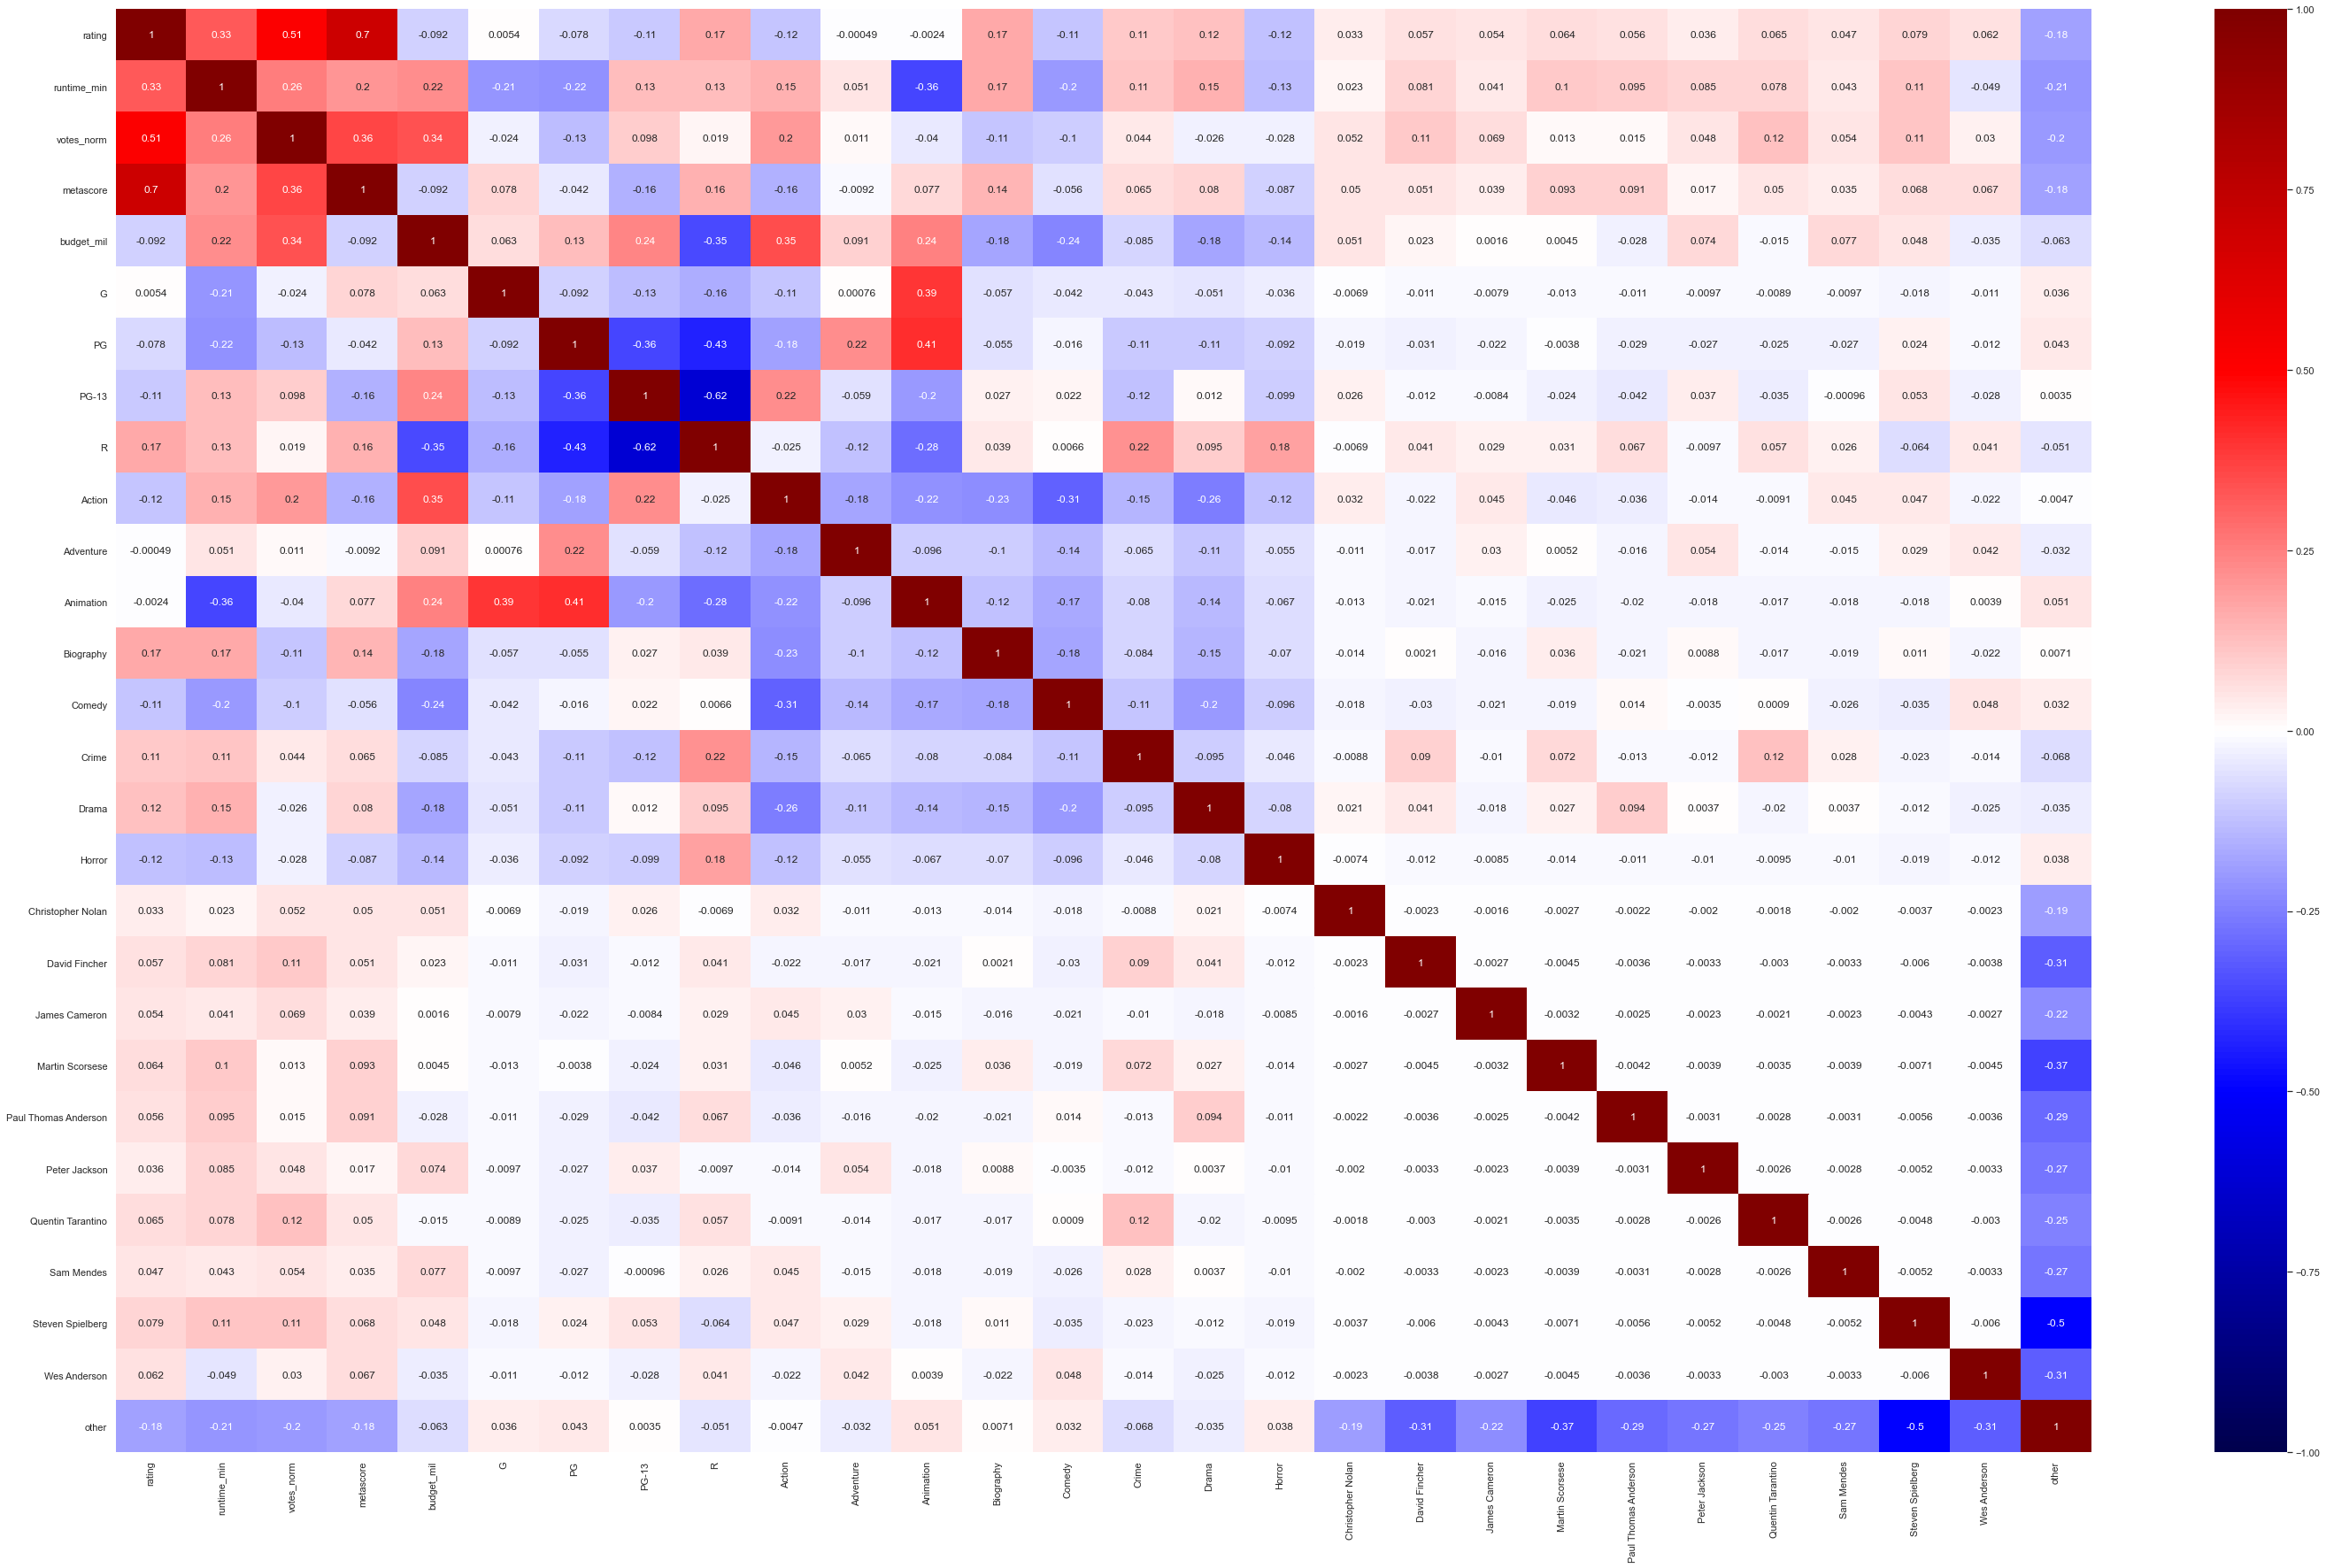

In [2433]:
sns.set(rc={"figure.figsize":(50, 30)})
sns.heatmap(data_df1.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [2434]:
corr_mat = data_df1.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

rating                rating                  1.000000
                      runtime_min             0.325625
                      votes_norm              0.511703
                      metascore               0.701669
                      budget_mil             -0.092066
                      G                       0.005411
                      PG                     -0.078079
                      PG-13                  -0.109078
                      R                       0.166309
                      Action                 -0.115976
                      Adventure              -0.000493
                      Animation              -0.002411
                      Biography               0.171355
                      Comedy                 -0.110479
                      Crime                   0.108454
                      Drama                   0.118342
                      Horror                 -0.122475
                      Christopher Nolan       0.032650
          

In [2435]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

In [2436]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
high_corr = sorted_pairs[(sorted_pairs>0.4) & (sorted_pairs != 1)]
high_corr

metascore   rating        0.701669
rating      metascore     0.701669
            votes_norm    0.511703
votes_norm  rating        0.511703
PG          Animation     0.413225
Animation   PG            0.413225
dtype: float64

In [2437]:
#seeing stronger correlation with runtime, metascore and votes_norm 

In [2438]:
data_df1.columns

Index(['rating', 'runtime_min', 'votes_norm', 'metascore', 'budget_mil', 'G',
       'PG', 'PG-13', 'R', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Horror', 'Christopher Nolan',
       'David Fincher', 'James Cameron', 'Martin Scorsese',
       'Paul Thomas Anderson', 'Peter Jackson', 'Quentin Tarantino',
       'Sam Mendes', 'Steven Spielberg', 'Wes Anderson', 'other'],
      dtype='object')

## Comparing to the most general combo:
## G, Comedy, other directors

In [2440]:
#Compare to G, Comedy, other director

X = data_df1.drop(['rating', 'G', 'Comedy', 'other'], axis=1)  # independent variables
y = data_df1['rating']   # dependent variables
X = sm.add_constant(X)
# fit the regression model
regOLS_base = sm.OLS(y, X).fit()
regOLS_base.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:27:12   Log-Likelihood:                -1370.7
No. Observations:                2112   AIC:                             2791.
Df Residuals:                    2087   BIC:                             2933.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3247      0.097     44.391      0.000       4.134       4.516
runtime_min              0.0080      0.001     11.511      0.000       0.007       0.009
votes_norm               0.0017   6.85e-05     24.402      0.000       0.002       0.002
metascore                0.0223      0.001     29.115      0.000       0.021       0.024
budget_mil              -0.0038      0.000    -12.924      0.000      -0.004      -0.003
PG                       0.0524      0.063      0.826      0.409      -0.072       0.177
PG-13                    0.0015      0.068      0.022      0.982      -0.132       0.135
R                        0.0353      0.068      0.518      0.605      -0.098       0.169
Action                   0.0173      0.033      0.525      0.599      -0.047       0.082
Adventure                0.1175      0.047      2.507      0.012       0.026       0.209
Animation                0.3303      0.050      6.594      0.000       0.232       0.428
Biography                0.2671      0.040      6.691      0.000       0.189       0.345
Crime                    0.1777      0.053      3.370      0.001       0.074       0.281
Drama                    0.1465      0.037      3.977      0.000       0.074       0.219
Horror                  -0.2226      0.059     -3.775      0.000      -0.338      -0.107
Christopher Nolan       -0.0138      0.270     -0.051      0.959      -0.544       0.516
David Fincher           -0.3006      0.167     -1.798      0.072      -0.629       0.027
James Cameron            0.0668      0.235      0.285      0.776      -0.393       0.527
Martin Scorsese         -0.1160      0.143     -0.813      0.416      -0.396       0.164
Paul Thomas Anderson    -0.2478      0.179     -1.385      0.166      -0.599       0.103
Peter Jackson            0.1472      0.192      0.766      0.444      -0.230       0.524
Quentin Tarantino       -0.4058      0.213     -1.908      0.057      -0.823       0.011
Sam Mendes               0.3241      0.192      1.691      0.091      -0.052       0.700
Steven Spielberg        -0.0559      0.106     -0.525      0.600      -0.265       0.153
Wes Anderson             0.2795      0.166      1.679      0.093      -0.047       0.606
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.001
Skew:                          -0.444   Prob(JB):                     3.58e-29
Kurtosis:                       3.836   Cond. No.                     7.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition

In [ ]:
# based on the T stat, the most significant variables are metascore, votes
# followed by runtime_min, budget_mil. Then Animation and Biography.
# in a model where we are comparing to G, Comedy, other - the most general category.

In [2441]:
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})


variables        VIF
0            runtime_min   1.714873
1             votes_norm   1.558916
2              metascore   1.478680
3             budget_mil   2.008380
4                     PG   6.324398
5                  PG-13  10.173952
6                      R  11.058830
7                 Action   2.147556
8              Adventure   1.435907
9              Animation   2.306013
10             Biography   1.567688
11                 Crime   1.324375
12                 Drama   1.613531
13                Horror   1.204138
14     Christopher Nolan   1.009016
15         David Fincher   1.027258
16         James Cameron   1.011841
17       Martin Scorsese   1.025717
18  Paul Thomas Anderson   1.029592
19         Peter Jackson   1.017713
20     Quentin Tarantino   1.039594
21            Sam Mendes   1.013770
22      Steven Spielberg   1.034520
23          Wes Anderson   1.018036

In [2442]:
from sklearn.model_selection import KFold

X, y = data_df1.drop(['rating', 'G', 'Comedy', 'other'], axis=1), data_df1['rating']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [2443]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LassoCV

kf = KFold(n_splits=5, shuffle=True)
lm_r2, lm_ridge_r2, lm_lasso_r2 = [], [], [] #collect the validation results for both models

alphas = 10**np.linspace(-2, 2, 200)

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #Regressions
    lm = LinearRegression()
    lm_ridge = RidgeCV(alphas=alphas)
    lm_lasso = LassoCV(alphas=alphas)

    #Simple linear fit
    lm.fit(X_train, y_train)
    lm_r2.append(lm.score(X_val, y_val))
    
    #Ridge fit
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    lm_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    #Lasso fit
    lm_lasso.fit(X_train_scaled, y_train)
    lm_lasso_r2.append(lm_lasso.score(X_val_scaled, y_val))


print('Simple regression scores: ', lm_r2, '\n')
print('Ridge scores: ', lm_ridge_r2, '\n')
print('Lasso scores: ', lm_lasso_r2, '\n')


print(f'Simple mean r^2: {np.mean(lm_r2):.3f} +- {np.std(lm_r2):.3f}')
print(f'Ridge mean r^2: {np.mean(lm_ridge_r2):.3f} +- {np.std(lm_ridge_r2):.3f}')
print(f'Lasso mean r^2: {np.mean(lm_lasso_r2):.3f} +- {np.std(lm_lasso_r2):.3f}', '\n')

print('Ridge alpha', lm_ridge.alpha_)
print('Lasso alpha', lm_lasso.alpha_)

Simple regression scores:  [0.6656726599757417, 0.6542208504975633, 0.6249726458050187, 0.6213297314917333, 0.6377430474023178] 

Ridge scores:  [0.6666048868106146, 0.6545296800338616, 0.6261073570280442, 0.620692599352541, 0.6375847315422887] 

Lasso scores:  [0.6661864105627127, 0.6460912290751596, 0.634171351652316, 0.613015124297992, 0.635157933021328] 

Simple mean r^2: 0.641 +- 0.017
Ridge mean r^2: 0.641 +- 0.017
Lasso mean r^2: 0.639 +- 0.017 

Ridge alpha 36.123426997094306
Lasso alpha 0.01


In [2444]:
#RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = lm.predict(X_val)
pred_ridge = lm_ridge.predict(X_val_scaled)
pred_lasso = lm_lasso.predict(X_val_scaled)

print('Simple reg RMSE:'+str(np.sqrt(mean_squared_error(pred,y_val))))
print('Simple reg MAE:'+str(mean_absolute_error(pred,y_val)), '\n')

print('Ridge RMSE:'+str(np.sqrt(mean_squared_error(pred_ridge,y_val))))
print('Ridge MAE:'+str(mean_absolute_error(pred_ridge,y_val)), '\n')

print('Lasso RMSE:'+str(np.sqrt(mean_squared_error(pred_lasso,y_val))))
print('Lasso MAE:'+str(mean_absolute_error(pred_lasso,y_val)), '\n')

Simple reg RMSE:0.4939452427608857
Simple reg MAE:0.381660842544367 

Ridge RMSE:0.4940531645321911
Ridge MAE:0.3824829488619353 

Lasso RMSE:0.4957045395695033
Lasso MAE:0.3819727203085793 



In [2445]:
#Simple linear test score

print('Simple reg test: ', lm.score(X_test, y_test))

#Ridge test score
X_test_scaled = scaler.fit_transform(X_test)
print('Ridge reg test', lm_ridge.score(X_test_scaled, y_test))

#Lasso test score
print('Lasso reg test', lm_lasso.score(X_test_scaled, y_test))

Simple reg test:  0.6100502839107935
Ridge reg test 0.5965136188333309
Lasso reg test 0.5998301569323061


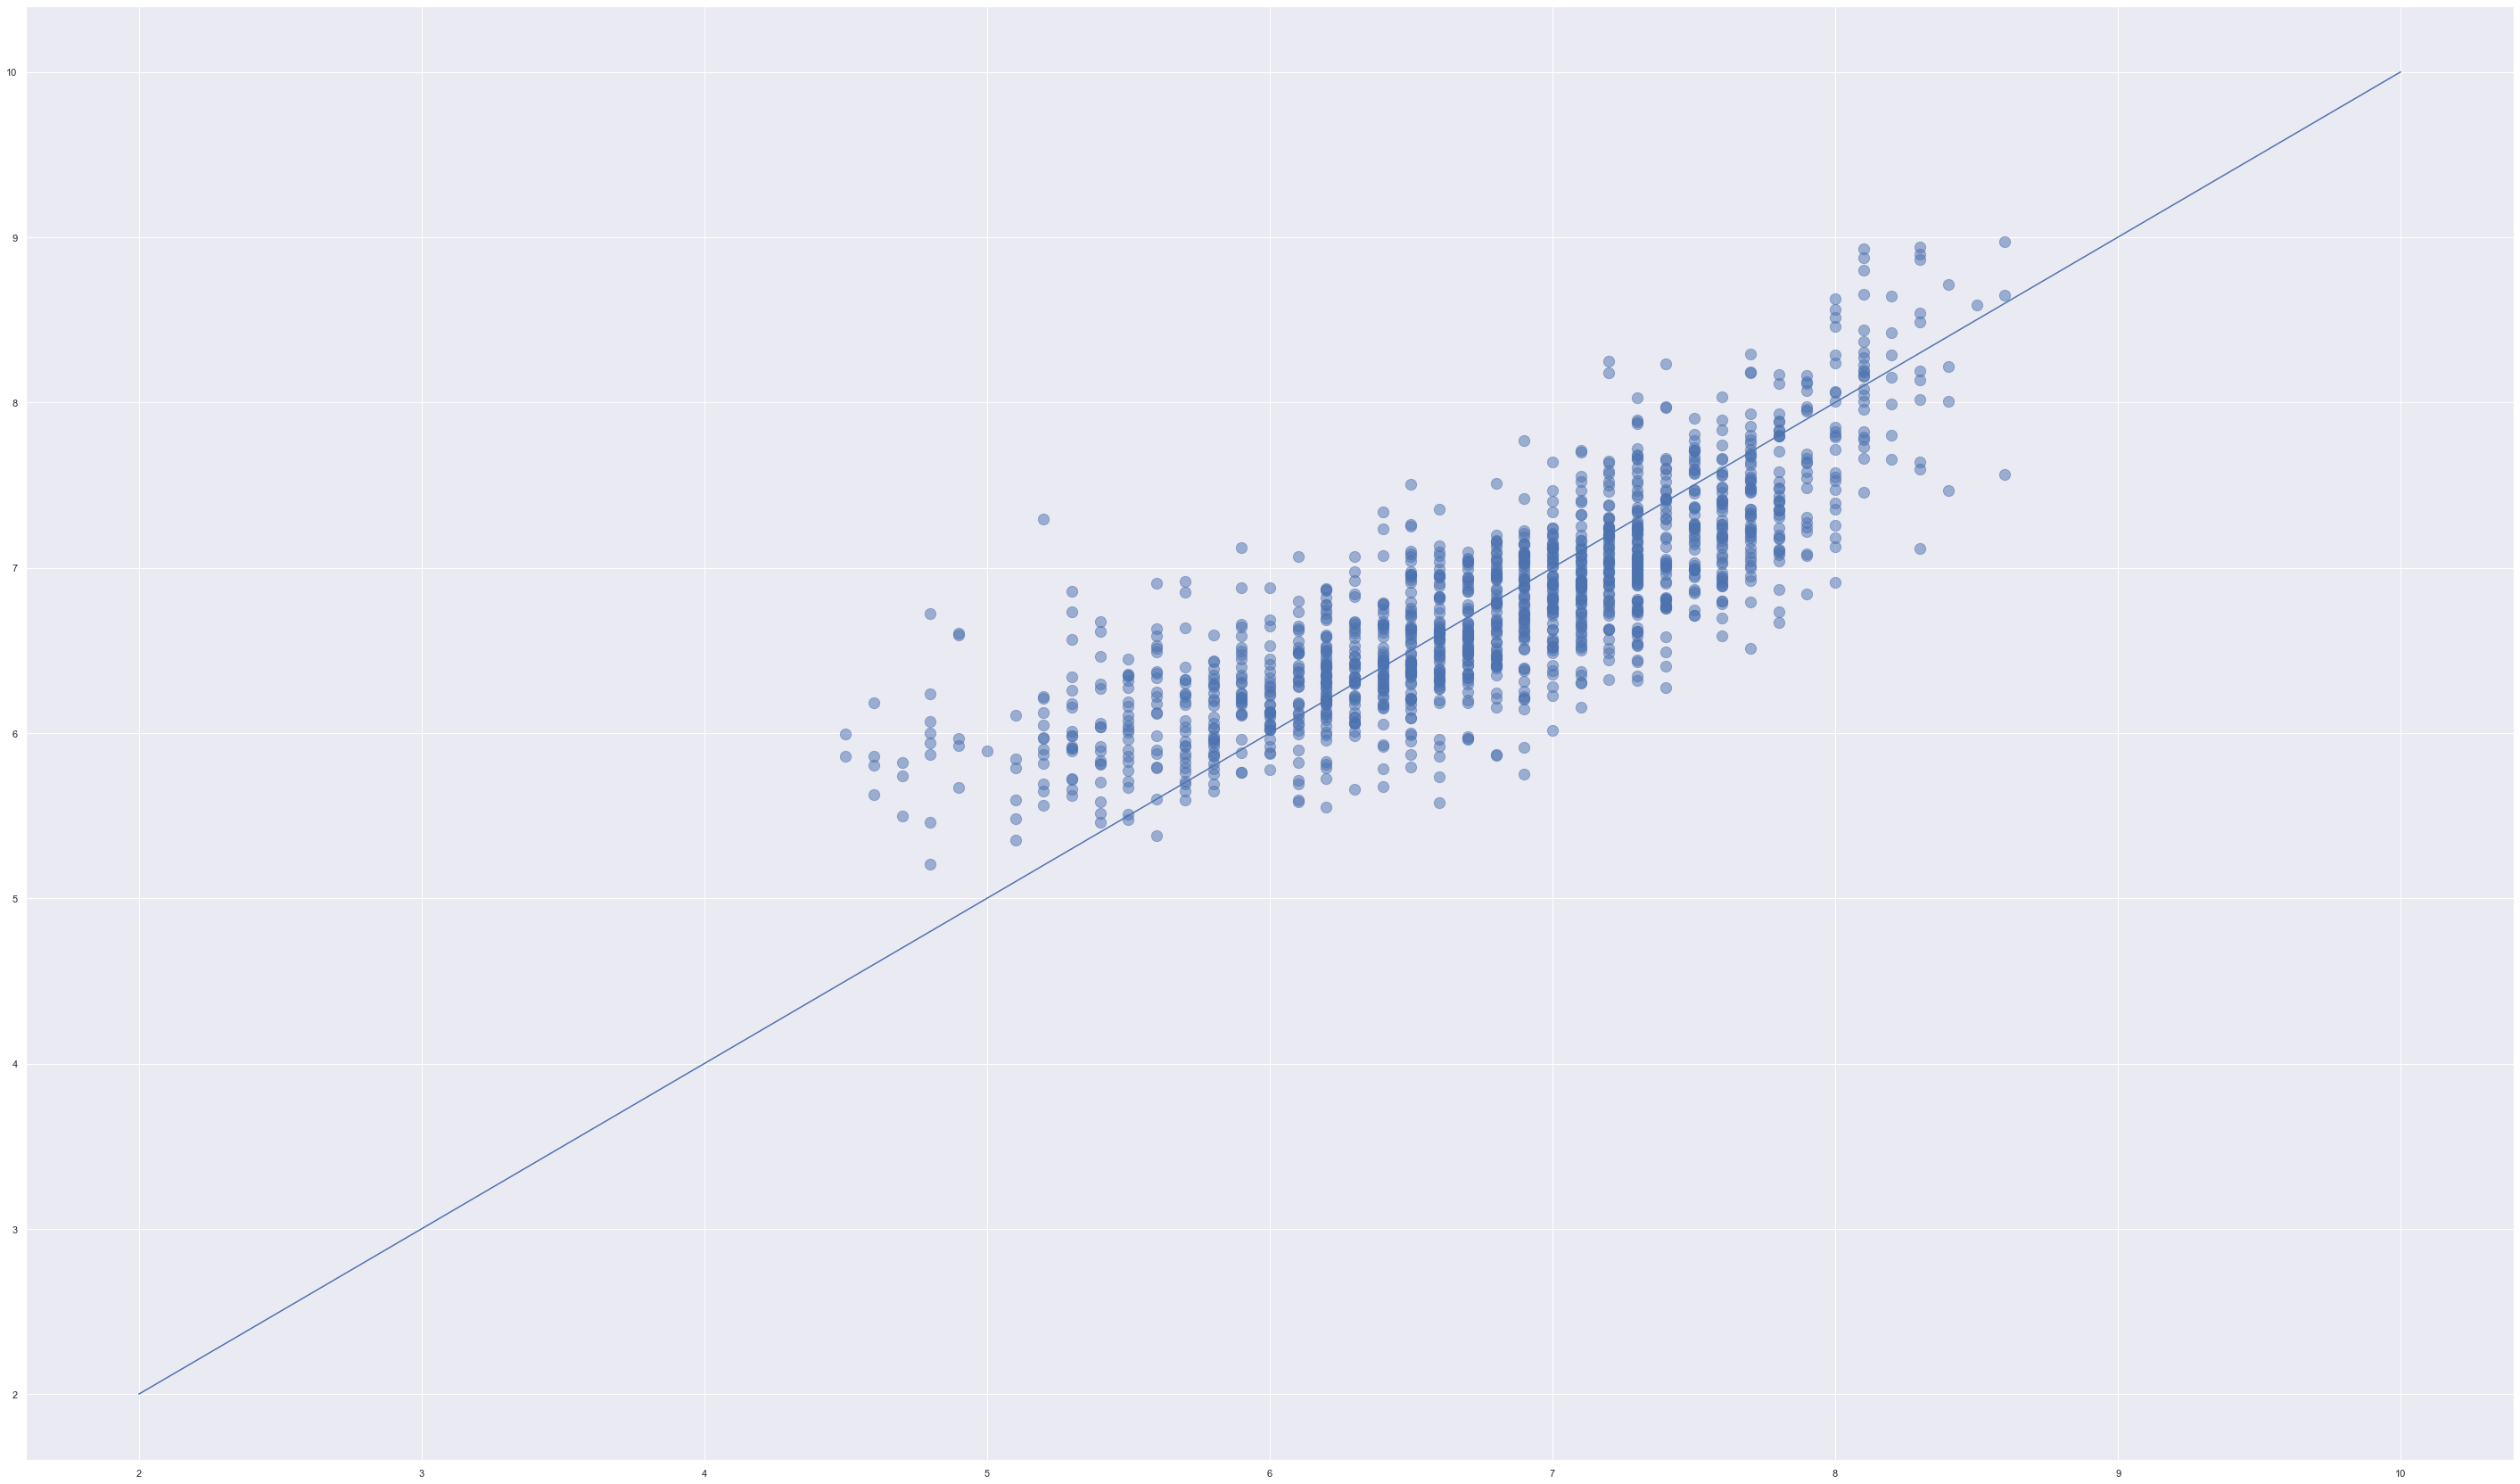

In [2446]:
# SIMPLE REG HAS THE LOWEST RMSE, SO WE WILL EVALUATE THIS MODEL AT THIS BASE LINE.
# EVALUATING THE MODEL

y_train_pred = lm.predict(X_train)

plt.scatter(y_train, y_train_pred, s=150, alpha=0.5)
plt.plot([2, 10], [2, 10]);

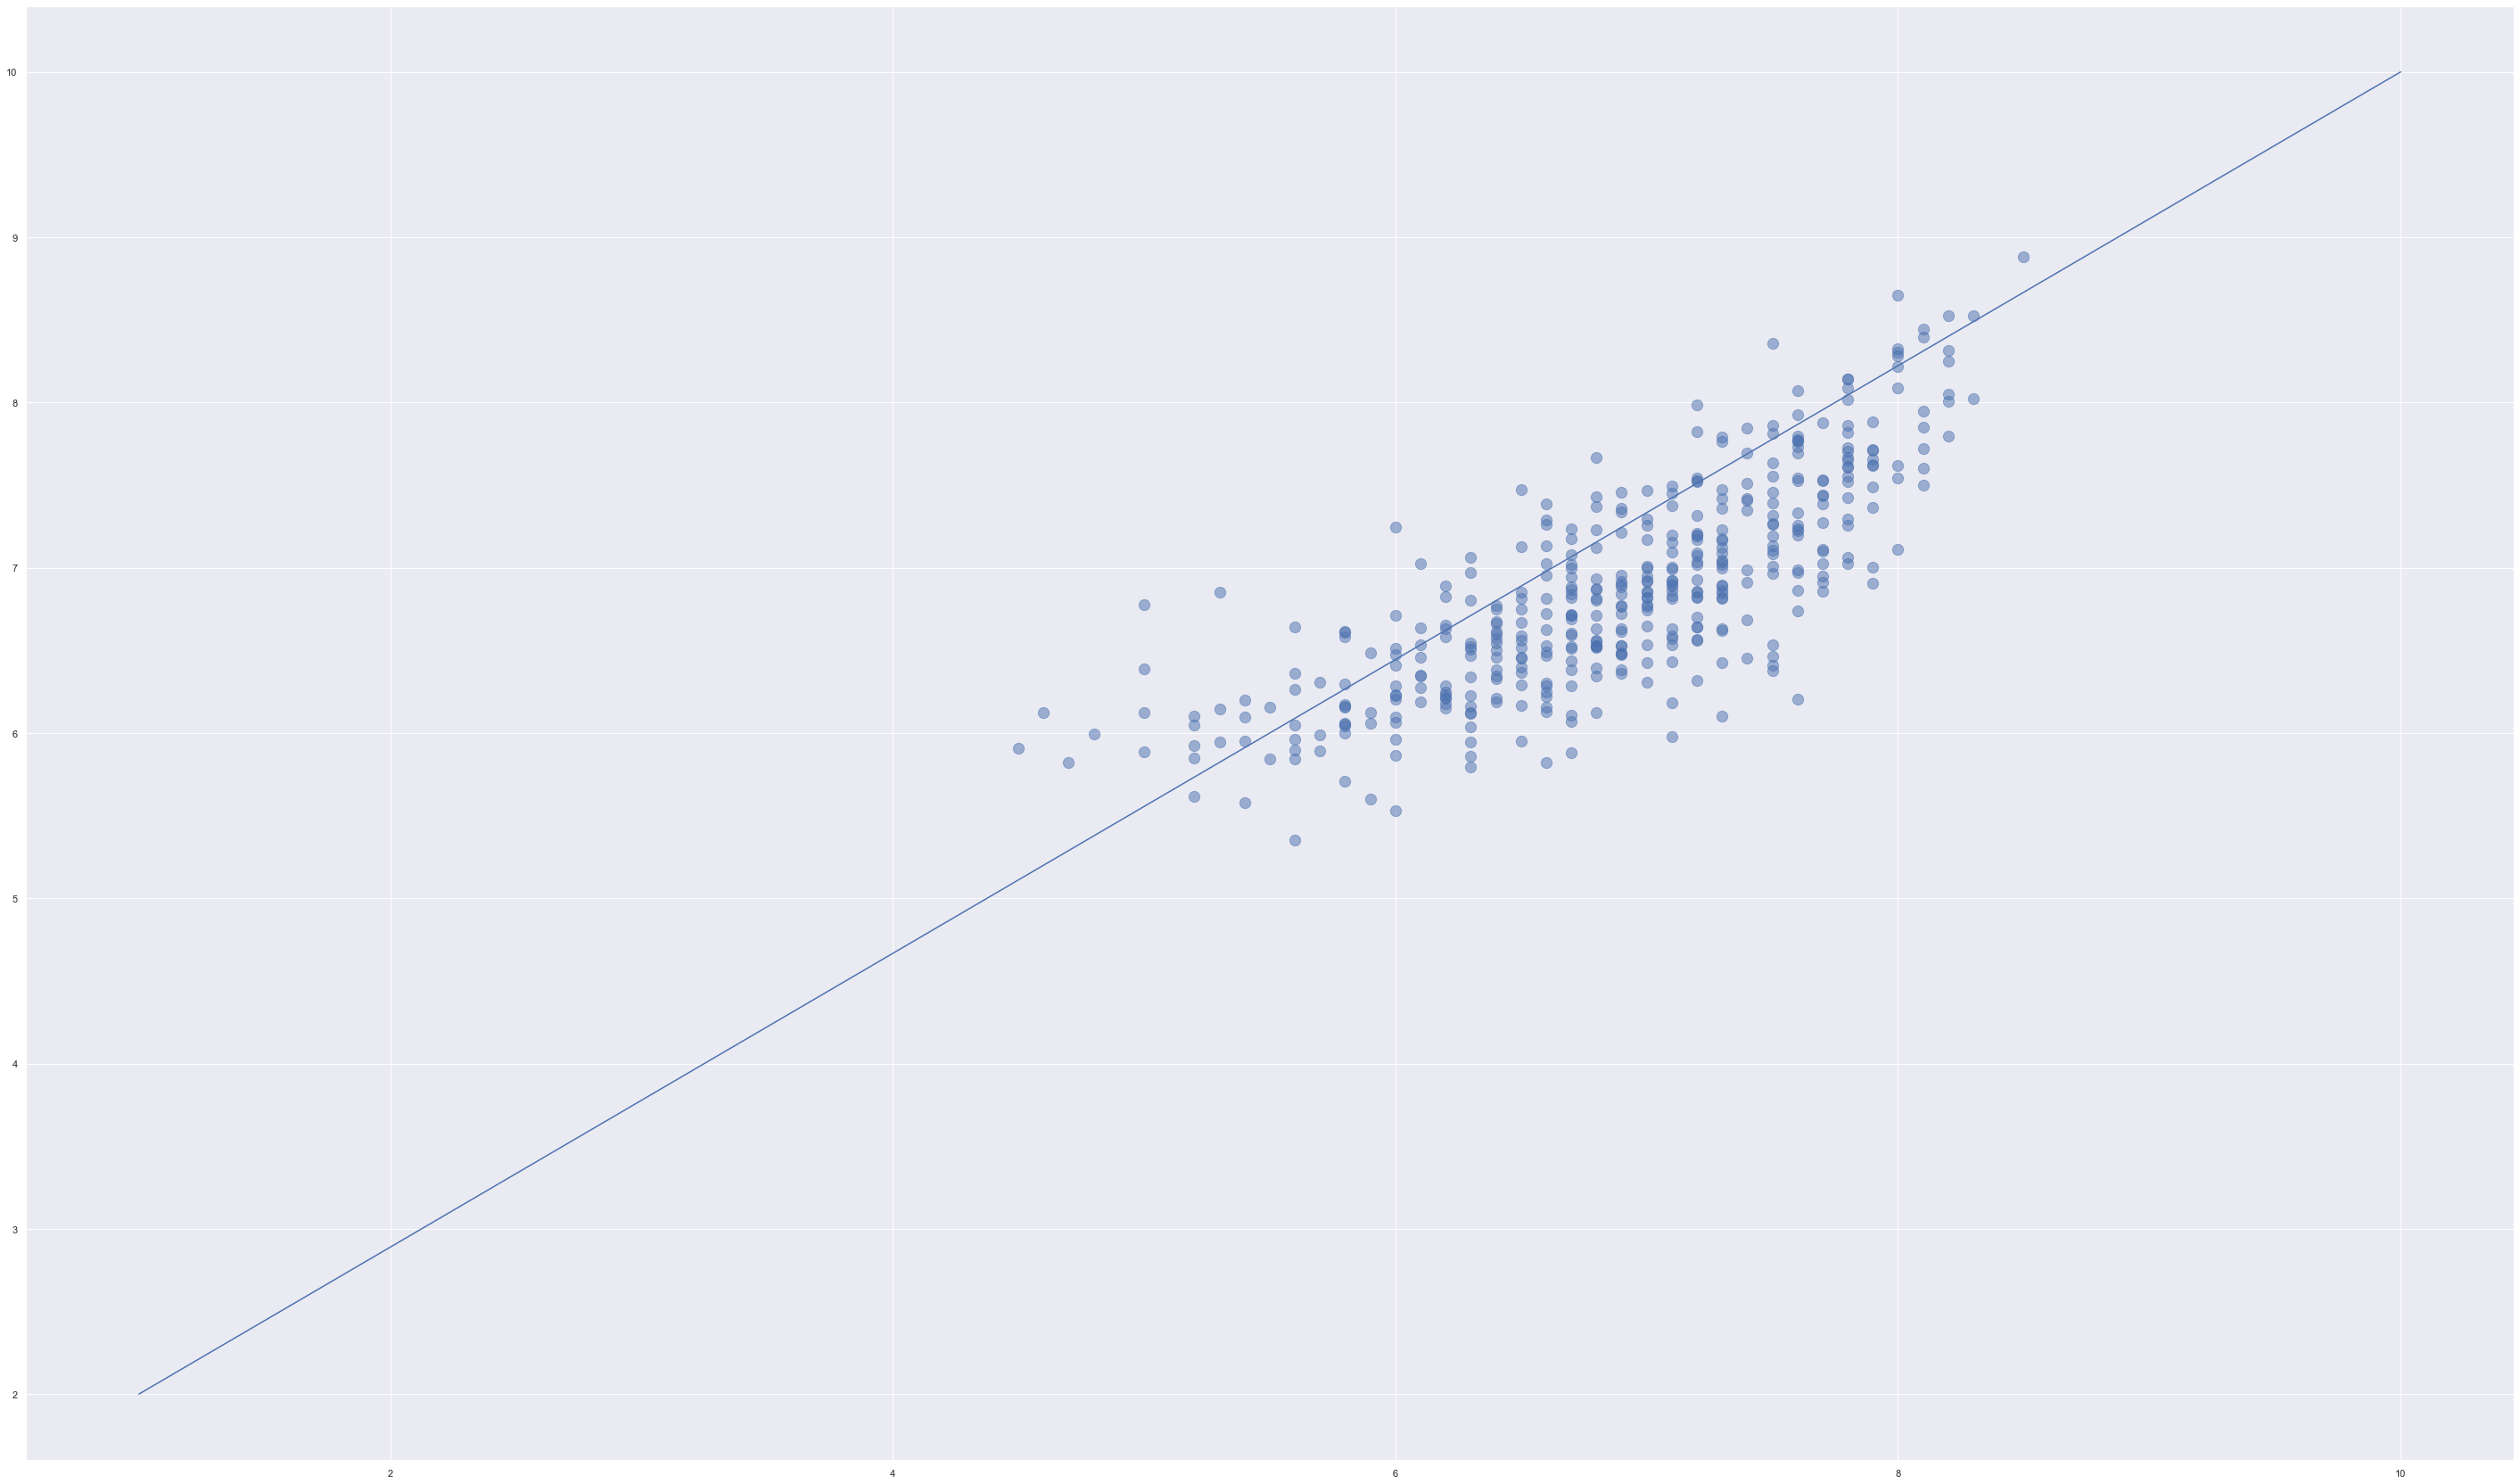

In [2447]:
# Fitted vs. Actual
y_test_pred = lm.predict(X_test)

plt.scatter(y_test, y_test_pred, s=150, alpha=0.5)
plt.plot([1, 10], [2, 10])

## MODEL 2

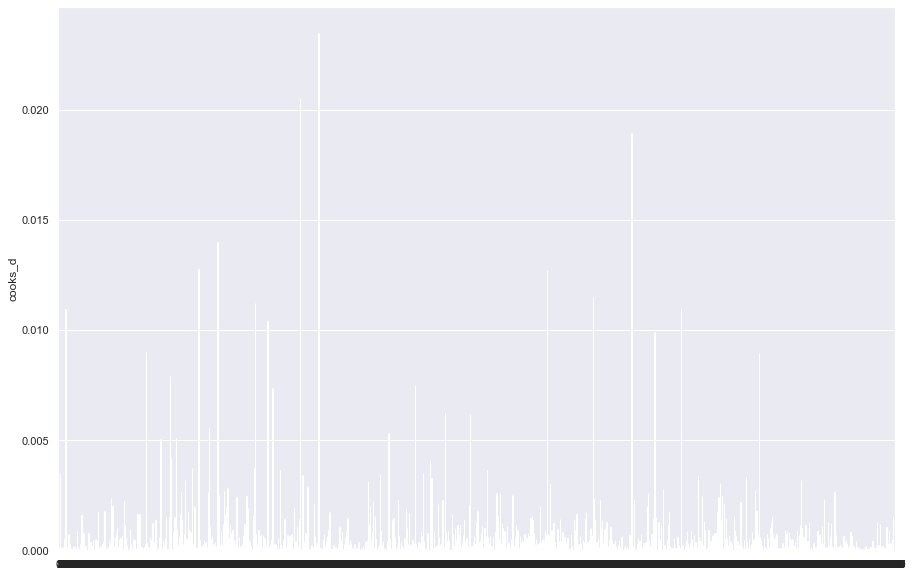

In [2448]:
#INFLUENCE AND COOKS DISTANCE

influence = regOLS_base.get_influence()
influence_frame = influence.summary_frame().reset_index()

sns.set(rc={"figure.figsize":(15, 10)})
sns.barplot(y = 'cooks_d',
            x = influence_frame.index,
            data = influence_frame);

In [2449]:
#VOTES show higher numbers, but we are below the reasonable threshold of 1. Even 0.5.
# So for the sake of interpretability, I am keeping them as is. 

max_index = influence_frame['cooks_d'].idxmax()
data_df1.iloc[max_index]

rating                    8.00
runtime_min             107.00
votes_norm              825.16
metascore                84.00
budget_mil                6.40
G                         0.00
PG                        0.00
PG-13                     0.00
R                         1.00
Action                    1.00
Adventure                 0.00
Animation                 0.00
Biography                 0.00
Comedy                    0.00
Crime                     0.00
Drama                     0.00
Horror                    0.00
Christopher Nolan         0.00
David Fincher             0.00
James Cameron             1.00
Martin Scorsese           0.00
Paul Thomas Anderson      0.00
Peter Jackson             0.00
Quentin Tarantino         0.00
Sam Mendes                0.00
Steven Spielberg          0.00
Wes Anderson              0.00
other                     0.00
Name: 713, dtype: float64

# Diagnostic Plots

In [2304]:
#TRANSFORMING FEATURES

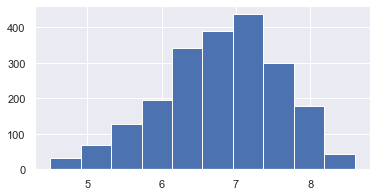

In [2451]:
plt.figure(figsize=(6,3))
plt.hist(data_df1['rating']);

Text(0.5, 0.98, 'Scatter Plot')

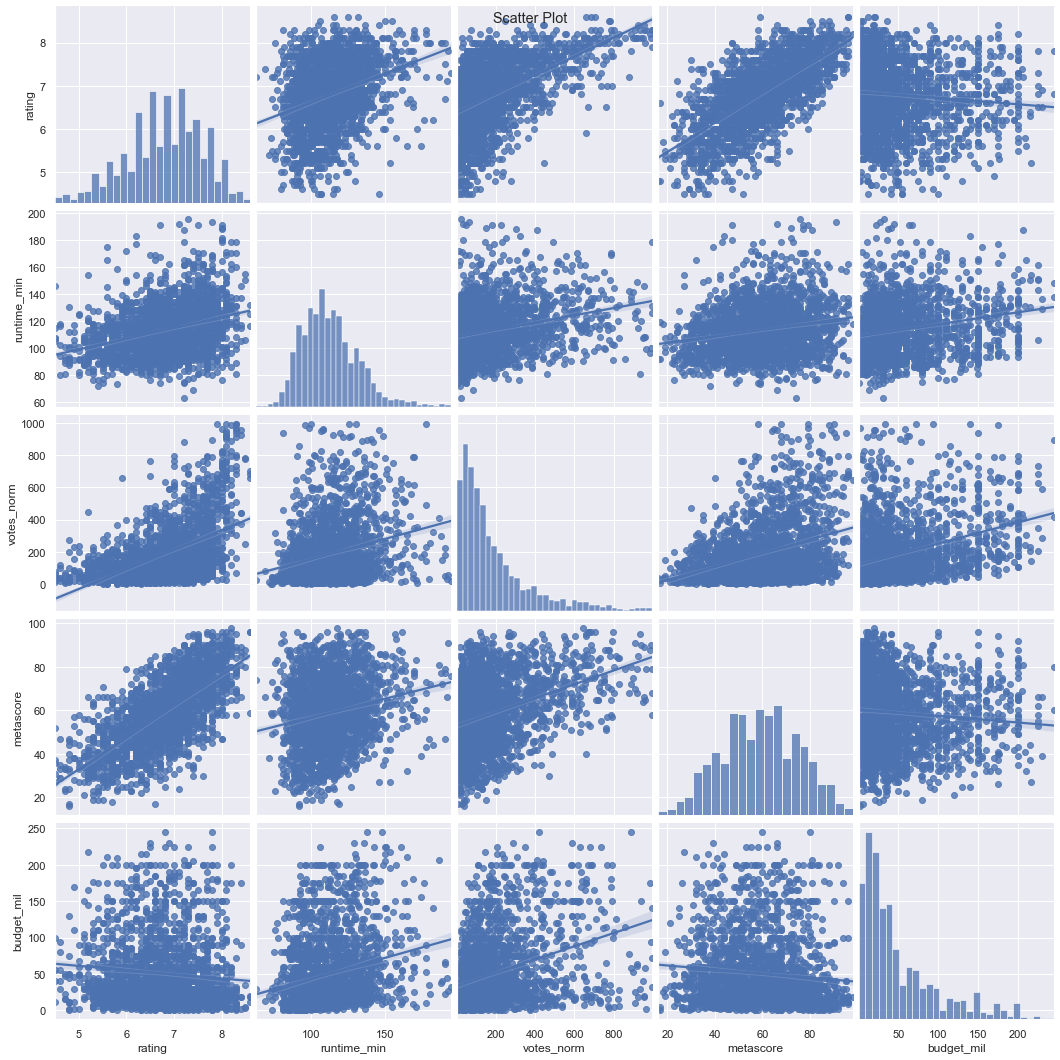

In [2452]:
g = sns.pairplot(data_df1[['rating', 'runtime_min', 'votes_norm', 'metascore', 'budget_mil']], height=3, diag_kind='hist', kind='reg')
g.fig.suptitle('Scatter Plot')

In [2453]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 4, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 4, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 4, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
    plt.subplot(1, 4, 4)
    plt.hist(res)
    plt.title("Residual histogram")

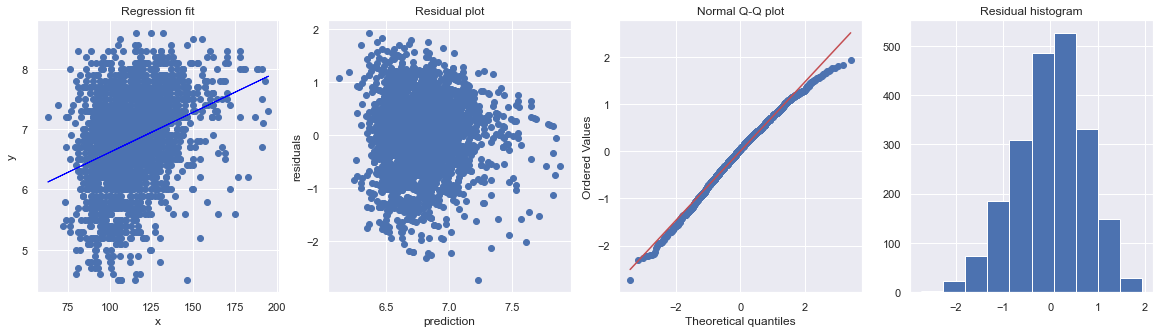

In [2511]:
x1 = data_df1['runtime_min']
y = data_df1['rating']

diagnostic_plot(x1.values.reshape(2112, 1), y); # we reshape x to turn it into a tall column

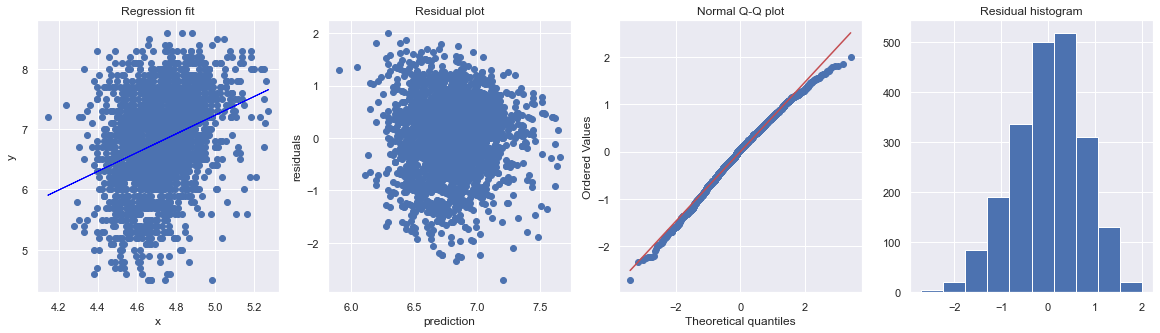

In [2512]:
x1 = np.log(data_df1['runtime_min'])
y = data_df1['rating']

diagnostic_plot(x1.values.reshape(2112, 1), y); # we reshape x to turn it into a tall column
#however, for interpretability keeping the non-log version.

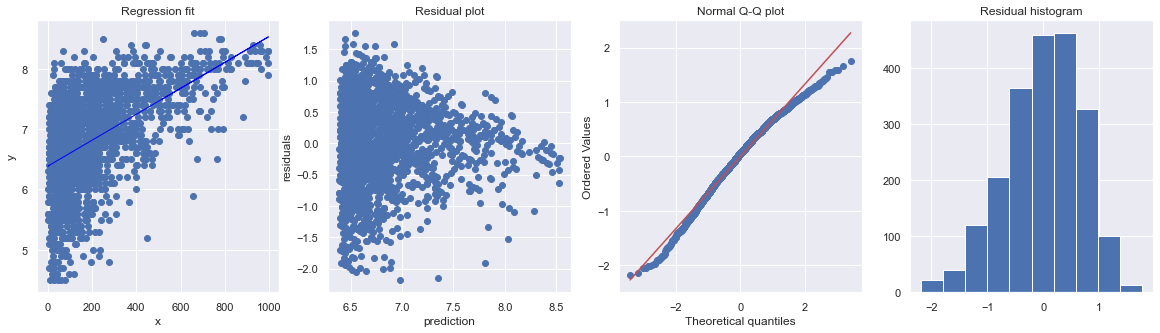

In [2657]:
x2 = data_df1['votes_norm']
y = data_df1['rating']

diagnostic_plot(x2.values.reshape(2112, 1), y); # we reshape x to turn it into a tall column

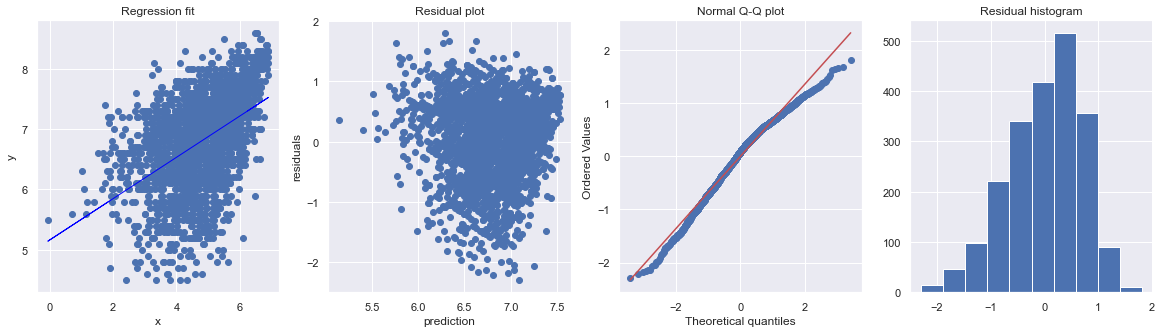

In [2459]:
x2_2 = np.log(data_df1['votes_norm'])
y = data_df1['rating']

diagnostic_plot(x2_2.values.reshape(2112, 1), y); # we reshape x to turn it into a tall column
#logging gave us worse results

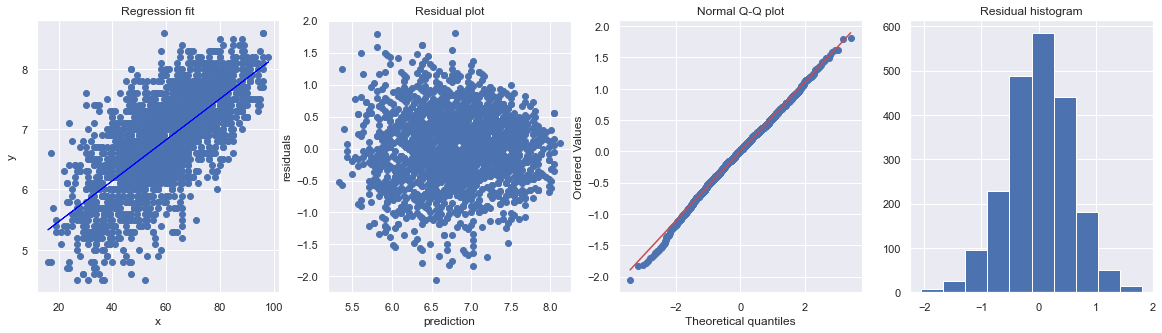

In [2457]:
x3 = data_df1['metascore']
y = data_df1['rating']

diagnostic_plot(x3.values.reshape(2112, 1), y); # we reshape x to turn it into a tall column

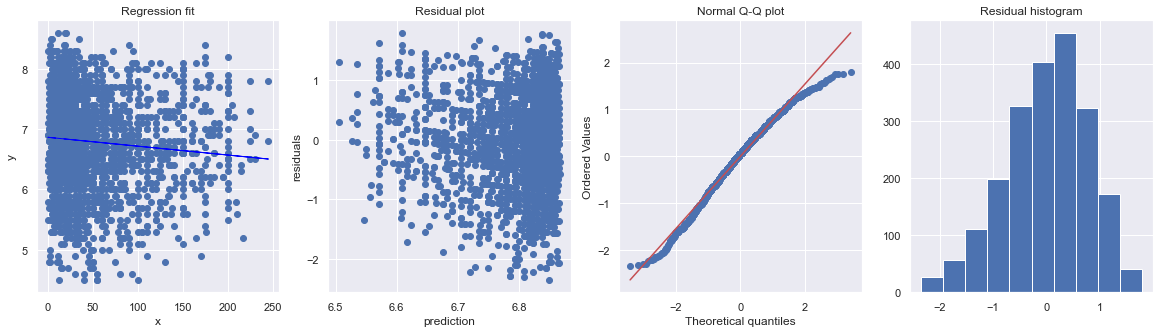

In [2458]:
x4 = data_df1['budget_mil']
y = data_df1['rating']

diagnostic_plot(x4.values.reshape(2112, 1), y); # we reshape x to turn it into a tall column

In [2461]:
data_df.columns

Index(['title', 'year', 'certificate', 'runtime_min', 'genre', 'sub_genre',
       'rating', 'votes', 'metascore', 'gross_mil', 'director', 'writer',
       'star', 'company', 'budget_mil', 'votes_norm', 'top_director',
       'sub_genre_2', 'cert_genre_temp', 'cert_genre', 'dir_averages',
       'writer_averages', 'star_averages', 'dir_writer_star_mult',
       'dir_writer_star_mean', 'G', 'PG', 'PG-13', 'R', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror',
       'PG Animation', 'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama',
       'R Action', 'R Biography', 'R Comedy', 'R Crime', 'R Drama',
       'other_combo', 'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson',
       'other'],
      dtype='object')

In [2666]:
data_df2 = data_df[['rating', 'runtime_min', 'votes_norm', 'metascore', 'budget_mil', 'PG Animation', 'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama',
       'R Action', 'R Biography', 'R Comedy', 'R Crime', 'R Drama','other_combo', 'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson','other','dir_writer_star_mean']]

In [2667]:
#data_df2['budget_sqrt'] = np.sqrt(data_df2['budget_mil'])
data_df2['runtime_log'] = np.log(data_df2['runtime_min'])
#data_df2['budget_2'] = data_df2['budget_mil'].astype(int)
#data_df2['votes_2'] = data_df2['votes_norm'].astype(int)
#data_df2.head()

<ipython-input-2667-d5f56ee11f3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df2['runtime_log'] = np.log(data_df2['runtime_min'])


In [2660]:
data_df2.head()

rating  runtime_min  votes_norm  metascore  budget_mil  PG Animation  \
0     7.6          103      516.21         63        18.0             0   
1     7.9          130      552.00         82        40.0             0   
2     7.6          102      175.55         78         6.9             0   
3     7.6          161      652.80         83        90.0             0   
4     7.0          107      190.14         75        85.0             1   

   PG-13 Action  PG-13 Comedy  PG-13 Drama  R Action  ...  Martin Scorsese  \
0             0             0            0         0  ...                0   
1             0             1            0         0  ...                0   
2             0             0            0         0  ...                0   
3             0             0            0         0  ...                0   
4             0             0            0         0  ...                0   

   Paul Thomas Anderson  Peter Jackson  Quentin Tarantino  Sam Mendes  \
0                     0              0                  0           0   
1                     0              0                  0           0   
2                     0              0                  0           0   
3                     0              0                  1           0   
4                     0              0                  0           0   

   Steven Spielberg  Wes Anderson  other  dir_writer_star_mean  runtime_log  
0                 0             0      1              7.116667     4.634729  
1                 0             0      1              7.323810     4.867534  
2                 0             0      1              7.464286     4.624973  
3                 0             0      0              7.681818     5.081404  
4                 0             0      1              7.083333     4.672829  

[5 rows x 28 columns]

In [2668]:
data_df2 = data_df2.drop(['runtime_min', 'dir_writer_star_mean'], axis=1)

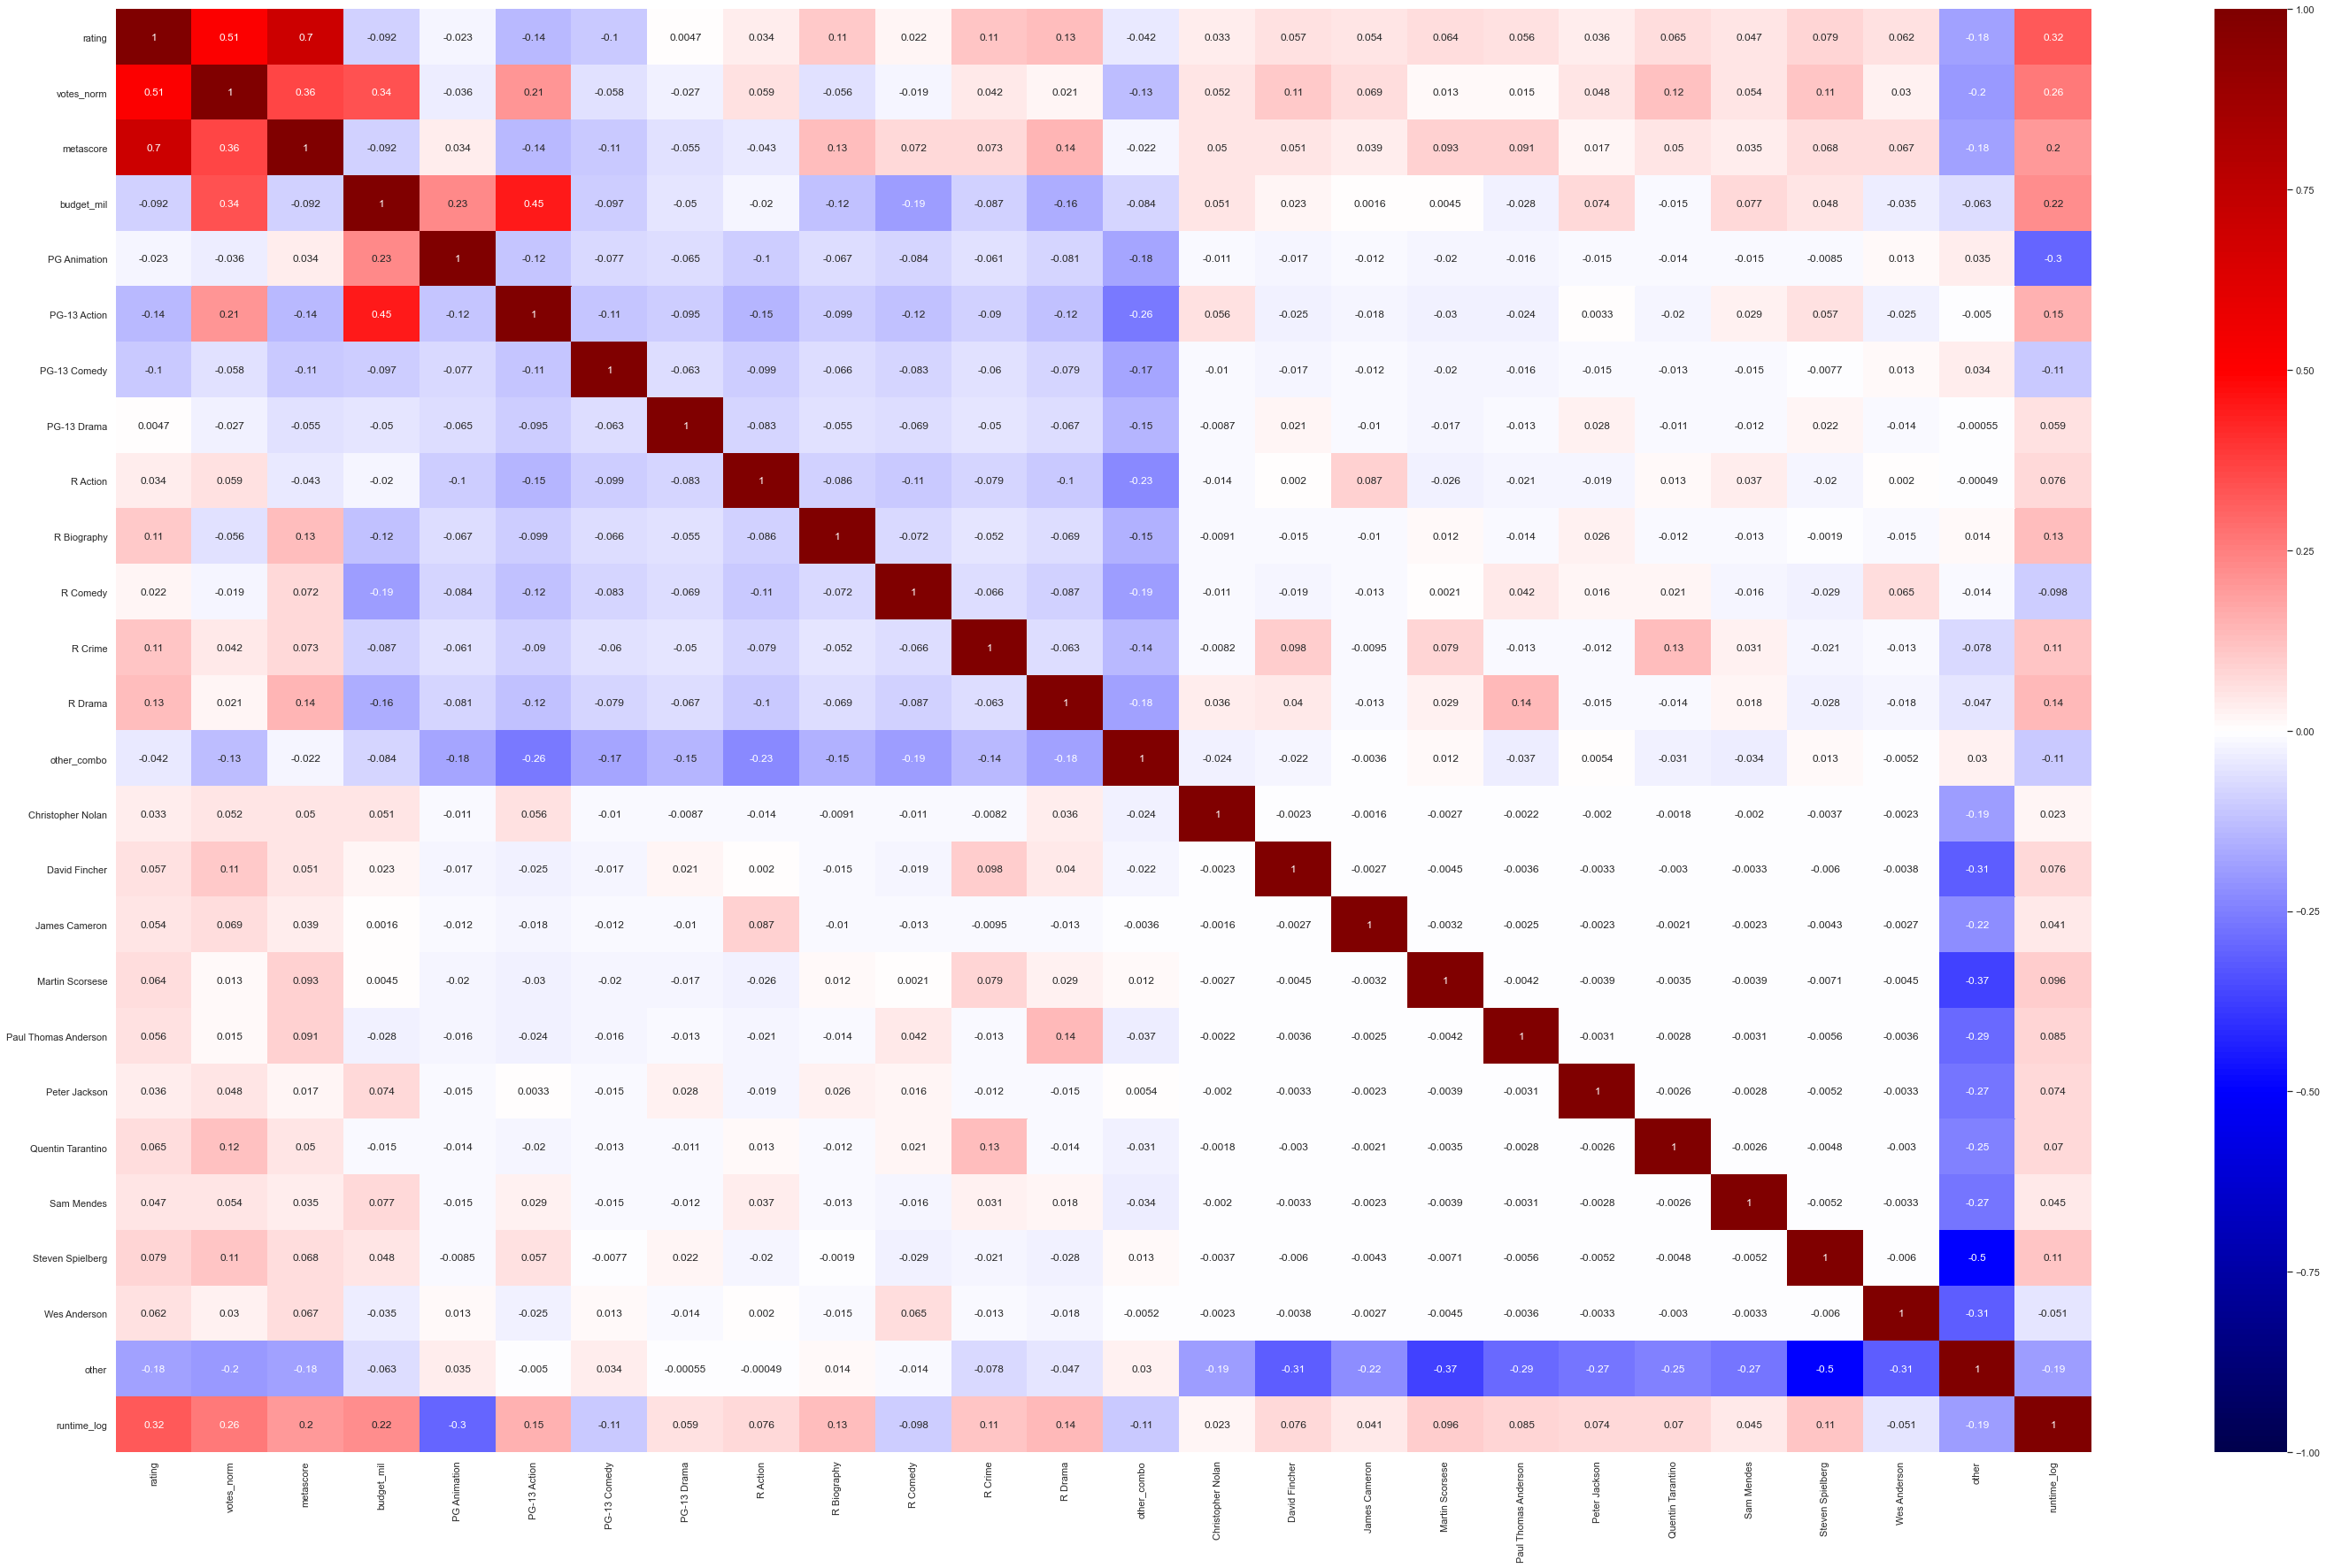

In [2669]:
sns.set(rc={"figure.figsize":(50, 30)})
sns.heatmap(data_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [2670]:
corr_mat = data_df2.corr()

corr_mat = corr_mat.unstack()

corr_mat = corr_mat[abs(corr_mat) >= 0.4]
corr_mat[corr_mat != 1]

rating            votes_norm          0.511703
                  metascore           0.701669
votes_norm        rating              0.511703
metascore         rating              0.701669
budget_mil        PG-13 Action        0.451952
PG-13 Action      budget_mil          0.451952
Steven Spielberg  other              -0.499301
other             Steven Spielberg   -0.499301
dtype: float64

In [2672]:
data_df2.columns

Index(['rating', 'votes_norm', 'metascore', 'budget_mil', 'PG Animation',
       'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama', 'R Action',
       'R Biography', 'R Comedy', 'R Crime', 'R Drama', 'other_combo',
       'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson',
       'other', 'runtime_log'],
      dtype='object')

In [2673]:
#Compare to other_combo, other director

X = data_df2.drop(['rating', 'other_combo', 'other'], axis=1)  # independent variables
y = data_df2['rating']   # dependent variables
X = sm.add_constant(X)
# fit the regression model
regOLS_2 = sm.OLS(y, X).fit()
regOLS_2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     157.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:21:58   Log-Likelihood:                -1408.2
No. Observations:                2112   AIC:                             2864.
Df Residuals:                    2088   BIC:                             3000.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6235      0.353      1.767      0.077      -0.068       1.315
votes_norm               0.0016   6.88e-05     22.804      0.000       0.001       0.002
metascore                0.0240      0.001     31.479      0.000       0.022       0.025
budget_mil              -0.0033      0.000    -11.544      0.000      -0.004      -0.003
PG Animation             0.2080      0.048      4.377      0.000       0.115       0.301
PG-13 Action            -0.1864      0.037     -5.009      0.000      -0.259      -0.113
PG-13 Comedy            -0.1052      0.044     -2.400      0.016      -0.191      -0.019
PG-13 Drama              0.0402      0.050      0.801      0.423      -0.058       0.139
R Action                 0.0018      0.037      0.048      0.962      -0.070       0.074
R Biography              0.0190      0.050      0.383      0.702      -0.079       0.117
R Comedy                -0.0940      0.041     -2.266      0.024      -0.175      -0.013
R Crime                  0.0557      0.054      1.032      0.302      -0.050       0.161
R Drama                 -0.0517      0.044     -1.177      0.239      -0.138       0.034
Christopher Nolan        0.0012      0.275      0.005      0.996      -0.539       0.541
David Fincher           -0.2798      0.170     -1.643      0.101      -0.614       0.054
James Cameron           -0.0212      0.239     -0.089      0.929      -0.490       0.447
Martin Scorsese         -0.0889      0.145     -0.613      0.540      -0.373       0.196
Paul Thomas Anderson    -0.2085      0.182     -1.142      0.253      -0.566       0.149
Peter Jackson            0.1526      0.195      0.782      0.435      -0.230       0.536
Quentin Tarantino       -0.3896      0.216     -1.800      0.072      -0.814       0.035
Sam Mendes               0.2788      0.195      1.429      0.153      -0.104       0.662
Steven Spielberg        -0.0497      0.108     -0.459      0.646      -0.262       0.162
Wes Anderson             0.2607      0.169      1.542      0.123      -0.071       0.592
runtime_log              0.9870      0.077     12.789      0.000       0.836       1.138
==============================================================================
Omnibus:                       85.723   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.940
Skew:                          -0.403   Prob(JB):                     4.04e-26
Kurtosis:                       3.825   Cond. No.                     9.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+03. This might indicate that there are
strong multicollinearity o

In [2675]:
#Removing high p directors

X = data_df2.drop(['rating', 'other_combo', 'other', 'Christopher Nolan', 'Steven Spielberg', 'James Cameron', 'Martin Scorsese'], axis=1)  # independent variables
y = data_df2['rating']   # dependent variables
X = sm.add_constant(X)
# fit the regression model
regOLS_2 = sm.OLS(y, X).fit()
regOLS_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:26:05   Log-Likelihood:                -1408.5
No. Observations:                2112   AIC:                             2857.
Df Residuals:                    2092   BIC:                             2970.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6583      0.349      1.885      0.060      -0.027       1.343
votes_norm               0.0016   6.84e-05     22.922      0.000       0.001       0.002
metascore                0.0239      0.001     31.585      0.000       0.022       0.025
budget_mil              -0.0033      0.000    -11.572      0.000      -0.004      -0.003
PG Animation             0.2079      0.047      4.380      0.000       0.115       0.301
PG-13 Action            -0.1858      0.037     -5.005      0.000      -0.259      -0.113
PG-13 Comedy            -0.1048      0.044     -2.394      0.017      -0.191      -0.019
PG-13 Drama              0.0408      0.050      0.813      0.416      -0.058       0.139
R Action                 0.0029      0.037      0.080      0.936      -0.069       0.075
R Biography              0.0203      0.050      0.408      0.684      -0.077       0.118
R Comedy                -0.0933      0.041     -2.254      0.024      -0.174      -0.012
R Crime                  0.0550      0.054      1.024      0.306      -0.050       0.160
R Drama                 -0.0506      0.044     -1.155      0.248      -0.136       0.035
David Fincher           -0.2761      0.170     -1.623      0.105      -0.610       0.057
Paul Thomas Anderson    -0.2051      0.182     -1.125      0.261      -0.563       0.152
Peter Jackson            0.1556      0.195      0.798      0.425      -0.227       0.538
Quentin Tarantino       -0.3851      0.216     -1.781      0.075      -0.809       0.039
Sam Mendes               0.2813      0.195      1.443      0.149      -0.101       0.664
Wes Anderson             0.2617      0.169      1.549      0.122      -0.070       0.593
runtime_log              0.9798      0.076     12.812      0.000       0.830       1.130
==============================================================================
Omnibus:                       84.989   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.691
Skew:                          -0.401   Prob(JB):                     7.55e-26
Kurtosis:                       3.820   Cond. No.                     9.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# R^2 dropped a bit to 0.635, Adj. R^2 0.631, but our coefficients are more reliable.

In [2676]:
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})


variables       VIF
0             votes_norm  1.506289
1              metascore  1.401181
2             budget_mil  1.862259
3           PG Animation  1.425447
4           PG-13 Action  1.606551
5           PG-13 Comedy  1.175599
6            PG-13 Drama  1.139645
7               R Action  1.282247
8            R Biography  1.195993
9               R Comedy  1.226174
10               R Crime  1.178101
11               R Drama  1.278362
12         David Fincher  1.027921
13  Paul Thomas Anderson  1.033238
14         Peter Jackson  1.015052
15     Quentin Tarantino  1.038955
16            Sam Mendes  1.013539
17          Wes Anderson  1.013629
18           runtime_log  1.468658

In [2678]:
from sklearn.model_selection import KFold


X, y = data_df2.drop(['rating', 'other_combo', 'other', 'Christopher Nolan', 'Steven Spielberg', 'James Cameron', 'Martin Scorsese'], axis=1), data_df2['rating']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [2679]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LassoCV

kf = KFold(n_splits=5, shuffle=True)
lm_r2, lm_ridge_r2, lm_lasso_r2 = [], [], [] #collect the validation results for both models

alphas = 10**np.linspace(-2, 2, 200)

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #Regressions
    lm = LinearRegression()
    lm_ridge = RidgeCV(alphas=alphas)
    lm_lasso = LassoCV(alphas=alphas)

    #Simple linear fit
    lm.fit(X_train, y_train)
    lm_r2.append(lm.score(X_val, y_val))
    
    #Ridge fit
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    lm_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    #Lasso fit
    lm_lasso.fit(X_train_scaled, y_train)
    lm_lasso_r2.append(lm_lasso.score(X_val_scaled, y_val))


print('Simple regression scores: ', lm_r2, '\n')
print('Ridge scores: ', lm_ridge_r2, '\n')
print('Lasso scores: ', lm_lasso_r2, '\n')


print(f'Simple mean r^2: {np.mean(lm_r2):.3f} +- {np.std(lm_r2):.3f}')
print(f'Ridge mean r^2: {np.mean(lm_ridge_r2):.3f} +- {np.std(lm_ridge_r2):.3f}')
print(f'Lasso mean r^2: {np.mean(lm_lasso_r2):.3f} +- {np.std(lm_lasso_r2):.3f}', '\n')

print('Ridge alpha', lm_ridge.alpha_)
print('Lasso alpha', lm_lasso.alpha_)

Simple regression scores:  [0.6747028129091195, 0.6478268599703312, 0.6379480927455474, 0.5762259377959904, 0.6276471852233476] 

Ridge scores:  [0.6741245958715499, 0.6485888552010839, 0.6376143478455444, 0.5769203100295739, 0.6273513542290483] 

Lasso scores:  [0.6713061780028591, 0.6441301899677069, 0.6375722995081281, 0.5801128148780863, 0.6237947240983727] 

Simple mean r^2: 0.633 +- 0.032
Ridge mean r^2: 0.633 +- 0.032
Lasso mean r^2: 0.631 +- 0.030 

Ridge alpha 20.72921779595372
Lasso alpha 0.01


In [2680]:
#RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = lm.predict(X_val)
pred_ridge = lm_ridge.predict(X_val_scaled)
pred_lasso = lm_lasso.predict(X_val_scaled)

print('Simple reg RMSE:'+str(np.sqrt(mean_squared_error(pred,y_val))))
print('Simple reg MAE:'+str(mean_absolute_error(pred,y_val)), '\n')

print('Ridge RMSE:'+str(np.sqrt(mean_squared_error(pred_ridge,y_val))))
print('Ridge MAE:'+str(mean_absolute_error(pred_ridge,y_val)), '\n')

print('Lasso RMSE:'+str(np.sqrt(mean_squared_error(pred_lasso,y_val))))
print('Lasso MAE:'+str(mean_absolute_error(pred_lasso,y_val)), '\n')

Simple reg RMSE:0.47662003656105467
Simple reg MAE:0.3863691673750603 

Ridge RMSE:0.4768093341562867
Ridge MAE:0.3868479377969975 

Lasso RMSE:0.4790793106025752
Lasso MAE:0.38880874580992714 



In [2681]:
#Simple linear test score

print('Simple reg test: ', lm.score(X_test, y_test))

#Ridge test score
X_test_scaled = scaler.fit_transform(X_test)
print('Ridge reg test', lm_ridge.score(X_test_scaled, y_test))

#Lasso test score
print('Lasso reg test', lm_lasso.score(X_test_scaled, y_test))

Simple reg test:  0.6160213761258275
Ridge reg test 0.5966860846747223
Lasso reg test 0.5934150833807972


# MODEL 3

In [ ]:
#Adding the interactive term

In [2683]:
data_df2.columns

Index(['rating', 'votes_norm', 'metascore', 'budget_mil', 'PG Animation',
       'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama', 'R Action',
       'R Biography', 'R Comedy', 'R Crime', 'R Drama', 'other_combo',
       'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson',
       'other', 'runtime_log'],
      dtype='object')

In [2730]:
data_df3 = data_df2

In [2731]:
data_df3 = data_df3.drop(['other_combo', 'other', 'Christopher Nolan', 'Steven Spielberg', 'James Cameron', 'Martin Scorsese'], axis=1)
data_df3['dir_writer_star_mean'] = data_df['dir_writer_star_mean']


In [2732]:
data_df3.columns

Index(['rating', 'votes_norm', 'metascore', 'budget_mil', 'PG Animation',
       'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama', 'R Action',
       'R Biography', 'R Comedy', 'R Crime', 'R Drama', 'David Fincher',
       'Paul Thomas Anderson', 'Peter Jackson', 'Quentin Tarantino',
       'Sam Mendes', 'Wes Anderson', 'runtime_log', 'dir_writer_star_mean'],
      dtype='object')

In [2733]:
#Compare to other_combo, other director

X = data_df3.drop('rating', axis=1)  # independent variables
y = data_df3['rating']   # dependent variables
X = sm.add_constant(X)
# fit the regression model
regOLS_3 = sm.OLS(y, X).fit()
regOLS_3.summary()


/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     392.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:27:22   Log-Likelihood:                -825.08
No. Observations:                2112   AIC:                             1692.
Df Residuals:                    2091   BIC:                             1811.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.9267      0.268     -3.456      0.001      -1.452      -0.401
votes_norm               0.0012   5.28e-05     22.573      0.000       0.001       0.001
metascore                0.0117      0.001     17.952      0.000       0.010       0.013
budget_mil              -0.0030      0.000    -13.779      0.000      -0.003      -0.003
PG Animation             0.1757      0.036      4.877      0.000       0.105       0.246
PG-13 Action            -0.1354      0.028     -4.804      0.000      -0.191      -0.080
PG-13 Comedy            -0.0522      0.033     -1.570      0.117      -0.117       0.013
PG-13 Drama             -0.0058      0.038     -0.153      0.879      -0.081       0.069
R Action                -0.0245      0.028     -0.880      0.379      -0.079       0.030
R Biography             -0.0090      0.038     -0.239      0.811      -0.083       0.065
R Comedy                -0.1047      0.031     -3.334      0.001      -0.166      -0.043
R Crime                 -0.0180      0.041     -0.442      0.659      -0.098       0.062
R Drama                 -0.0939      0.033     -2.824      0.005      -0.159      -0.029
David Fincher           -0.0451      0.129     -0.349      0.727      -0.299       0.208
Paul Thomas Anderson    -0.2065      0.138     -1.493      0.136      -0.478       0.065
Peter Jackson            0.1280      0.148      0.865      0.387      -0.162       0.418
Quentin Tarantino       -0.4569      0.164     -2.785      0.005      -0.779      -0.135
Sam Mendes               0.0801      0.148      0.541      0.588      -0.210       0.370
Wes Anderson             0.0718      0.128      0.560      0.575      -0.180       0.323
runtime_log              0.4308      0.060      7.217      0.000       0.314       0.548
dir_writer_star_mean     0.7236      0.018     39.272      0.000       0.687       0.760
==============================================================================
Omnibus:                       83.617   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.916
Skew:                          -0.411   Prob(JB):                     2.23e-24
Kurtosis:                       3.749   Cond. No.                     9.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#keep runtime in minutes. For every one minute increase, rating increases by 0.045.
# for every 10 min increase, rating increases by 0.45. 

In [2734]:
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})



variables       VIF
0             votes_norm  1.557672
1              metascore  1.810270
2             budget_mil  1.864838
3           PG Animation  1.426186
4           PG-13 Action  1.609878
5           PG-13 Comedy  1.177510
6            PG-13 Drama  1.140754
7               R Action  1.283054
8            R Biography  1.196461
9               R Comedy  1.226280
10               R Crime  1.180552
11               R Drama  1.279771
12         David Fincher  1.030055
13  Paul Thomas Anderson  1.033238
14         Peter Jackson  1.015075
15     Quentin Tarantino  1.039085
16            Sam Mendes  1.014754
17          Wes Anderson  1.015070
18           runtime_log  1.553895
19  dir_writer_star_mean  1.803849

In [2735]:
from sklearn.model_selection import KFold

X, y = data_df3.drop('rating', axis=1), data_df3['rating']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [2736]:
kf = KFold(n_splits=5, shuffle=True)
lm_r2, lm_ridge_r2, lm_lasso_r2 = [], [], [] #collect the validation results for both models

alphas = 10**np.linspace(-2, 2, 200)

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #Regressions
    lm = LinearRegression()
    lm_ridge = RidgeCV(alphas=alphas)
    lm_lasso = LassoCV(alphas=alphas)

    #Simple linear fit
    lm.fit(X_train, y_train)
    lm_r2.append(lm.score(X_val, y_val))
    
    #Ridge fit
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    lm_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    #Lasso fit
    lm_lasso.fit(X_train_scaled, y_train)
    lm_lasso_r2.append(lm_lasso.score(X_val_scaled, y_val))


print('Simple regression scores: ', lm_r2, '\n')
print('Ridge scores: ', lm_ridge_r2, '\n')
print('Lasso scores: ', lm_lasso_r2, '\n')


print(f'Simple mean r^2: {np.mean(lm_r2):.3f} +- {np.std(lm_r2):.3f}')
print(f'Ridge mean r^2: {np.mean(lm_ridge_r2):.3f} +- {np.std(lm_ridge_r2):.3f}')
print(f'Lasso mean r^2: {np.mean(lm_lasso_r2):.3f} +- {np.std(lm_lasso_r2):.3f}', '\n')

print('Ridge alpha', lm_ridge.alpha_)
print('Lasso alpha', lm_lasso.alpha_)

Simple regression scores:  [0.804815066803909, 0.7539908224712756, 0.8133847651487016, 0.7984673447063211, 0.7793362006476178] 

Ridge scores:  [0.8045732603908193, 0.7545969496454475, 0.8132764562760231, 0.7990966032109107, 0.7784923397879226] 

Lasso scores:  [0.8000641881178472, 0.7528514771506747, 0.8126191346556444, 0.8008125936118066, 0.7791524001383463] 

Simple mean r^2: 0.790 +- 0.021
Ridge mean r^2: 0.790 +- 0.021
Lasso mean r^2: 0.789 +- 0.021 

Ridge alpha 19.791668678535572
Lasso alpha 0.01


In [2737]:
#RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = lm.predict(X_val)
pred_ridge = lm_ridge.predict(X_val_scaled)
pred_lasso = lm_lasso.predict(X_val_scaled)

print('Simple reg RMSE:'+str(np.sqrt(mean_squared_error(pred,y_val))))
print('Simple reg MAE:'+str(mean_absolute_error(pred,y_val)), '\n')

print('Ridge RMSE:'+str(np.sqrt(mean_squared_error(pred_ridge,y_val))))
print('Ridge MAE:'+str(mean_absolute_error(pred_ridge,y_val)), '\n')

print('Lasso RMSE:'+str(np.sqrt(mean_squared_error(pred_lasso,y_val))))
print('Lasso MAE:'+str(mean_absolute_error(pred_lasso,y_val)), '\n')

Simple reg RMSE:0.35887262122581637
Simple reg MAE:0.26818209517429703 

Ridge RMSE:0.3595581654419545
Ridge MAE:0.26833414451821097 

Lasso RMSE:0.3590220504503042
Lasso MAE:0.26865084584701826 



In [2738]:
#Simple linear test score

print('Simple reg test: ', lm.score(X_test, y_test))

#Ridge test score
X_test_scaled = scaler.fit_transform(X_test)
print('Ridge reg test', lm_ridge.score(X_test_scaled, y_test))

#Lasso test score
print('Lasso reg test', lm_lasso.score(X_test_scaled, y_test))

Simple reg test:  0.7538771898291796
Ridge reg test 0.7357348128705195
Lasso reg test 0.733335010415531


In [2739]:
print(data_df3.drop('rating', axis=1).columns)
print(lm_lasso.coef_)

Index(['votes_norm', 'metascore', 'budget_mil', 'PG Animation', 'PG-13 Action',
       'PG-13 Comedy', 'PG-13 Drama', 'R Action', 'R Biography', 'R Comedy',
       'R Crime', 'R Drama', 'David Fincher', 'Paul Thomas Anderson',
       'Peter Jackson', 'Quentin Tarantino', 'Sam Mendes', 'Wes Anderson',
       'runtime_log', 'dir_writer_star_mean'],
      dtype='object')
[ 0.19947069  0.20038562 -0.09936289  0.0216622  -0.04956545 -0.00400175
  0.         -0.          0.         -0.01794584  0.         -0.
 -0.         -0.01032872  0.00081071 -0.01184176 -0.          0.
  0.04163358  0.41633972]


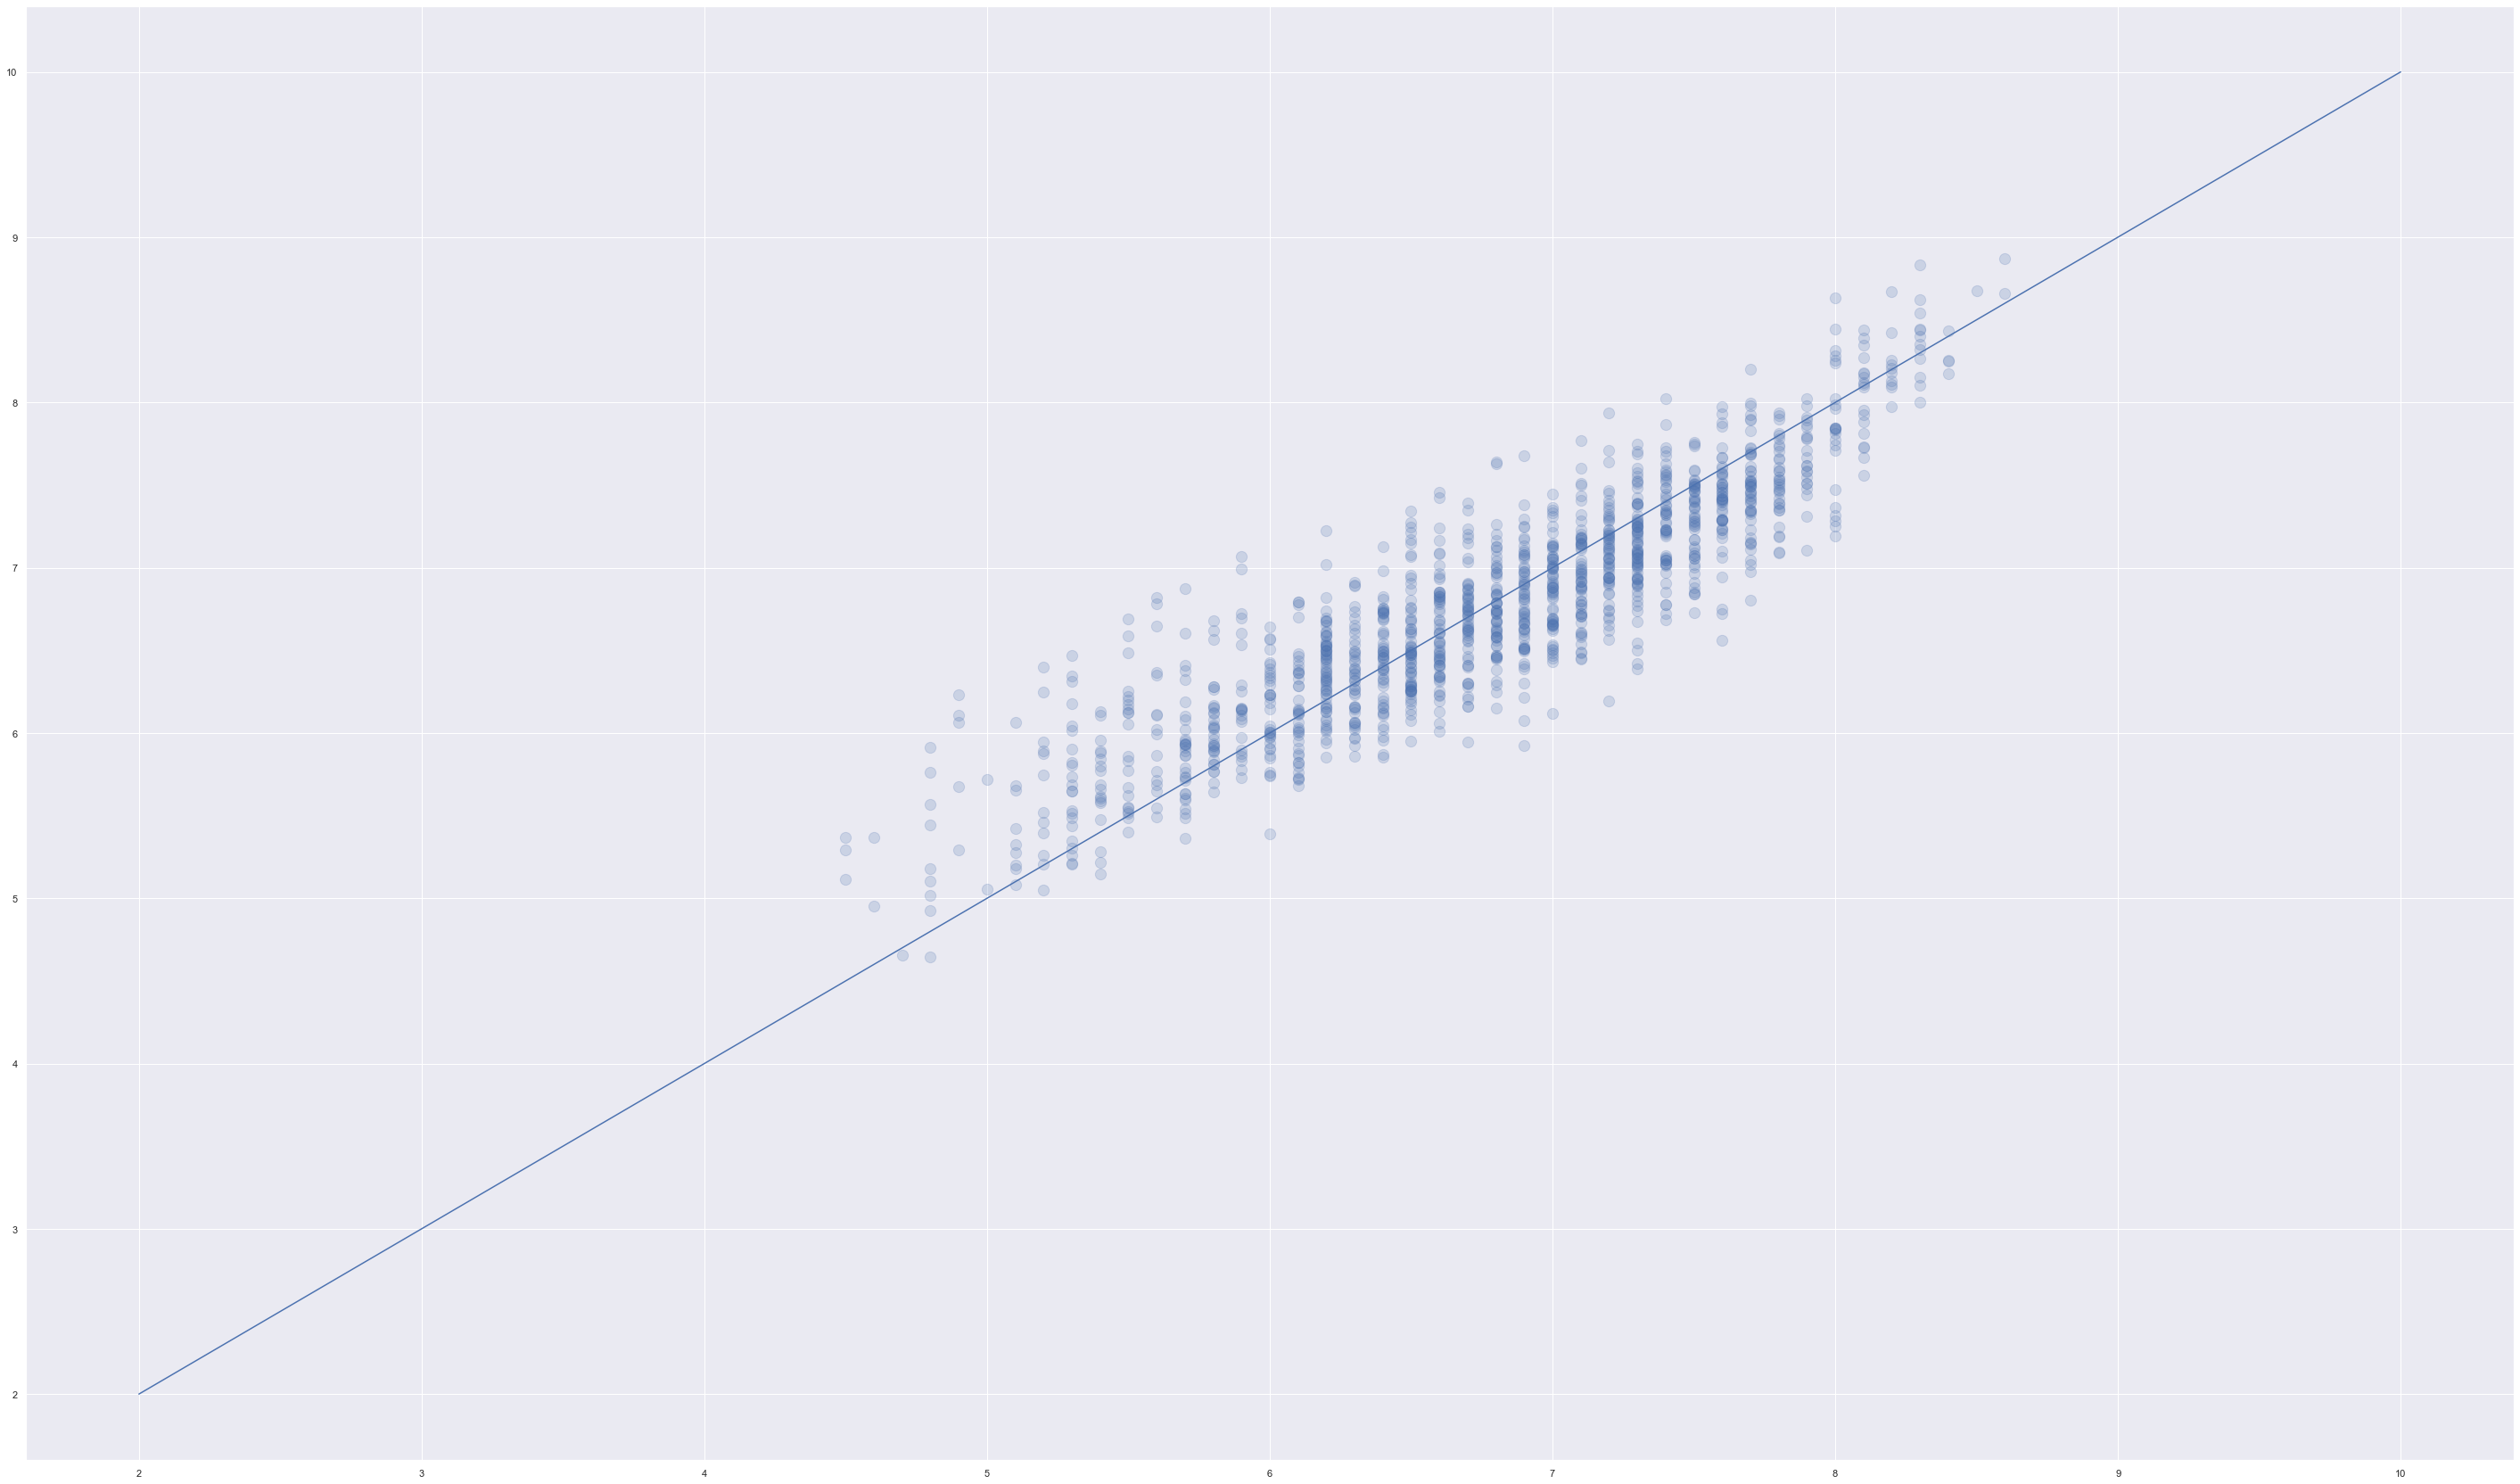

In [2693]:
# SIMPLE REG HAS THE LOWEST RMSE, SO WE WILL EVALUATE THIS MODEL AT THIS BASE LINE.
# EVALUATING THE MODEL

y_train_pred = lm_lasso.predict(X_train_scaled)

plt.scatter(y_train, y_train_pred, s=150, alpha=0.2)
plt.plot([2, 10], [2, 10]);

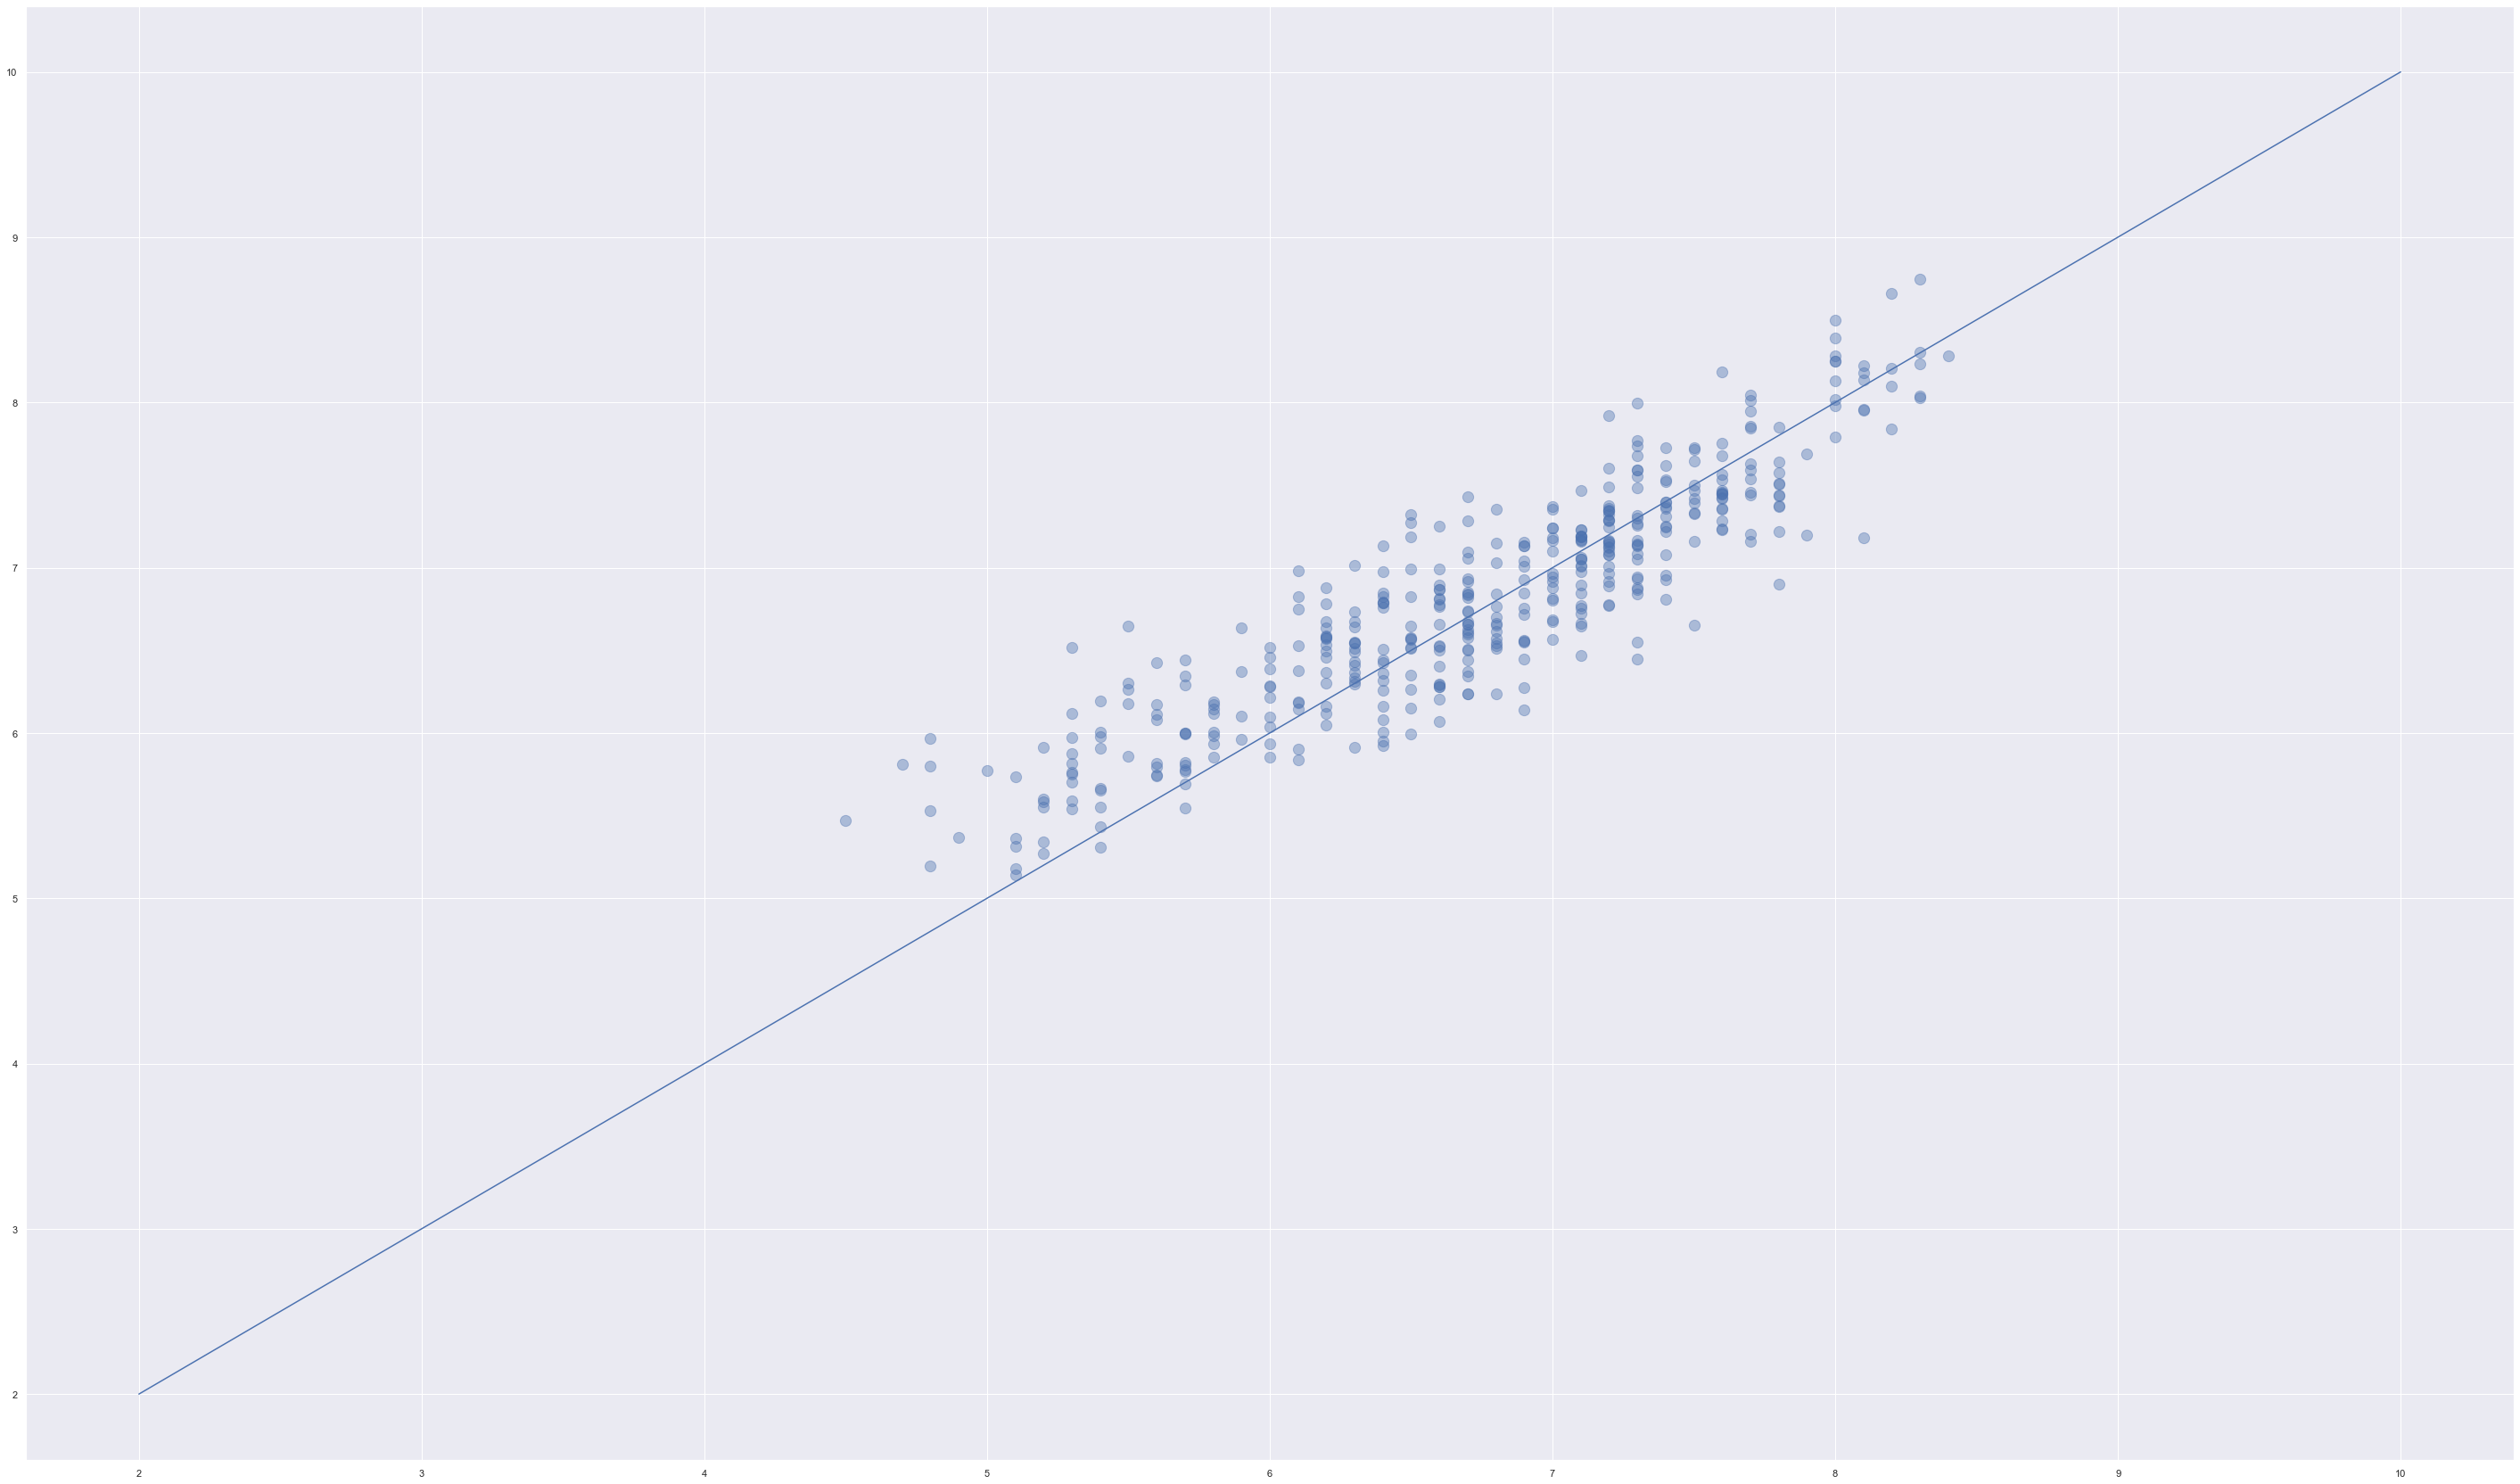

In [2721]:
# Fitted vs. Actual
y_test_pred = lm_lasso.predict(X_test_scaled)

plt.scatter(y_test, y_test_pred, s=150, alpha=0.4)
plt.plot([2, 10], [2, 10])

In [ ]:
#INTERPRETATION
#Votes: 1 thousand vote increase contributes to 0.12 change in rating.
#Or 10,000 votes contributes to 1.2 increase in rating.

#Metascore: rating increase of 10, results in 0.118 increase in rating

#budget - increase by 1 million, the rating lowers by 0.03

#runtime - 1 percent increase in runtime, results in 0.4189 increase in rating.
#In other words, 5% increase in runtime, results in 2 point increase in rating.

#One unit increase in average rating (dir/writer/star), increases the rating by 0.7255 or 72% of a point

#PG Animation: higher by 0.18 than R Action, R Biography, R Crime, PG-13 Comedy, PG-13 Drama or other.


# PG-13 Action: -0.1224
# R Drama: -0.0867
# R Comedy: -0.0933

# Quentin Tarantino: -0.4577
# Peter Jackson: 0.1347

# MODEL 4

In [2713]:
data_df3['runtime_log'] = data_df3['runtime_log'].round(2)
data_df3['dir_writer_star_mean'] = data_df3['dir_writer_star_mean'].round(2)




In [2740]:
X = data_df3[['votes_norm', 'metascore', 'budget_mil', 'PG Animation', 'PG-13 Action',
       'PG-13 Comedy', 'R Comedy', 'R Drama', 'Paul Thomas Anderson',
       'Peter Jackson', 'Quentin Tarantino',
       'runtime_log', 'dir_writer_star_mean']] # independent variables
y = data_df3['rating']   # dependent variables
X = sm.add_constant(X)
# fit the regression model
regOLS_4 = sm.OLS(y, X).fit()
regOLS_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:12:10   Log-Likelihood:                -825.86
No. Observations:                2112   AIC:                             1680.
Df Residuals:                    2098   BIC:                             1759.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8904      0.261     -3.408      0.001      -1.403      -0.378
votes_norm               0.0012    5.2e-05     22.800      0.000       0.001       0.001
metascore                0.0118      0.001     18.315      0.000       0.011       0.013
budget_mil              -0.0030      0.000    -13.929      0.000      -0.003      -0.003
PG Animation             0.1807      0.035      5.114      0.000       0.111       0.250
PG-13 Action            -0.1269      0.026     -4.821      0.000      -0.178      -0.075
PG-13 Comedy            -0.0442      0.032     -1.391      0.164      -0.106       0.018
R Comedy                -0.0961      0.030     -3.241      0.001      -0.154      -0.038
R Drama                 -0.0854      0.031     -2.755      0.006      -0.146      -0.025
Paul Thomas Anderson    -0.2058      0.138     -1.491      0.136      -0.477       0.065
Peter Jackson            0.1318      0.148      0.892      0.372      -0.158       0.421
Quentin Tarantino       -0.4622      0.163     -2.840      0.005      -0.781      -0.143
runtime_log              0.4201      0.058      7.246      0.000       0.306       0.534
dir_writer_star_mean     0.7240      0.018     39.492      0.000       0.688       0.760
==============================================================================
Omnibus:                       83.431   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.462
Skew:                          -0.411   Prob(JB):                     2.80e-24
Kurtosis:                       3.746   Cond. No.                     9.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2715]:
data_df3[['votes_norm', 'metascore', 'budget_mil', 'runtime_log', 'dir_writer_star_mean', 'PG Animation', 'PG-13 Action', 'R Drama', 'R Comedy', 'Quentin Tarantino']].head() # independent variables


votes_norm  metascore  budget_mil  runtime_log  dir_writer_star_mean  \
0      516.21         63        18.0         4.63                  7.12   
1      552.00         82        40.0         4.87                  7.32   
2      175.55         78         6.9         4.62                  7.46   
3      652.80         83        90.0         5.08                  7.68   
4      190.14         75        85.0         4.67                  7.08   

   PG Animation  PG-13 Action  R Drama  R Comedy  Quentin Tarantino  
0             0             0        0         0                  0  
1             0             0        0         0                  0  
2             0             0        0         1                  0  
3             0             0        0         1                  1  
4             1             0        0         0                  0

In [2770]:
data_df3.corr()

rating  votes_norm  metascore  budget_mil  \
rating                1.000000    0.511703   0.701669   -0.092066   
votes_norm            0.511703    1.000000   0.363176    0.343227   
metascore             0.701669    0.363176   1.000000   -0.092196   
budget_mil           -0.092066    0.343227  -0.092196    1.000000   
PG Animation         -0.022979   -0.036458   0.033642    0.232959   
PG-13 Action         -0.136481    0.209390  -0.136960    0.451952   
PG-13 Comedy         -0.103113   -0.058343  -0.105252   -0.096993   
PG-13 Drama           0.004711   -0.027009  -0.054901   -0.050457   
R Action              0.033625    0.058822  -0.043290   -0.020113   
R Biography           0.109360   -0.055704   0.128410   -0.121850   
R Comedy              0.021529   -0.019229   0.071851   -0.187696   
R Crime               0.110791    0.042259   0.072958   -0.086666   
R Drama               0.127001    0.021255   0.142516   -0.156631   
David Fincher         0.057005    0.107476   0.050741    0.023417   
Paul Thomas Anderson  0.055555    0.014766   0.090567   -0.028061   
Peter Jackson         0.035940    0.048419   0.017120    0.074357   
Quentin Tarantino     0.065492    0.120696   0.049618   -0.015273   
Sam Mendes            0.047348    0.053733   0.035357    0.077094   
Wes Anderson          0.061947    0.029708   0.067020   -0.035063   
runtime_log           0.324604    0.258843   0.199500    0.218875   
dir_writer_star_mean  0.808650    0.378601   0.602935   -0.000061   

                      PG Animation  PG-13 Action  PG-13 Comedy  PG-13 Drama  \
rating                   -0.022979     -0.136481     -0.103113     0.004711   
votes_norm               -0.036458      0.209390     -0.058343    -0.027009   
metascore                 0.033642     -0.136960     -0.105252    -0.054901   
budget_mil                0.232959      0.451952     -0.096993    -0.050457   
PG Animation              1.000000     -0.115035     -0.076716    -0.064560   
PG-13 Action             -0.115035      1.000000     -0.112996    -0.095090   
PG-13 Comedy             -0.076716     -0.112996      1.000000    -0.063415   
PG-13 Drama              -0.064560     -0.095090     -0.063415     1.000000   
R Action                 -0.100535     -0.148077     -0.098752    -0.083104   
R Biography              -0.067064     -0.098778     -0.065875    -0.055436   
R Comedy                 -0.084001     -0.123725     -0.082511    -0.069437   
R Crime                  -0.060984     -0.089824     -0.059903    -0.050411   
R Drama                  -0.080551     -0.118643     -0.079123    -0.066585   
David Fincher            -0.017233     -0.025382     -0.016927     0.020901   
Paul Thomas Anderson     -0.016116     -0.023737     -0.015830    -0.013322   
Peter Jackson            -0.014917      0.003303     -0.014652     0.028233   
Quentin Tarantino        -0.013614     -0.020052     -0.013373    -0.011253   
Sam Mendes               -0.014917      0.028577     -0.014652    -0.012331   
Wes Anderson              0.012502     -0.025382      0.013267    -0.014245   
runtime_log              -0.300135      0.151907     -0.108463     0.059112   
dir_writer_star_mean     -0.046068     -0.069467     -0.118490     0.005346   

                      R Action  R Biography  ...   R Crime   R Drama  \
rating                0.033625     0.109360  ...  0.110791  0.127001   
votes_norm            0.058822    -0.055704  ...  0.042259  0.021255   
metascore            -0.043290     0.128410  ...  0.072958  0.142516   
budget_mil           -0.020113    -0.121850  ... -0.086666 -0.156631   
PG Animation         -0.100535    -0.067064  ... -0.060984 -0.080551   
PG-13 Action         -0.148077    -0.098778  ... -0.089824 -0.118643   
PG-13 Comedy         -0.098752    -0.065875  ... -0.059903 -0.079123   
PG-13 Drama          -0.083104    -0.055436  ... -0.050411 -0.066585   
R Action              1.000000    -0.086327  ... -0.078501 -0.103688   
R Biography          -0.086327     1.000000  .

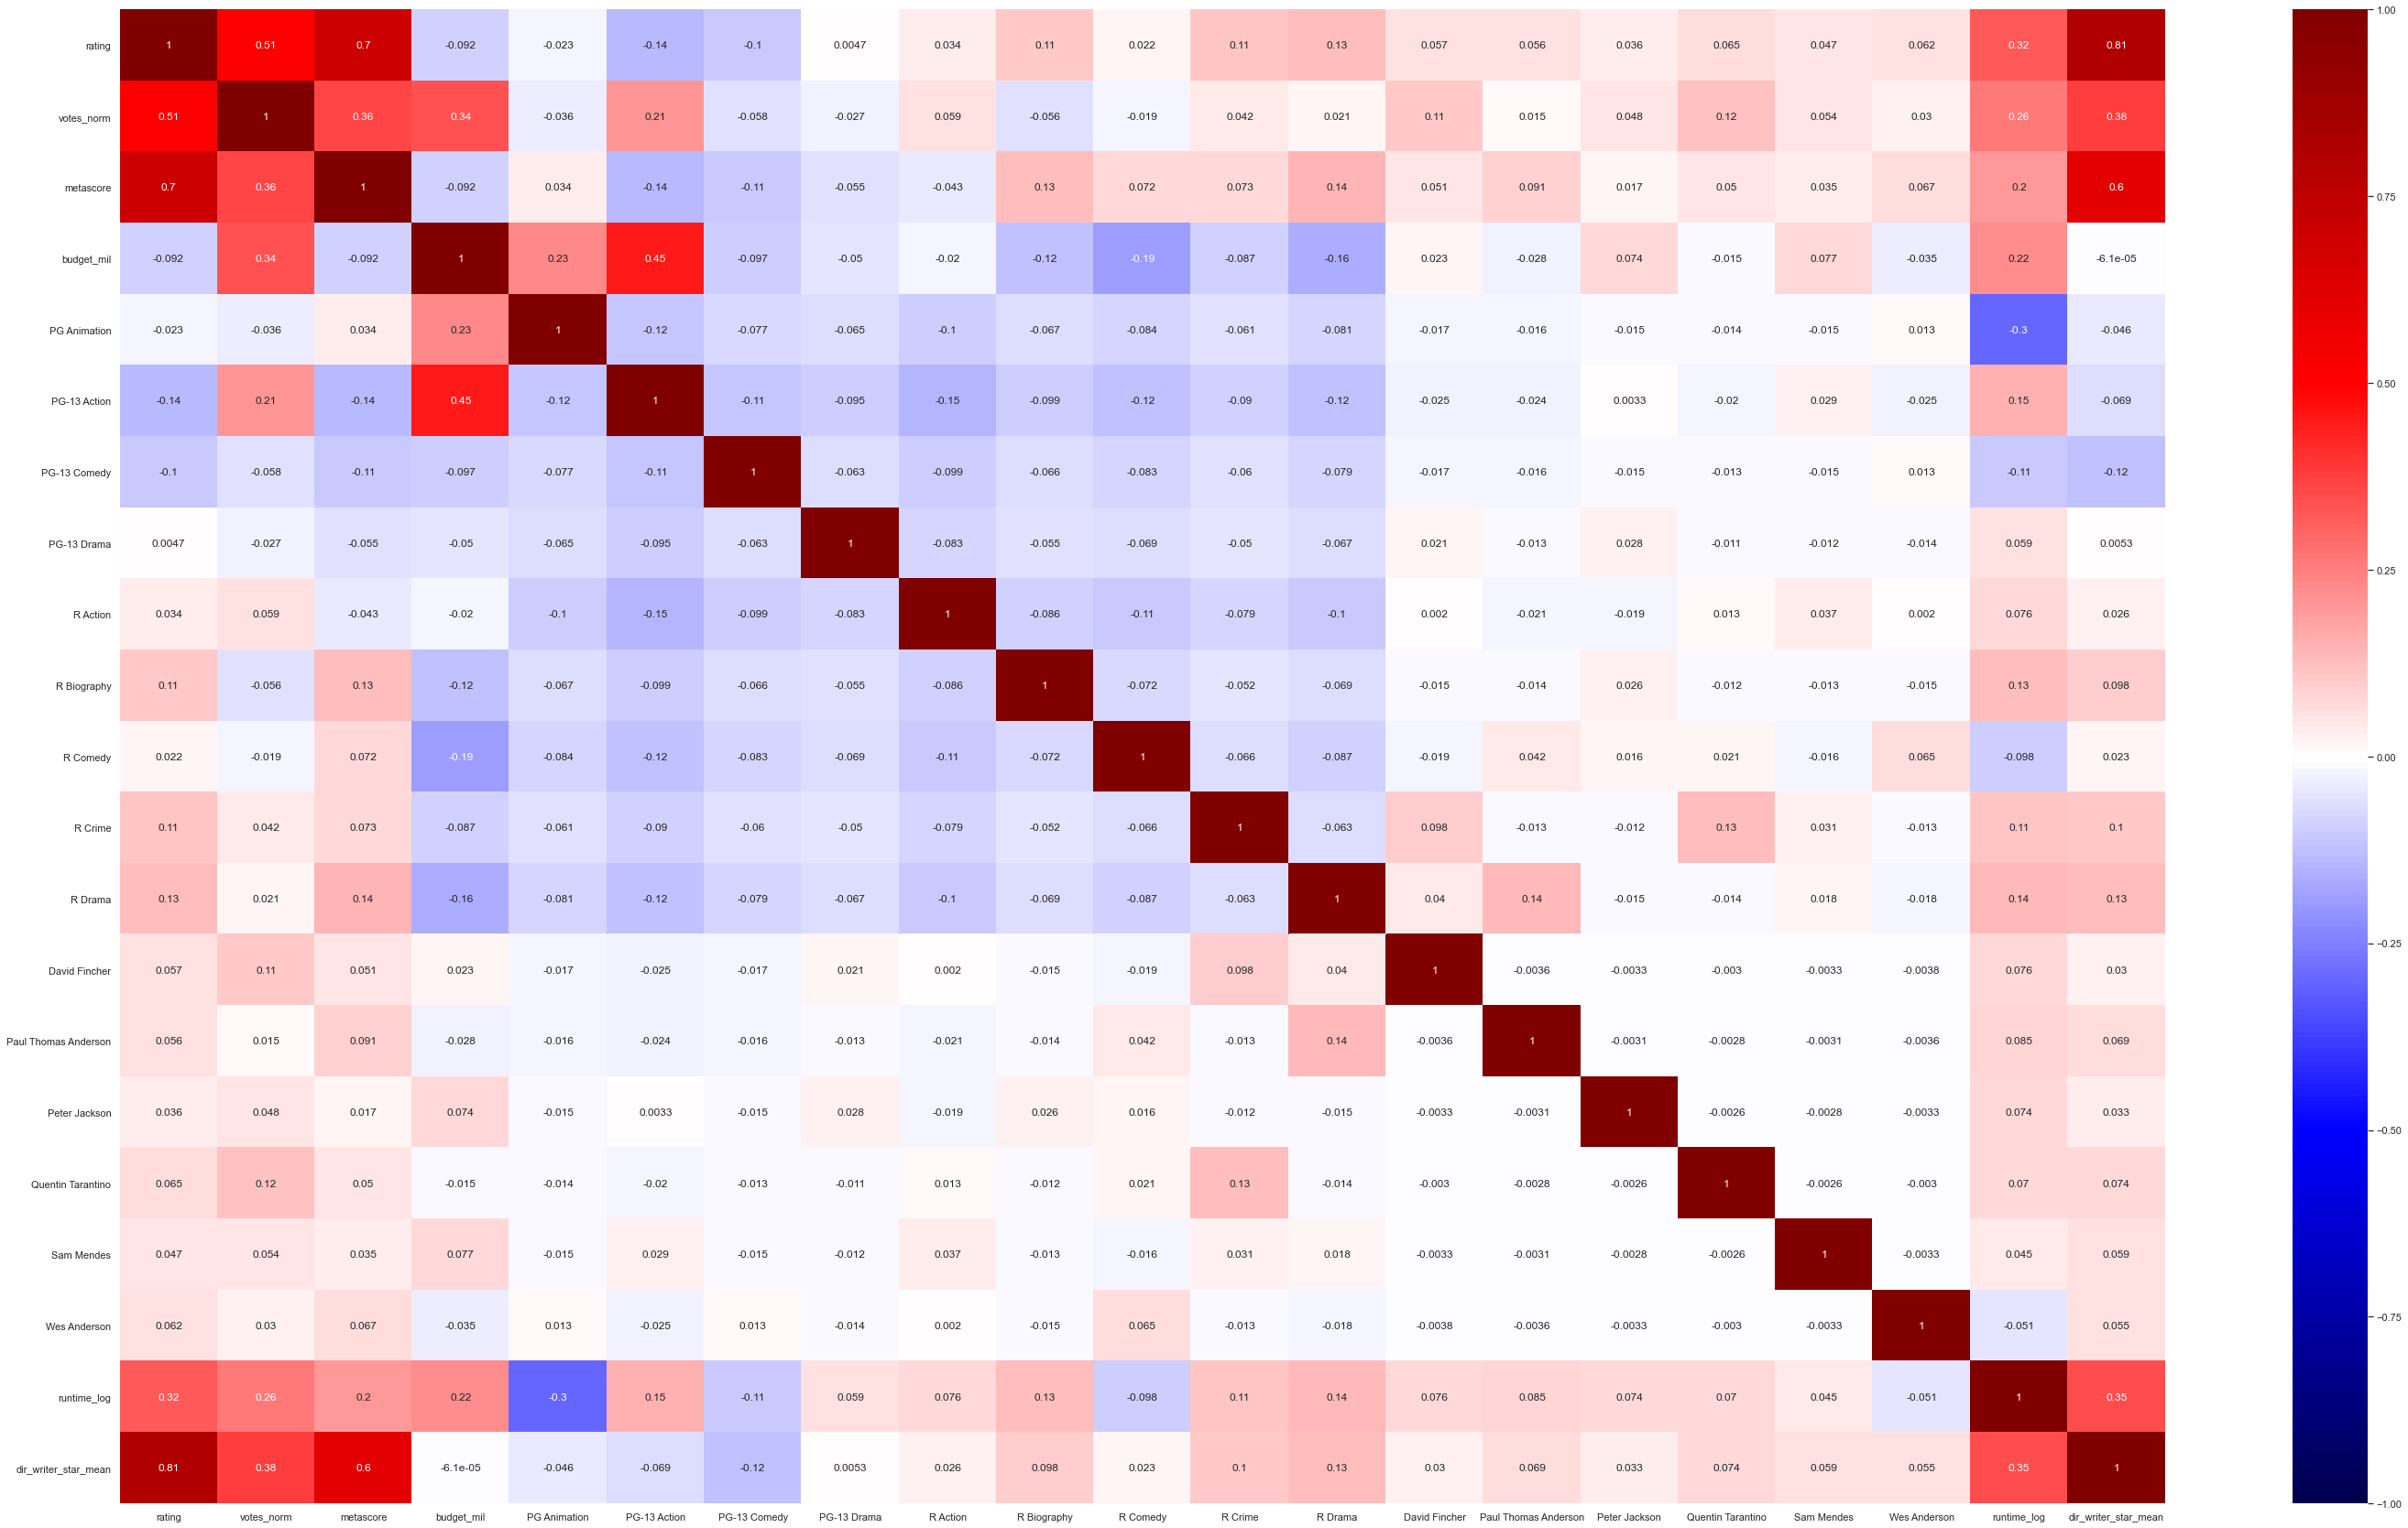

In [2771]:
sns.set(rc={"figure.figsize":(50, 30)})
sns.heatmap(data_df3.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [2741]:
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})




variables       VIF
0             votes_norm  1.513382
1              metascore  1.763027
2             budget_mil  1.801565
3           PG Animation  1.375678
4           PG-13 Action  1.406342
5           PG-13 Comedy  1.076238
6               R Comedy  1.095185
7                R Drama  1.116900
8   Paul Thomas Anderson  1.032400
9          Peter Jackson  1.012547
10     Quentin Tarantino  1.025008
11           runtime_log  1.469448
12  dir_writer_star_mean  1.790596

In [2743]:
from sklearn.model_selection import KFold

X, y = data_df3[['votes_norm', 'metascore', 'budget_mil', 'PG Animation', 'PG-13 Action',
       'PG-13 Comedy', 'R Comedy', 'R Drama', 'Paul Thomas Anderson',
       'Peter Jackson', 'Quentin Tarantino',
       'runtime_log', 'dir_writer_star_mean']], data_df3['rating']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [2744]:
kf = KFold(n_splits=5, shuffle=True)
lm_r2, lm_ridge_r2, lm_lasso_r2 = [], [], [] #collect the validation results for both models

alphas = 10**np.linspace(-2, 2, 200)

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #Regressions
    lm = LinearRegression()
    lm_ridge = RidgeCV(alphas=alphas)
    lm_lasso = LassoCV(alphas=alphas)

    #Simple linear fit
    lm.fit(X_train, y_train)
    lm_r2.append(lm.score(X_val, y_val))
    
    #Ridge fit
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_ridge.fit(X_train_scaled, y_train)
    lm_ridge_r2.append(lm_ridge.score(X_val_scaled, y_val))
    
    #Lasso fit
    lm_lasso.fit(X_train_scaled, y_train)
    lm_lasso_r2.append(lm_lasso.score(X_val_scaled, y_val))


print('Simple regression scores: ', lm_r2, '\n')
print('Ridge scores: ', lm_ridge_r2, '\n')
print('Lasso scores: ', lm_lasso_r2, '\n')


print(f'Simple mean r^2: {np.mean(lm_r2):.3f} +- {np.std(lm_r2):.3f}')
print(f'Ridge mean r^2: {np.mean(lm_ridge_r2):.3f} +- {np.std(lm_ridge_r2):.3f}')
print(f'Lasso mean r^2: {np.mean(lm_lasso_r2):.3f} +- {np.std(lm_lasso_r2):.3f}', '\n')

print('Ridge alpha', lm_ridge.alpha_)
print('Lasso alpha', lm_lasso.alpha_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1421: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


Simple regression scores:  [0.7816658492453271, 0.7869894643880799, 0.7949210637513281, 0.7602299180102315, 0.7928233441511132] 

Ridge scores:  [0.7814822774138608, 0.7873296498996931, 0.7949378064971407, 0.7609277396575967, 0.7920852420490856] 

Lasso scores:  [0.7787249309855261, 0.7877427412751276, 0.7930323366212907, 0.7611136420050443, 0.7851654571490794] 

Simple mean r^2: 0.783 +- 0.012
Ridge mean r^2: 0.783 +- 0.012
Lasso mean r^2: 0.781 +- 0.011 

Ridge alpha 14.314589375234785
Lasso alpha 0.01


In [2745]:
#RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error
pred = lm.predict(X_val)
pred_ridge = lm_ridge.predict(X_val_scaled)
pred_lasso = lm_lasso.predict(X_val_scaled)

print('Simple reg RMSE:'+str(np.sqrt(mean_squared_error(pred,y_val))))
print('Simple reg MAE:'+str(mean_absolute_error(pred,y_val)), '\n')

print('Ridge RMSE:'+str(np.sqrt(mean_squared_error(pred_ridge,y_val))))
print('Ridge MAE:'+str(mean_absolute_error(pred_ridge,y_val)), '\n')

print('Lasso RMSE:'+str(np.sqrt(mean_squared_error(pred_lasso,y_val))))
print('Lasso MAE:'+str(mean_absolute_error(pred_lasso,y_val)), '\n')

Simple reg RMSE:0.3719026287009993
Simple reg MAE:0.2868996664064177 

Ridge RMSE:0.37256452290741143
Ridge MAE:0.28760142600016175 

Lasso RMSE:0.3787135942683239
Lasso MAE:0.2903289590305702 



In [2746]:
#Simple linear test score

print('Simple reg test: ', lm.score(X_test, y_test))

#Ridge test score
X_test_scaled = scaler.fit_transform(X_test)
print('Ridge reg test', lm_ridge.score(X_test_scaled, y_test))

#Lasso test score
print('Lasso reg test', lm_lasso.score(X_test_scaled, y_test))

Simple reg test:  0.7864868990598985
Ridge reg test 0.7845498534763847
Lasso reg test 0.7863469887278335


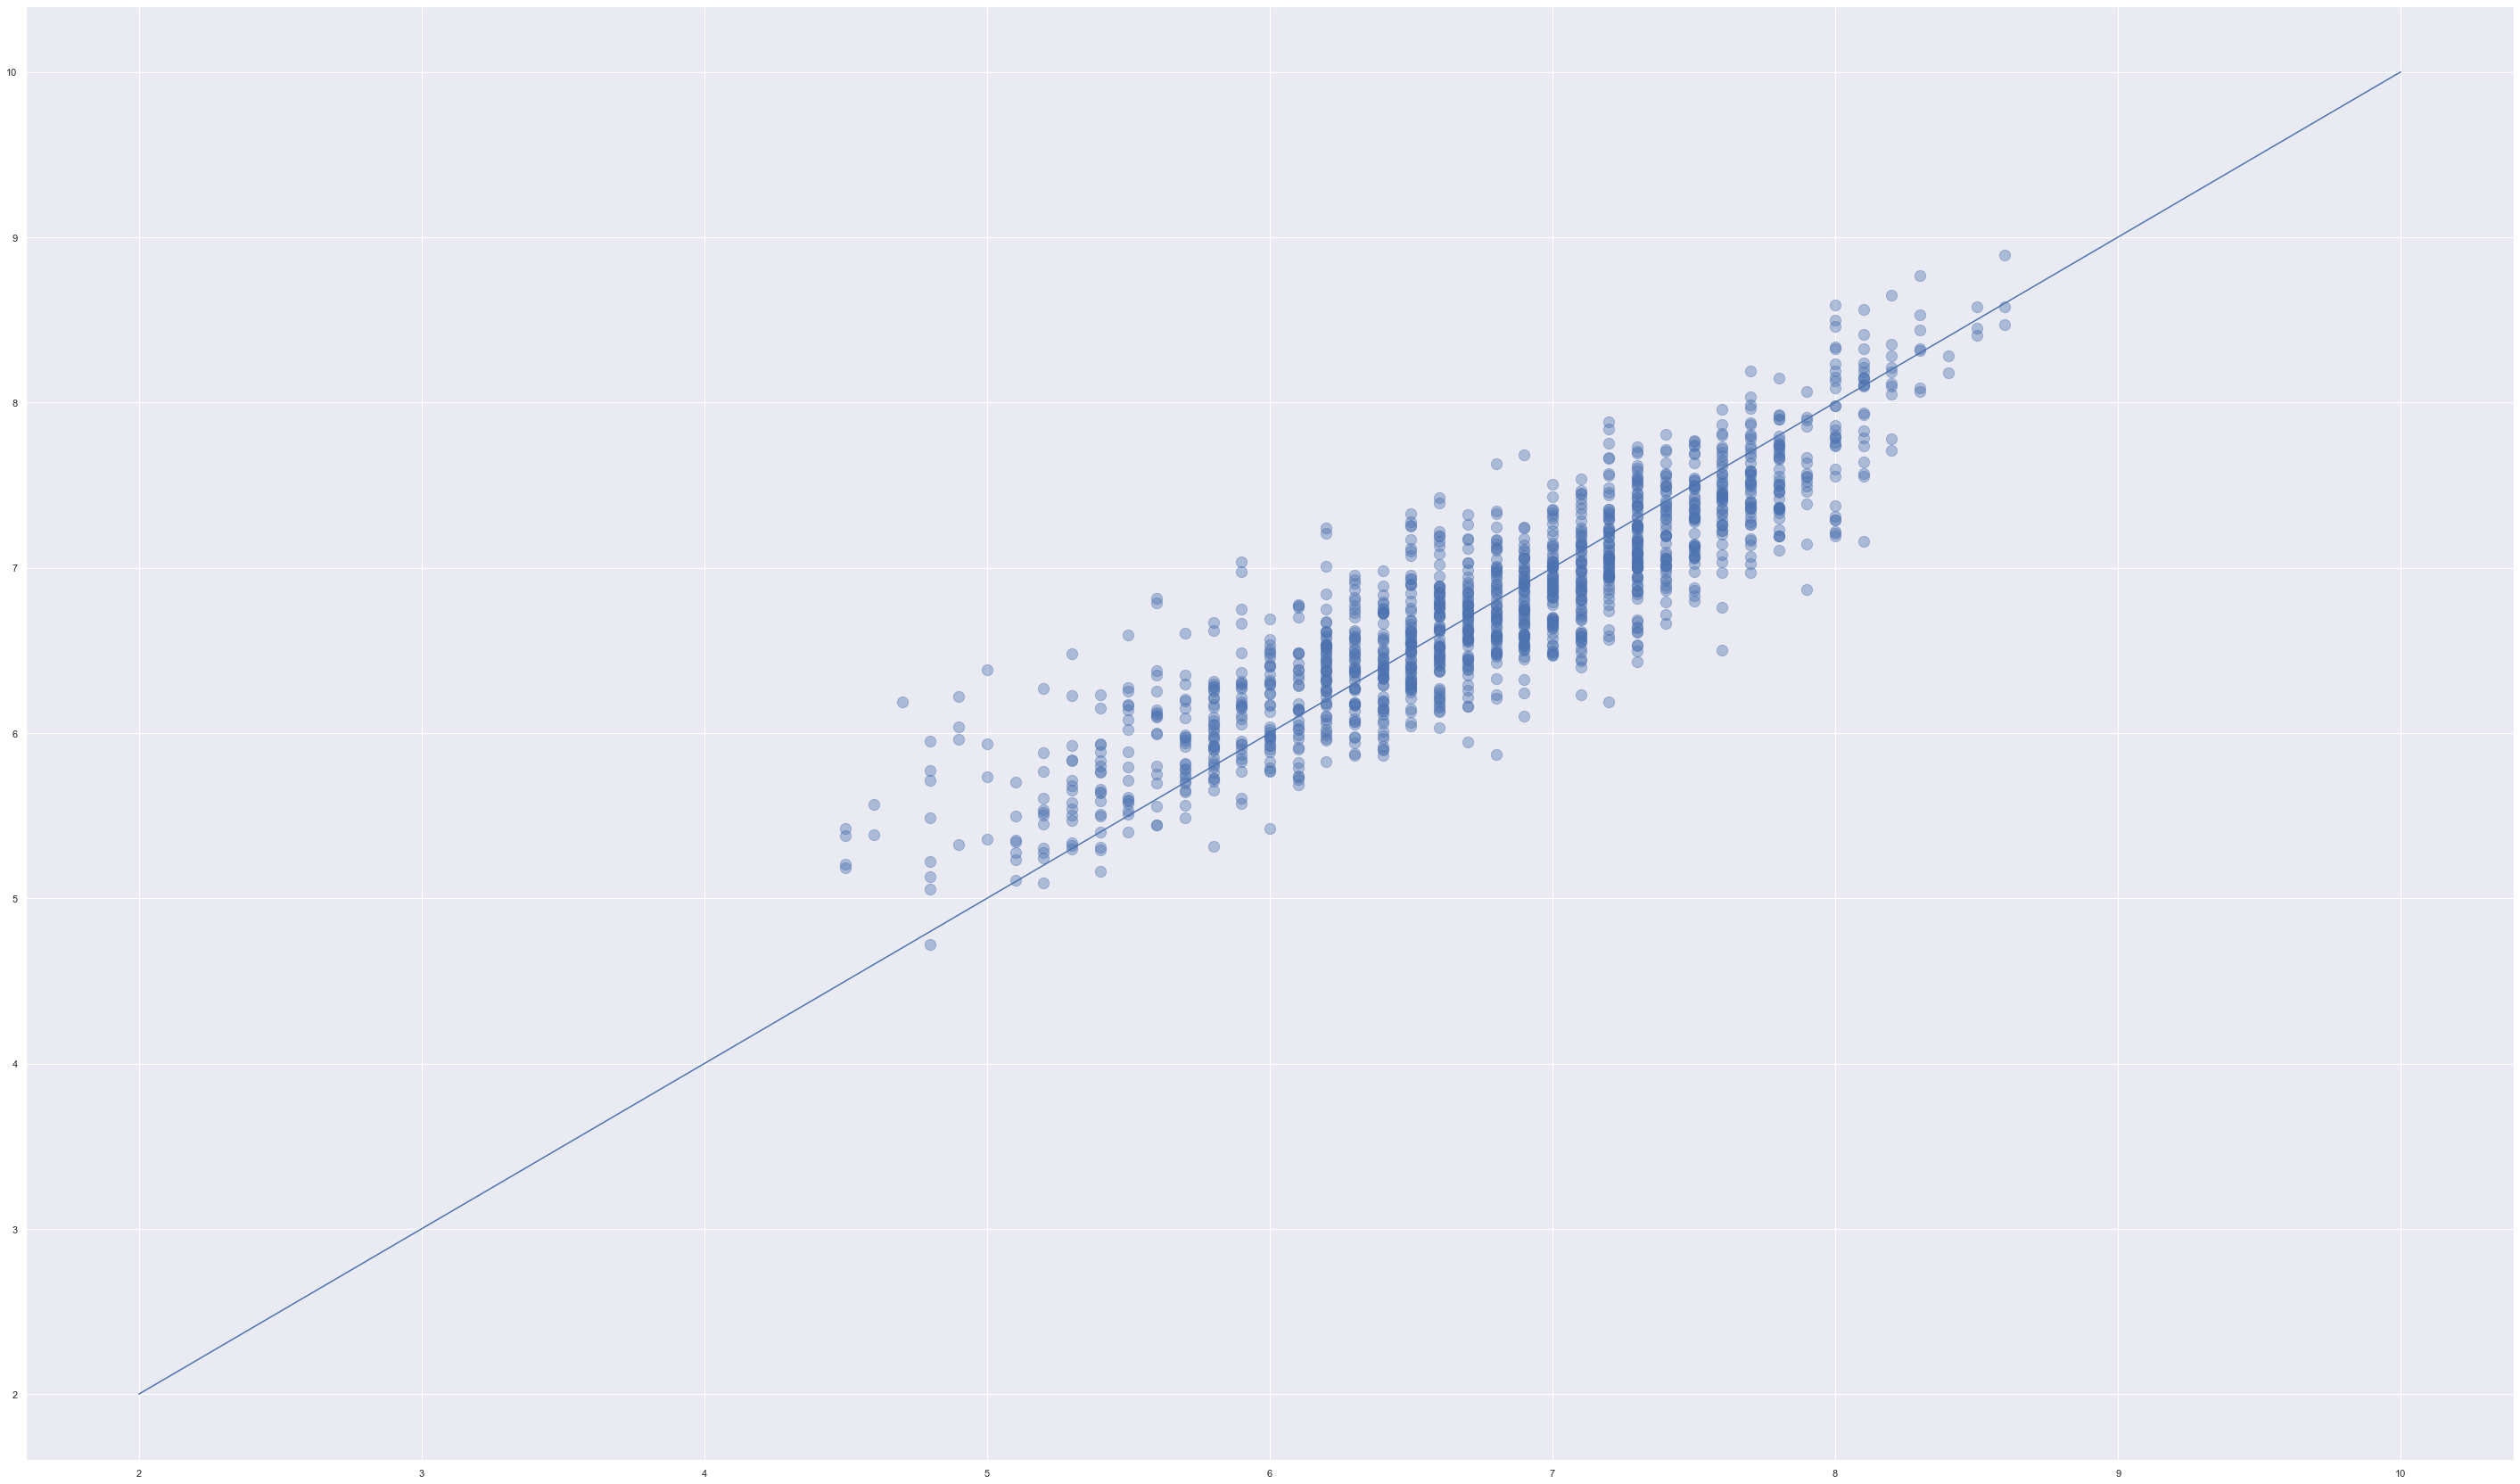

In [2769]:
# SIMPLE REG HAS THE LOWEST RMSE, SO WE WILL EVALUATE THIS MODEL AT THIS BASE LINE.
# EVALUATING THE MODEL

y_train_pred = lm_lasso.predict(X_train_scaled)

plt.scatter(y_train, y_train_pred, s=150, alpha=0.4)
plt.plot([2, 10], [2, 10]);

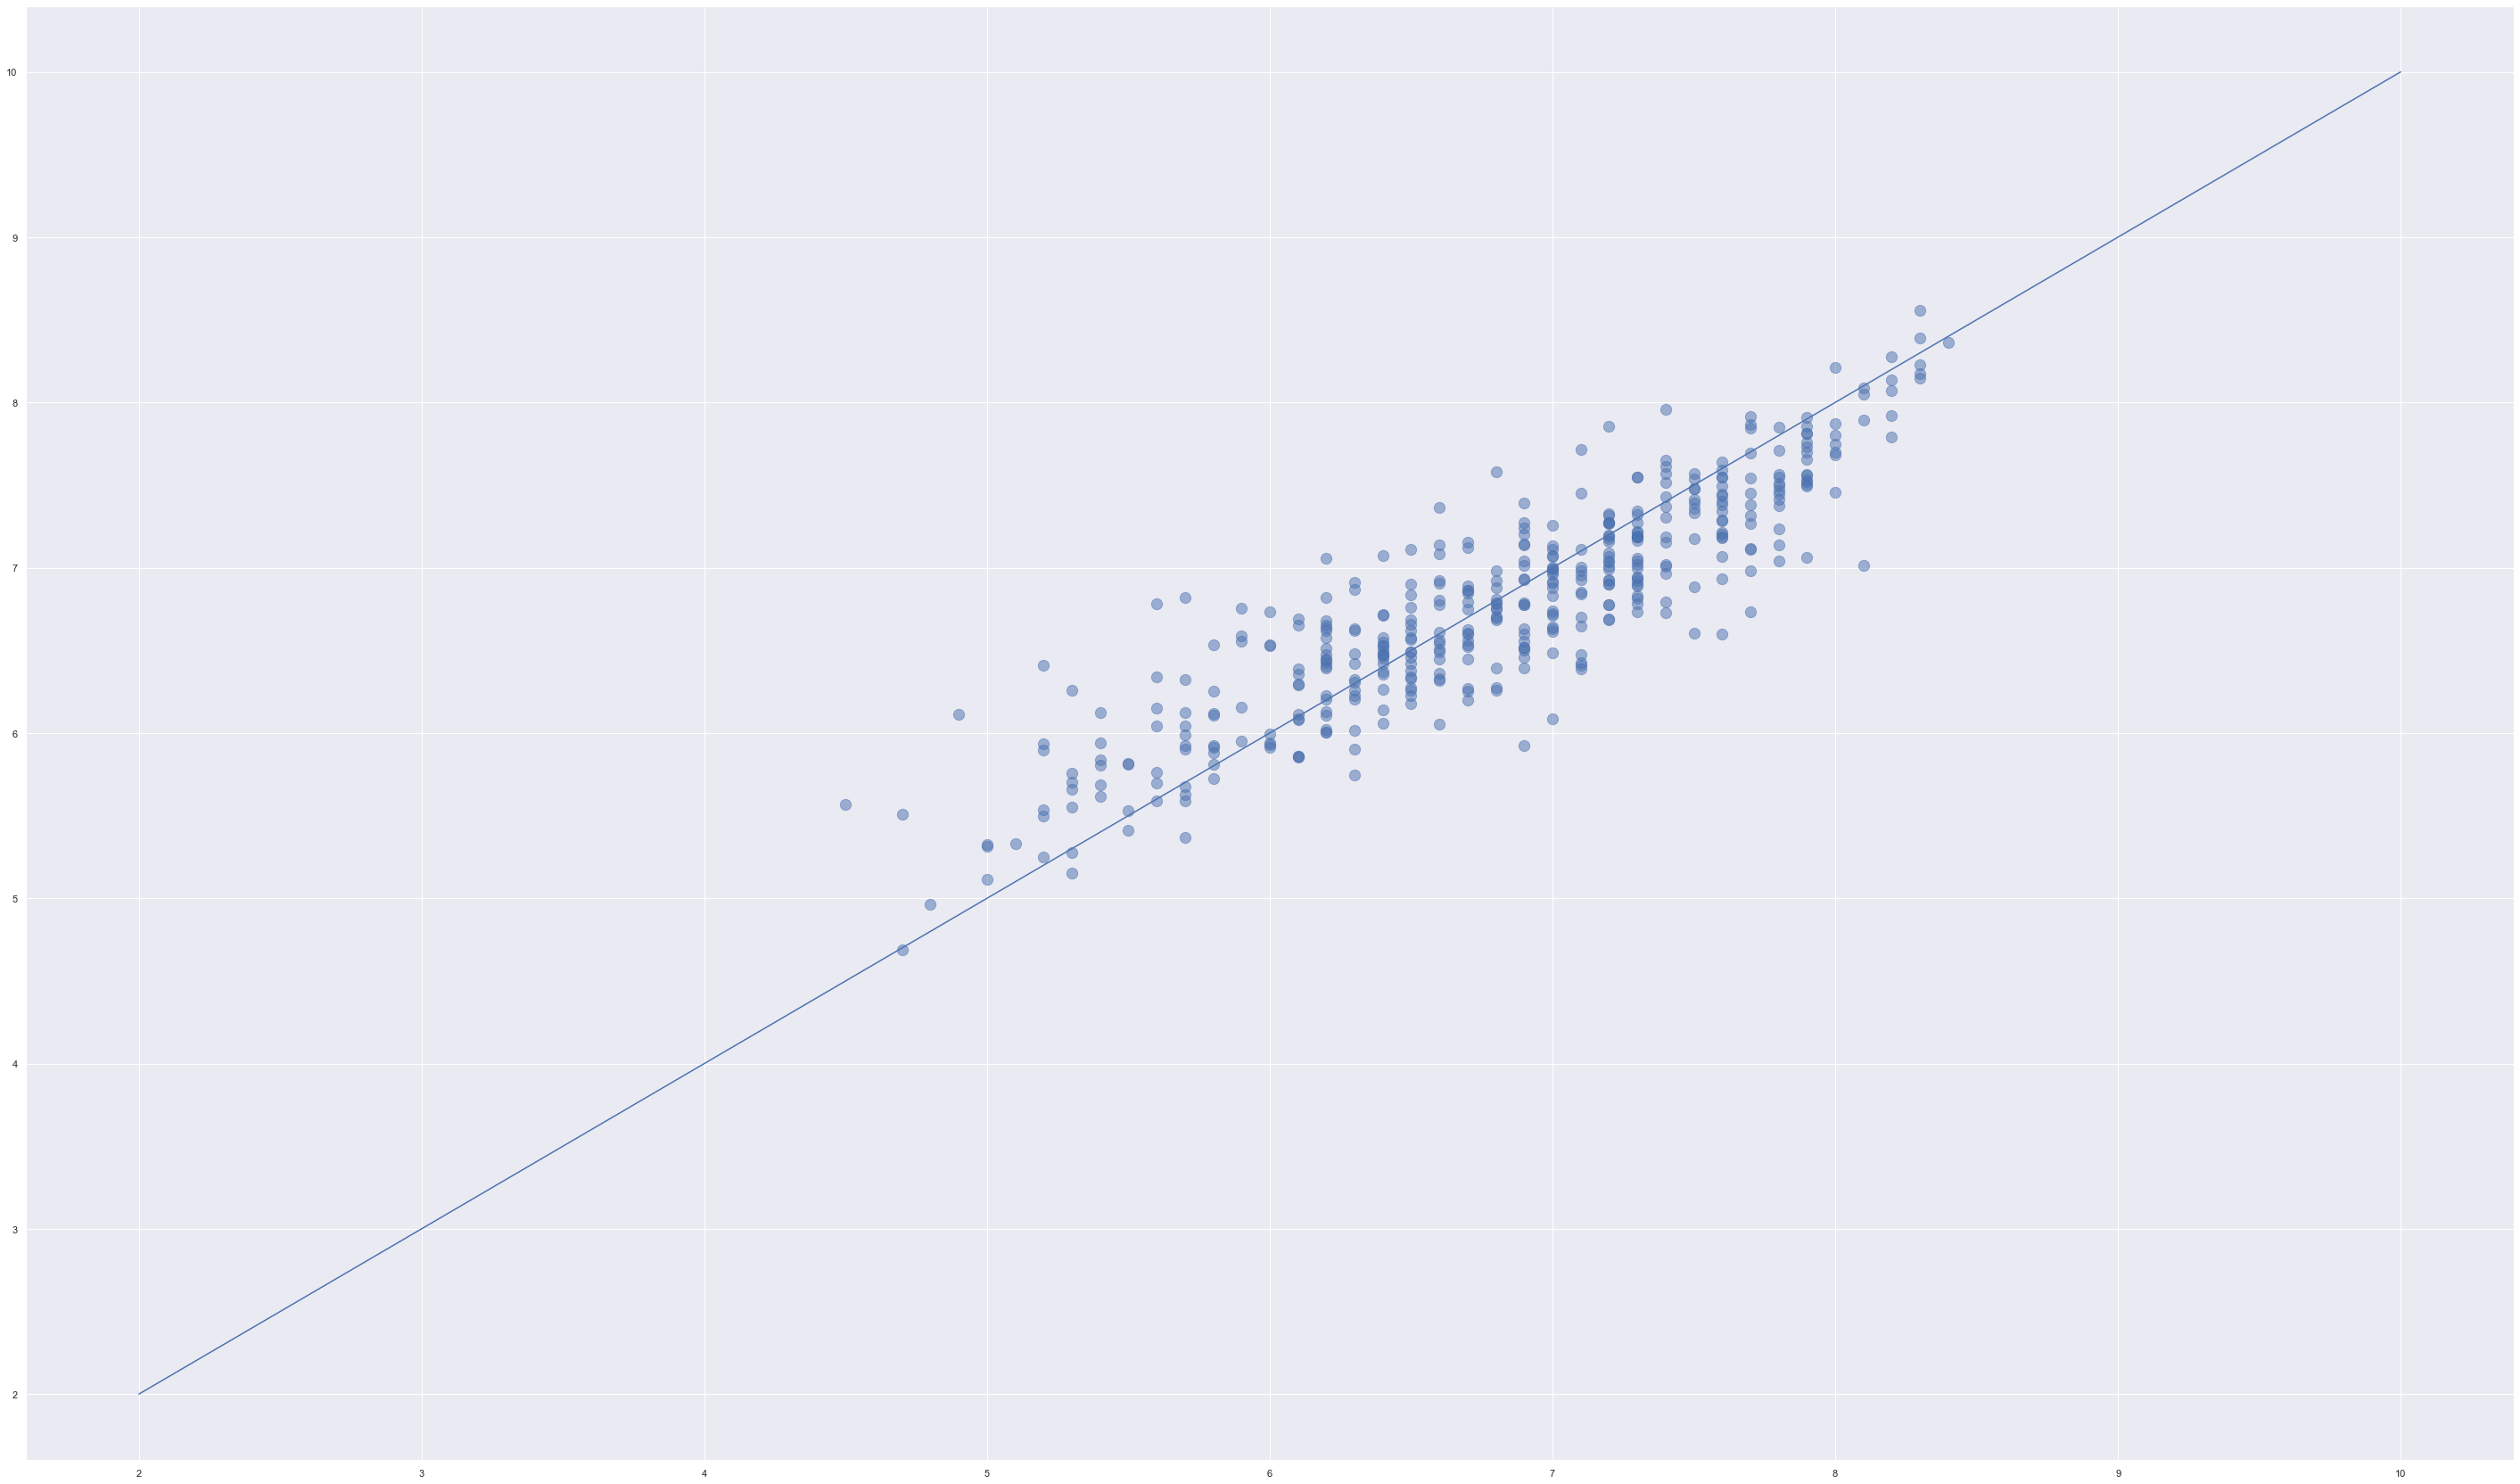

In [2749]:
# Fitted vs. Actual
y_test_pred = lm_lasso.predict(X_test_scaled)

plt.scatter(y_test, y_test_pred, s=150, alpha=0.5)
plt.plot([2, 10], [2, 10])

In [2751]:
lm.coef_

array([ 0.00114221,  0.01206794, -0.00303396,  0.19165272, -0.1310131 ,
       -0.07363703, -0.08679672, -0.12055815, -0.12353046,  0.17901555,
       -0.34522972,  0.47064912,  0.69491827])

In [ ]:
votes, metascore, budget_mil, PG Animation, PG_13 Action, PG-13 Comedy, R Comedy, R Drama,
Paul Thomas Andreeson, Peter Jaconson, Quentin, runtim_log, dir_writer_star_mean.

#dir average: 7.425
#writer average: 7.425
#star average: 7.68
#total average: 7.51



In [2764]:
lm.predict([[34.0, 90, 39.0, 0, 0, 0, 0, 1, 0, 0, 0, 4.84, 7.51]])

array([7.45231226])

In [2719]:
data_df3.head()

rating  votes_norm  metascore  budget_mil  PG Animation  PG-13 Action  \
0     7.6      516.21         63        18.0             0             0   
1     7.9      552.00         82        40.0             0             0   
2     7.6      175.55         78         6.9             0             0   
3     7.6      652.80         83        90.0             0             0   
4     7.0      190.14         75        85.0             1             0   

   PG-13 Comedy  PG-13 Drama  R Action  R Biography  ...  R Crime  R Drama  \
0             0            0         0            0  ...        0        0   
1             1            0         0            0  ...        0        0   
2             0            0         0            0  ...        0        0   
3             0            0         0            0  ...        0        0   
4             0            0         0            0  ...        0        0   

   David Fincher  Paul Thomas Anderson  Peter Jackson  Quentin Tarantino  \
0              0                     0              0                  0   
1              0                     0              0                  0   
2              0                     0              0                  0   
3              0                     0              0                  1   
4              0                     0              0                  0   

   Sam Mendes  Wes Anderson  runtime_log  dir_writer_star_mean  
0           0             0         4.63                  7.12  
1           0             0         4.87                  7.32  
2           0             0         4.62                  7.46  
3           0             0         5.08                  7.68  
4           0             0         4.67                  7.08  

[5 rows x 21 columns]

In [2757]:
data_df[data_df['director'] == 'Jane Campion']['dir_averages']

443    7.25
620    7.60
Name: dir_averages, dtype: float64

In [2758]:
data_df[data_df['writer'] == 'Jane Campion']['writer_averages']

443    7.25
620    7.60
Name: writer_averages, dtype: float64

In [2759]:
data_df[data_df['star'] == 'Benedict Cumberbatch']['star_averages']

73     7.75
408    7.30
663    8.00
Name: star_averages, dtype: float64

In [2755]:
data_df.columns

Index(['title', 'year', 'certificate', 'runtime_min', 'genre', 'sub_genre',
       'rating', 'votes', 'metascore', 'gross_mil', 'director', 'writer',
       'star', 'company', 'budget_mil', 'votes_norm', 'top_director',
       'sub_genre_2', 'cert_genre_temp', 'cert_genre', 'dir_averages',
       'writer_averages', 'star_averages', 'dir_writer_star_mult',
       'dir_writer_star_mean', 'G', 'PG', 'PG-13', 'R', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror',
       'PG Animation', 'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama',
       'R Action', 'R Biography', 'R Comedy', 'R Crime', 'R Drama',
       'other_combo', 'Christopher Nolan', 'David Fincher', 'James Cameron',
       'Martin Scorsese', 'Paul Thomas Anderson', 'Peter Jackson',
       'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg', 'Wes Anderson',
       'other'],
      dtype='object')

In [ ]:
#Linear model train

In [1992]:
from sklearn.linear_model import Ridge

In [1995]:
toolRidge = linear_model.Ridge()
X = data_df55_4.drop('rating', axis=1)
y = data_df55_4.rating
toolRidge.fit(X, y)

Ridge()

In [1996]:
toolRidge.score(X, y)

0.8539250361758814

In [1997]:
toolRidge.coef_

array([ 0.0026222 ,  0.00844873,  0.15710641, -0.04927535,  0.01416706,
        0.04162656,  0.06309027, -0.00735629, -0.08789182, -0.01843896,
       -0.11693257, -0.12685562, -0.01958465, -0.02526471, -0.17229242,
       -0.149819  , -0.13494787, -0.24397249, -0.18726766, -0.0571949 ,
       -0.11443019,  0.14081779, -0.03613547,  0.00738549])

In [1998]:
data_df55_4.columns

Index(['runtime_min', 'rating', 'metascore', 'PG Animation', 'PG-13 Action',
       'PG-13 Comedy', 'PG-13 Drama', 'R Action', 'R Biography', 'R Comedy',
       'R Crime', 'R Drama', 'Christopher Nolan', 'David Fincher',
       'James Cameron', 'Martin Scorsese', 'Paul Thomas Anderson',
       'Peter Jackson', 'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg',
       'Wes Anderson', 'votes_log', 'budget_sqrt', 'dir_writer_star'],
      dtype='object')

In [2000]:
data_df55.columns

Index(['title', 'year', 'certificate', 'runtime_min', 'genre', 'sub_genre',
       'rating', 'votes', 'metascore', 'gross_mil', 'director', 'writer',
       'star', 'company', 'budget_mil', 'sub_genre2', 'dir_avg', 'writer_avg',
       'star_avg', 'sub_genre_keep', 'dir_writer_star', 'top_director',
       'genre_subgenre', 'top_star', 'top_writer', 'cert_genre',
       'top_cert_genre', 'G', 'PG', 'PG-13', 'R', 'PG Animation',
       'PG-13 Action', 'PG-13 Comedy', 'PG-13 Drama', 'R Action',
       'R Biography', 'R Comedy', 'R Crime', 'R Drama', 'other_combo',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Horror', 'Christopher Nolan', 'David Fincher',
       'James Cameron', 'Martin Scorsese', 'Paul Thomas Anderson',
       'Peter Jackson', 'Quentin Tarantino', 'Sam Mendes', 'Steven Spielberg',
       'Wes Anderson', 'other'],
      dtype='object')

In [2001]:
data_df55[data_df55['director'] == 'Colin Trevorrow']['dir_avg']

728    7.0
Name: dir_avg, dtype: float64

In [2007]:
data_df55[data_df55['star'] == 'Chris Pratt']['star_avg']

21      7.183333
45      7.183333
706     7.183333
728     7.183333
1057    7.183333
1124    7.183333
Name: star_avg, dtype: float64

In [2008]:
toolRidge.predict([[90, 60, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.3, 12.8, 351.82]])

array([5.51461194])